In [70]:
# 행수 파악
with open('vessel_data/탱커선+항로별+Co2+Nox+발생량+데이터+셋.csv', 'r', encoding='utf-8') as f:
    row_count = sum(1 for row in f)
print(f"총 행 수: {row_count}")


총 행 수: 24141264


In [33]:
# 항로별 데이터셋 기간조회

import pandas as pd
from datetime import datetime


# CSV 파일 경로 지정
file_path = 'vessel_data/탱커선+항로별+Co2+Nox+발생량+데이터+셋.csv'

# 1. 날짜 컬럼만 읽기
date_columns = ["YMD"] # 항로
# data_columns = ['DPTR_HMS', 'ARVL_HMS'] # 선박
df = pd.read_csv(file_path, usecols=date_columns)

# 2. 문자열 → datetime 변환
for col in date_columns:
    df[col] = pd.to_datetime(df[col], format="%d-%b-%Y %H:%M:%S", errors='coerce')

# 3. 전체에서 최소/최대 날짜 구하기
min_date = df[date_columns].min().min()
max_date = df[date_columns].max().max()

print(f"📅 최소 날짜: {min_date}")
print(f"📅 최대 날짜: {max_date}")


📅 최소 날짜: 2021-01-01 00:00:00
📅 최대 날짜: 2023-12-31 18:00:00


In [72]:
# 선박별 데이터셋 기간조회

import pandas as pd
from datetime import datetime

# CSV 파일 경로 지정
file_path = 'vessel_data/탱커선+선박별+Co2+Nox+발생량+데이터+셋.csv'

# 1. 날짜 컬럼만 읽기
date_columns = ["DPTR_HMS", "ARVL_HMS"]  # 선박
df = pd.read_csv(file_path, usecols=date_columns)

# 2. 문자열 → datetime 변환
for col in date_columns:
    df[col] = pd.to_datetime(df[col], format="%d-%b-%Y %H:%M:%S", errors='coerce')
# 3. 전체에서 최소/최대 날짜 구하기
min_date = df.min().min()
max_date = df.max().max()

print(f"📅 최소 날짜: {min_date}")
print(f"📅 최대 날짜: {max_date}")


📅 최소 날짜: 2021-01-01 00:00:00
📅 최대 날짜: 2023-12-31 18:00:00


DPTR_DATE
2021-01-01    15967
2021-01-02     1007
2021-01-03      502
2021-01-04      399
2021-01-05      287
              ...  
2023-05-23        2
2023-05-24        2
2023-05-28        3
2023-05-29        1
2023-06-01        2
Name: 출항건수, Length: 451, dtype: int64
ARVL_DATE
2021-01-01       6
2021-01-02       2
2021-01-03       5
2021-01-04       9
2021-01-05       7
              ... 
2023-12-27      80
2023-12-28     173
2023-12-29      26
2023-12-30     460
2023-12-31    5402
Name: 도착건수, Length: 654, dtype: int64


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_3508\1784306286.py:6: DtypeWarning: Columns (28) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


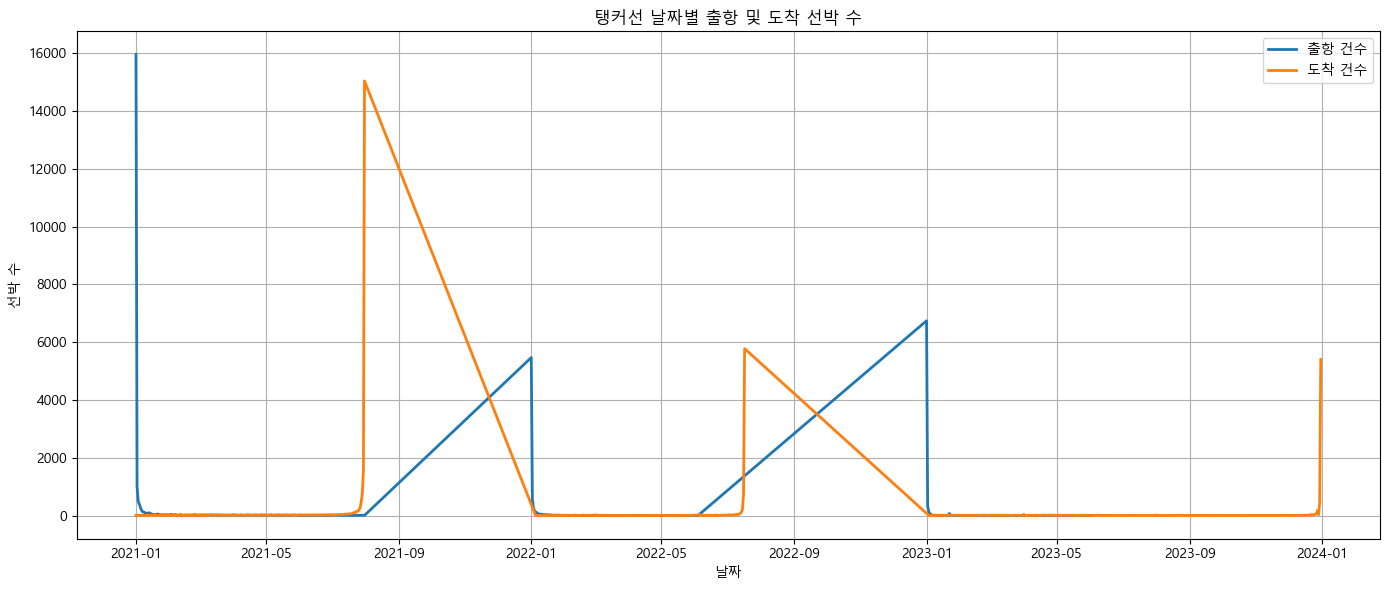

In [88]:
import pandas as pd
import matplotlib.pyplot as plt

# 데이터 불러오기
file_path = 'vessel_data/탱커선+선박별+Co2+Nox+발생량+데이터+셋.csv'
df = pd.read_csv(file_path)

# 컬럼 정리
df.columns = df.columns.str.strip().str.replace('"', '').str.replace('\ufeff', '')

# 날짜형 변환
df["DPTR_HMS"] = pd.to_datetime(df["DPTR_HMS"], errors='coerce')
df["ARVL_HMS"] = pd.to_datetime(df["ARVL_HMS"], errors='coerce')

# 날짜(시계열) 단위로만 자름 (시간 제거)
df["DPTR_DATE"] = df["DPTR_HMS"].dt.date
df["ARVL_DATE"] = df["ARVL_HMS"].dt.date

# 출항/도착 날짜별 개수 집계
departure_trend = df["DPTR_DATE"].value_counts().sort_index()
arrival_trend = df["ARVL_DATE"].value_counts().sort_index()

# 시계열 형태로 변환
departure_trend = pd.Series(departure_trend, name="출항건수")
arrival_trend = pd.Series(arrival_trend, name="도착건수")
print(departure_trend)
print(arrival_trend)

# 시각화
plt.figure(figsize=(14, 6))
departure_trend.plot(label="출항 건수", linewidth=2)
arrival_trend.plot(label="도착 건수", linewidth=2)
plt.title("탱커선 날짜별 출항 및 도착 선박 수")
plt.xlabel("날짜")
plt.ylabel("선박 수")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



In [95]:

!pip install scipy
!pip install statsmodels

   ---------------------------------------- 0.0/41.0 MB ? eta -:--:--
   --- ------------------------------------ 3.4/41.0 MB 17.6 MB/s eta 0:00:03
   ----------- ---------------------------- 11.8/41.0 MB 30.3 MB/s eta 0:00:01
   ------------------------ --------------- 24.6/41.0 MB 40.9 MB/s eta 0:00:01
   ----------------------------------- ---- 36.2/41.0 MB 45.1 MB/s eta 0:00:01
   ---------------------------------------- 41.0/41.0 MB 44.1 MB/s eta 0:00:00
   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   ------ --------------------------------- 1.6/9.8 MB 11.2 MB/s eta 0:00:01
   ---------------------- ----------------- 5.5/9.8 MB 16.4 MB/s eta 0:00:01
   ---------------------------------------- 9.8/9.8 MB 17.7 MB/s eta 0:00:00

   ---------------------------------------- 0/2 [patsy]
   ---------------------------------------- 0/2 [patsy]
   -------------------- ------------------- 1/2 [statsmodels]
   -------------------- ------------------- 1/2 [statsmodels]

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_3508\316980046.py:12: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  df3 = pd.read_csv(file_path3)


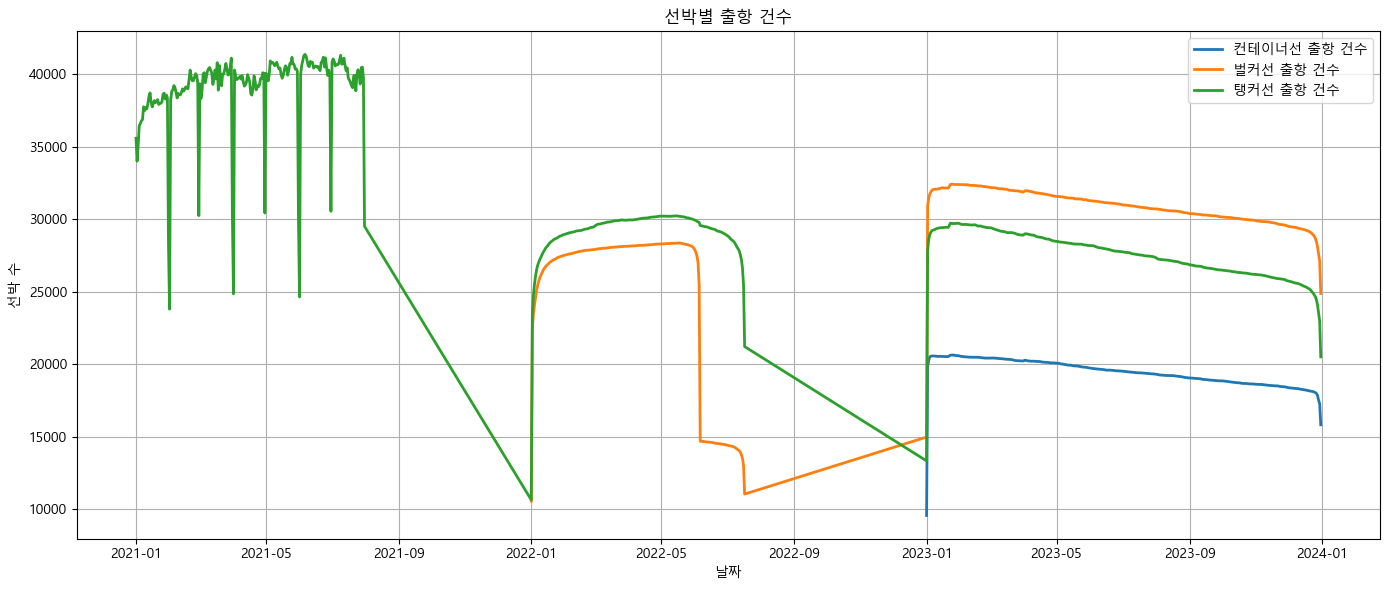

In [97]:
import pandas as pd
import matplotlib.pyplot as plt

# 데이터 불러오기
file_path1 = 'vessel_data/컨테이너선+항로별+Co2+Nox+발생량+데이터+셋.csv'
df1 = pd.read_csv(file_path1)

file_path2 = 'vessel_data/벌커선+항로별+Co2+Nox+발생량+데이터+셋.csv'
df2 = pd.read_csv(file_path2)

file_path3 = 'vessel_data/탱커선+항로별+Co2+Nox+발생량+데이터+셋.csv'
df3 = pd.read_csv(file_path3)

# 컬럼 정리
df1.columns = df1.columns.str.strip().str.replace('"', '').str.replace('\ufeff', '')
df2.columns = df2.columns.str.strip().str.replace('"', '').str.replace('\ufeff', '')
df3.columns = df3.columns.str.strip().str.replace('"', '').str.replace('\ufeff', '')

# 날짜형 변환
df1["YMD"] = pd.to_datetime(df1["YMD"], errors='coerce')
df2["YMD"] = pd.to_datetime(df2["YMD"], errors='coerce')
df3["YMD"] = pd.to_datetime(df3["YMD"], errors='coerce')

# 날짜(시계열) 단위로만 자름 (시간 제거)
df1["YMD"] = df1["YMD"].dt.date
df2["YMD"] = df2["YMD"].dt.date
df3["YMD"] = df3["YMD"].dt.date

# 날짜별 개수 집계
departure_trend1 = df1["YMD"].value_counts().sort_index()
departure_trend2 = df2["YMD"].value_counts().sort_index()
departure_trend3 = df3["YMD"].value_counts().sort_index()

# 시계열 형태로 변환
departure_trend1 = pd.Series(departure_trend1, name="timestep")
departure_trend2 = pd.Series(departure_trend2, name="timestep")
departure_trend3 = pd.Series(departure_trend3, name="timestep")

# 시각화
plt.figure(figsize=(14, 6))
departure_trend1.plot(label="컨테이너선 출항 건수", linewidth=2)
departure_trend2.plot(label="벌커선 출항 건수", linewidth=2)
departure_trend3.plot(label="탱커선 출항 건수", linewidth=2)
plt.title("선박별 출항 건수")
plt.xlabel("날짜")
plt.ylabel("선박 수")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [54]:
# 컨테이너선+선박별+Co2+Nox+발생량+데이터+셋.csv

import pandas as pd

# CSV 파일 경로 지정
file_path = 'vessel_data/컨테이너선+선박별+Co2+Nox+발생량+데이터+셋.csv'
df1 = pd.read_csv(file_path)
df1.head(5)

,MMSI,IMO_IDNTF_NO,SHIP_NM,SHIP_KIND,SHIP_WDTH,SHIP_LNTH,SHIP_HGHT,SHIP_OWNER_NM,DRAFT,SHPYRD_NM,...,AVE_WDSP,ADDTI_RSTC,TOT_RSTC,RL_POWER,FUEL_CNSMP_QTY,CDBX,NOX,SOX,MTHN,SHIP_NRG_EFFCN_NVGTN_IDX
0,542194333,2001153,Plodq3Pdhuvn,Containership,58.6,378.0,33.2,3,16.5,Gdhzrr3GVPH,...,8.06305,201458.0,904417.0,0,22092700000,70829100000,70356300.0,792944.0,206931.0,4.95618
1,542196333,2001165,Prqdfr3Pdhuvn,Containership,58.6,378.0,33.2,3,16.5,Gdhzrr3GVPH,...,7.40464,256647.0,1114890.0,0,26222000000,84067800000,84019500.0,946933.0,247116.0,4.73671
2,542197333,2001141,Prvfrz3Pdhuvn,Containership,58.6,378.5,33.2,3,16.5,Gdhzrr3GVPH,...,7.31660,224939.0,1003620.0,0,23651800000,75827600000,75705600.0,853230.0,222663.0,4.64561
3,542286333,2548498,Mhsshvhq3Pdhuvn,Containership,32.2,195.4,16.4,Pdhuvn,11.2,Yronvzhuiw,...,6.90133,44237.1,316170.0,0,8266390000,26502000000,123069000.0,277405.0,72393.2,11.42510
4,542207333,2548400,Mhqv3Pdhuvn,Containership,32.2,195.4,16.4,Pdhuvn,11.2,Yronvzhuiw,...,5.86577,46276.7,358014.0,0,9239660000,29622400000,138729000.0,312704.0,81604.9,11.64900


In [55]:
# 벌커선+선박별+Co2+Nox+발생량+데이터+셋.csv

import pandas as pd

# CSV 파일 경로 지정
file_path = 'vessel_data/벌커선+선박별+Co2+Nox+발생량+데이터+셋.csv'
df2 = pd.read_csv(file_path)
df2.head(5)

,MMSI,IMO_IDNTF_NO,SHIP_NM,SHIP_KIND,SHIP_WDTH,SHIP_LNTH,SHIP_HGHT,SHIP_OWNER_NM,DRAFT,SHPYRD_NM,...,AVE_WDSP,ADDTI_RSTC,TOT_RSTC,RL_POWER,FUEL_CNSMP_QTY,CDBX,NOX,SOX,MTHN,SHIP_NRG_EFFCN_NVGTN_IDX
0,255806389,9642370,Trina Oldendorff,Bulk Carrier,32.26,217.0,19.6,Oldendorff Carriers,30.0000,Jinglu Shipyard,...,11.04660,30136.5,891820.0,9301320.0,9556890000,29760100000,133939000.0,366212000.0,93013.0,15.2375
1,232006651,9719240,STOLT APAL,Chemical/Oil Product,29.00,185.0,50.0,NaN,25.7615,NaN,...,10.08070,41622.3,890231.0,11313400.0,12748000000,39697400000,38465400.0,488494000.0,113134.0,39.3925
2,232006648,9719264,STOLT LIND,Chemical/Oil Product,28.00,185.0,50.0,NaN,25.7796,NaN,...,9.00329,32486.5,798972.0,9753810.0,11124700000,34642300000,33163000.0,426288000.0,97538.1,32.9985
3,232008101,9744908,STOLT EBONY,Chemical/Oil Product,28.00,185.0,50.0,NaN,25.7521,NaN,...,10.34260,51777.7,870792.0,11106200.0,12492800000,38902400000,37761000.0,478712000.0,111062.0,37.2407
4,232008102,9764491,STOLT MAPLE,Chemical/Oil Product,28.00,185.0,50.0,NaN,25.7827,NaN,...,10.47770,45284.7,1038450.0,12449400.0,13658000000,42530900000,42328100.0,523362000.0,124494.0,36.4853


In [56]:
# 탱커선+선박별+Co2+Nox+발생량+데이터+셋.csv

import pandas as pd

# CSV 파일 경로 지정
file_path = 'vessel_data/탱커선+선박별+Co2+Nox+발생량+데이터+셋.csv'
df3 = pd.read_csv(file_path)
df3.head(5)

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_3508\3743464639.py:7: DtypeWarning: Columns (28) have mixed types. Specify dtype option on import or set low_memory=False.
  df3 = pd.read_csv(file_path)


,MMSI,IMO_IDNTF_NO,SHIP_NM,SHIP_KIND,SHIP_WDTH,SHIP_LNTH,SHIP_HGHT,SHIP_OWNER_NM,DRAFT,SHPYRD_NM,...,AVE_WDSP,ADDTI_RSTC,TOT_RSTC,RL_POWER,FUEL_CNSMP_QTY,CDBX,NOX,SOX,MTHN,SHIP_NRG_EFFCN_NVGTN_IDX
0,209275000,9819882,KAIROS,Bunkering Tanker,20.0,117.00,0.00,NaN,0.0,NaN,...,6.08820,199200000.0,166253000,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.00,0.00000
1,209294000,9334571,TWO MILLION WAYS,Crude Oil Tanker,32.2,219.95,20.65,NaN,13.5,ONOMICHI DOCKYARD,...,4.98075,606561000.0,177953000,1.152770e+10,1.175830e+10,36615.3,4232980.0,11494.1,2489.99,5.79629
2,209296000,9535539,BEETHOVEN,Oil or Chemical Tanker,14.1,98.71,0.00,NaN,0.0,NaN,...,5.82042,646271000.0,115453000,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.00,0.00000
3,209341000,9535541,BERNSTEIN,Oil or Chemical Tanker,14.1,98.71,0.00,NaN,0.0,NaN,...,6.04965,944611000.0,115882000,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.00,0.00000
4,209351000,9768526,NIKOLAY ZUBOV,LNG Tanker,30.2,199.00,16.70,NaN,11.3,HYUNDAI HEAVY INDUSTRIES,...,7.15093,361442000.0,666437000,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.00,0.00000


In [57]:
# 컨테이너선+항로별+Co2+Nox+발생량+데이터+셋.csv

import pandas as pd

# CSV 파일 경로 지정
file_path = 'vessel_data/컨테이너선+항로별+Co2+Nox+발생량+데이터+셋.csv'
df4 = pd.read_csv(file_path)
df4.head(5)

,YMD,MMSI,IMO_IDNTF_NO,LA,LO,VE,SH_DRCN,DRAFT,NVGTN_DIST,WAVE_HGHT,...,WNDRC_V,ADDTI_RSTC,TOT_RSTC,RL_POWER,FUEL_CNSMP_QTY,CDBX,NOX,SOX,MTHN,SHIP_NRG_EFFCN_NVGTN_IDX
0,02-Apr-2023 06:00:00,969354698,2231370,29.889500,122.060997,0.002016,77,12.7,0.012098,0.25,...,-3.28754,192122.0,663038.0,0,16728400000,46003100000,52593800.0,592748.0,3093750.0,4.22047
1,02-Apr-2023 12:00:00,969354698,2231370,29.889400,122.060997,0.001367,77,12.7,0.008202,0.34,...,-1.15437,192122.0,663038.0,0,16728400000,46003100000,52593800.0,592748.0,3093750.0,4.22047
2,02-Apr-2023 18:00:00,969354698,2231370,29.889299,122.060997,0.000820,77,12.7,0.004921,0.37,...,1.30426,192122.0,663038.0,0,16728400000,46003100000,52593800.0,592748.0,3093750.0,4.22047
3,03-Apr-2023 00:00:00,969354698,2231370,29.889400,122.060997,0.002443,77,12.7,0.014661,0.36,...,2.92292,192122.0,663038.0,0,16728400000,46003100000,52593800.0,592748.0,3093750.0,4.22047
4,03-Apr-2023 06:00:00,969354698,2231370,29.889400,122.060997,0.000786,77,12.7,0.004716,0.50,...,5.31297,192122.0,663038.0,0,16728400000,46003100000,52593800.0,592748.0,3093750.0,4.22047


In [58]:
# 벌커선+항로별+Co2+Nox+발생량+데이터+셋.csv

import pandas as pd

# CSV 파일 경로 지정
file_path = 'vessel_data/벌커선+항로별+Co2+Nox+발생량+데이터+셋.csv'
df5 = pd.read_csv(file_path)
df5.head(5)

,YMD,MMSI,IMO_IDNTF_NO,LA,LO,VE,SH_DRCN,DRAFT,NVGTN_DIST,WAVE_HGHT,...,WNDRC_V,ADDTI_RSTC,TOT_RSTC,RL_POWER,FUEL_CNSMP_QTY,CDBX,NOX,SOX,MTHN,SHIP_NRG_EFFCN_NVGTN_IDX
0,15-Mar-2022 06:00:00,538006760,9757589,48.401600,-123.448997,0.045683,351,11.5,0.274099,0.33,...,0.252566,66782.9,966750.0,10102500.0,10336500000,32187800000,34348500.0,396085000.0,101025.0,7.82499
1,15-Mar-2022 12:00:00,538006760,9757589,48.402599,-123.447998,0.117707,59,11.5,0.706242,0.24,...,2.804580,66782.9,966750.0,10102500.0,10336500000,32187800000,34348500.0,396085000.0,101025.0,7.82499
2,15-Mar-2022 18:00:00,538006760,9757589,48.403500,-123.442001,0.088372,273,11.5,0.530236,0.27,...,-0.811152,66782.9,966750.0,10102500.0,10336500000,32187800000,34348500.0,396085000.0,101025.0,7.82499
3,16-Mar-2022 00:00:00,538006760,9757589,48.402901,-123.442001,0.040175,281,11.5,0.241049,0.36,...,2.994930,66782.9,966750.0,10102500.0,10336500000,32187800000,34348500.0,396085000.0,101025.0,7.82499
4,16-Mar-2022 06:00:00,538006760,9757589,48.404099,-123.442001,0.043657,238,11.5,0.261943,0.31,...,1.984950,66782.9,966750.0,10102500.0,10336500000,32187800000,34348500.0,396085000.0,101025.0,7.82499


In [59]:
# 탱커선+항로별+Co2+Nox+발생량+데이터+셋.csv

import pandas as pd

# CSV 파일 경로 지정
file_path = 'vessel_data/탱커선+항로별+Co2+Nox+발생량+데이터+셋.csv'
df6 = pd.read_csv(file_path)
df6.head(5)

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_3508\3218799500.py:7: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  df6 = pd.read_csv(file_path)


,YMD,MMSI,LA,LO,VE,SH_DRCN,IMO_IDNTF_NO,DRAFT,CRG_TYP,NVGTN_DIST,...,WNDRC_V,ADDTI_RSTC,TOT_RSTC,RL_POWER,FUEL_CNSMP_QTY,CDBX,NOX,SOX,MTHN,SHIP_NRG_EFFCN_NVGTN_IDX
0,15-Apr-2021 12:00:00,100000001,2.81496,9.83116,0.001575,212,7924932,0.0,0.0,17.5035,...,-0.536819,17063300.0,15.8726,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,15-Apr-2021 18:00:00,100000001,2.81495,9.83120,0.001613,212,7924932,0.0,0.0,17.9187,...,3.022390,17063300.0,15.8726,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,16-Apr-2021 00:00:00,100000001,2.81496,9.83121,0.000923,210,7924932,0.0,0.0,10.2569,...,1.769070,17063300.0,15.8726,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,16-Apr-2021 06:00:00,100000001,2.81496,9.83117,0.000686,210,7924932,0.0,0.0,7.6248,...,1.925740,17063300.0,15.8726,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,16-Apr-2021 12:00:00,100000001,2.81496,9.83120,0.000830,211,7924932,0.0,0.0,9.2195,...,1.702110,17063300.0,15.8726,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [61]:
df_joined = pd.merge(df1, df4, on=["MMSI", "IMO_IDNTF_NO"], how="left")
df_joined.head(5)


,MMSI,IMO_IDNTF_NO,SHIP_NM,SHIP_KIND,SHIP_WDTH,SHIP_LNTH,SHIP_HGHT,SHIP_OWNER_NM,DRAFT_x,SHPYRD_NM,...,WNDRC_V,ADDTI_RSTC_y,TOT_RSTC_y,RL_POWER_y,FUEL_CNSMP_QTY_y,CDBX_y,NOX_y,SOX_y,MTHN_y,SHIP_NRG_EFFCN_NVGTN_IDX_y
0,542194333,2001153,Plodq3Pdhuvn,Containership,58.6,378.0,33.2,3,16.5,Gdhzrr3GVPH,...,4.05098,201458.0,904417.0,0.0,2.209270e+10,7.082910e+10,70356300.0,792944.0,206931.0,4.95618
1,542194333,2001153,Plodq3Pdhuvn,Containership,58.6,378.0,33.2,3,16.5,Gdhzrr3GVPH,...,3.22012,201458.0,904417.0,0.0,2.209270e+10,7.082910e+10,70356300.0,792944.0,206931.0,4.95618
2,542194333,2001153,Plodq3Pdhuvn,Containership,58.6,378.0,33.2,3,16.5,Gdhzrr3GVPH,...,1.72359,201458.0,904417.0,0.0,2.209270e+10,7.082910e+10,70356300.0,792944.0,206931.0,4.95618
3,542194333,2001153,Plodq3Pdhuvn,Containership,58.6,378.0,33.2,3,16.5,Gdhzrr3GVPH,...,1.06307,201458.0,904417.0,0.0,2.209270e+10,7.082910e+10,70356300.0,792944.0,206931.0,4.95618
4,542194333,2001153,Plodq3Pdhuvn,Containership,58.6,378.0,33.2,3,16.5,Gdhzrr3GVPH,...,4.03383,201458.0,904417.0,0.0,2.209270e+10,7.082910e+10,70356300.0,792944.0,206931.0,4.95618


파일 크기 정보:
컨테이너선 선박별: 1.96 MB
벌커선 선박별: 5.67 MB
탱커선 선박별: 12.88 MB
컨테이너선 항로별: 1545.01 MB
벌커선 항로별: 3560.51 MB
탱커선 항로별: 5099.93 MB

선박별 데이터 로드 중...
- 컨테이너선 선박별 데이터: 5255행
- 벌커선 선박별 데이터: 15428행
- 탱커선 선박별 데이터: 37196행
통합 선박별 데이터: 57879행

선박 유형 및 종류별 요약:
   SHIP_TYPE                    SHIP_KIND  ship_count   SHIP_LNTH  SHIP_WDTH  \
0       벌커선                            0           1  452.000000  10.000000   
1       벌커선           Aggregates Carrier          50   73.638397  14.110800   
2       벌커선               Anti-Pollution           1   62.000000   8.000000   
3       벌커선                 BULK CARRIER        2242  178.563599  30.065653   
4       벌커선  Bulk & Caustic Soda Carrier           7  219.797150  32.264286   
5       벌커선                 Bulk Carrier        3574  226.680389  35.665314   
6       벌커선                 Bulk carrier        7843  213.257233  34.022121   
7       벌커선             Bulk/Oil Carrier           3  228.000000  34.666668   
8       벌커선                       Bulker  

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_3508\675649216.py:161: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  env_summary = chunk.groupby(pd.cut(chunk['WAVE_HGHT'], bins=5)).agg({


  청크 1 처리 완료


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_3508\675649216.py:161: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  env_summary = chunk.groupby(pd.cut(chunk['WAVE_HGHT'], bins=5)).agg({


  청크 2 처리 완료


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_3508\675649216.py:161: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  env_summary = chunk.groupby(pd.cut(chunk['WAVE_HGHT'], bins=5)).agg({


  청크 3 처리 완료


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_3508\675649216.py:161: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  env_summary = chunk.groupby(pd.cut(chunk['WAVE_HGHT'], bins=5)).agg({


  청크 4 처리 완료


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_3508\675649216.py:161: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  env_summary = chunk.groupby(pd.cut(chunk['WAVE_HGHT'], bins=5)).agg({


  청크 5 처리 완료


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_3508\675649216.py:161: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  env_summary = chunk.groupby(pd.cut(chunk['WAVE_HGHT'], bins=5)).agg({


  청크 6 처리 완료


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_3508\675649216.py:161: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  env_summary = chunk.groupby(pd.cut(chunk['WAVE_HGHT'], bins=5)).agg({


  청크 7 처리 완료


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_3508\675649216.py:161: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  env_summary = chunk.groupby(pd.cut(chunk['WAVE_HGHT'], bins=5)).agg({


  청크 8 처리 완료


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_3508\675649216.py:161: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  env_summary = chunk.groupby(pd.cut(chunk['WAVE_HGHT'], bins=5)).agg({


  청크 9 처리 완료


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_3508\675649216.py:161: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  env_summary = chunk.groupby(pd.cut(chunk['WAVE_HGHT'], bins=5)).agg({


  청크 10 처리 완료

벌커선 항로 데이터 처리...


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_3508\675649216.py:199: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  env_summary = chunk.groupby(pd.cut(chunk['WAVE_HGHT'], bins=5)).agg({


  청크 1 처리 완료


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_3508\675649216.py:199: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  env_summary = chunk.groupby(pd.cut(chunk['WAVE_HGHT'], bins=5)).agg({


  청크 2 처리 완료


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_3508\675649216.py:199: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  env_summary = chunk.groupby(pd.cut(chunk['WAVE_HGHT'], bins=5)).agg({


  청크 3 처리 완료


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_3508\675649216.py:199: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  env_summary = chunk.groupby(pd.cut(chunk['WAVE_HGHT'], bins=5)).agg({


  청크 4 처리 완료


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_3508\675649216.py:199: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  env_summary = chunk.groupby(pd.cut(chunk['WAVE_HGHT'], bins=5)).agg({
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_3508\675649216.py:199: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  env_summary = chunk.groupby(pd.cut(chunk['WAVE_HGHT'], bins=5)).agg({


  청크 5 처리 완료
  청크 6 처리 완료


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_3508\675649216.py:199: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  env_summary = chunk.groupby(pd.cut(chunk['WAVE_HGHT'], bins=5)).agg({


  청크 7 처리 완료


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_3508\675649216.py:199: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  env_summary = chunk.groupby(pd.cut(chunk['WAVE_HGHT'], bins=5)).agg({


  청크 8 처리 완료


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_3508\675649216.py:199: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  env_summary = chunk.groupby(pd.cut(chunk['WAVE_HGHT'], bins=5)).agg({


  청크 9 처리 완료


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_3508\675649216.py:199: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  env_summary = chunk.groupby(pd.cut(chunk['WAVE_HGHT'], bins=5)).agg({


  청크 10 처리 완료

탱커선 항로 데이터 처리...


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_3508\675649216.py:239: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  env_summary = chunk.groupby(pd.cut(chunk['WAVE_HGHT'], bins=5)).agg({


  청크 1 처리 완료


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_3508\675649216.py:239: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  env_summary = chunk.groupby(pd.cut(chunk['WAVE_HGHT'], bins=5)).agg({


  청크 2 처리 완료


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_3508\675649216.py:239: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  env_summary = chunk.groupby(pd.cut(chunk['WAVE_HGHT'], bins=5)).agg({


  청크 3 처리 완료


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_3508\675649216.py:239: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  env_summary = chunk.groupby(pd.cut(chunk['WAVE_HGHT'], bins=5)).agg({


  청크 4 처리 완료


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_3508\675649216.py:239: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  env_summary = chunk.groupby(pd.cut(chunk['WAVE_HGHT'], bins=5)).agg({


  청크 5 처리 완료


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_3508\675649216.py:239: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  env_summary = chunk.groupby(pd.cut(chunk['WAVE_HGHT'], bins=5)).agg({


  청크 6 처리 완료


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_3508\675649216.py:239: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  env_summary = chunk.groupby(pd.cut(chunk['WAVE_HGHT'], bins=5)).agg({


  청크 7 처리 완료


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_3508\675649216.py:239: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  env_summary = chunk.groupby(pd.cut(chunk['WAVE_HGHT'], bins=5)).agg({


  청크 8 처리 완료


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_3508\675649216.py:239: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  env_summary = chunk.groupby(pd.cut(chunk['WAVE_HGHT'], bins=5)).agg({


  청크 9 처리 완료


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_3508\675649216.py:239: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  env_summary = chunk.groupby(pd.cut(chunk['WAVE_HGHT'], bins=5)).agg({


  청크 10 처리 완료

항로 데이터 청크 처리 완료
- 파고별 요약 데이터: 150행
- 월별 배출량 데이터: 260행

시각화 생성 중...
1. 선박 유형별 오염물질 배출량 그래프 생성...


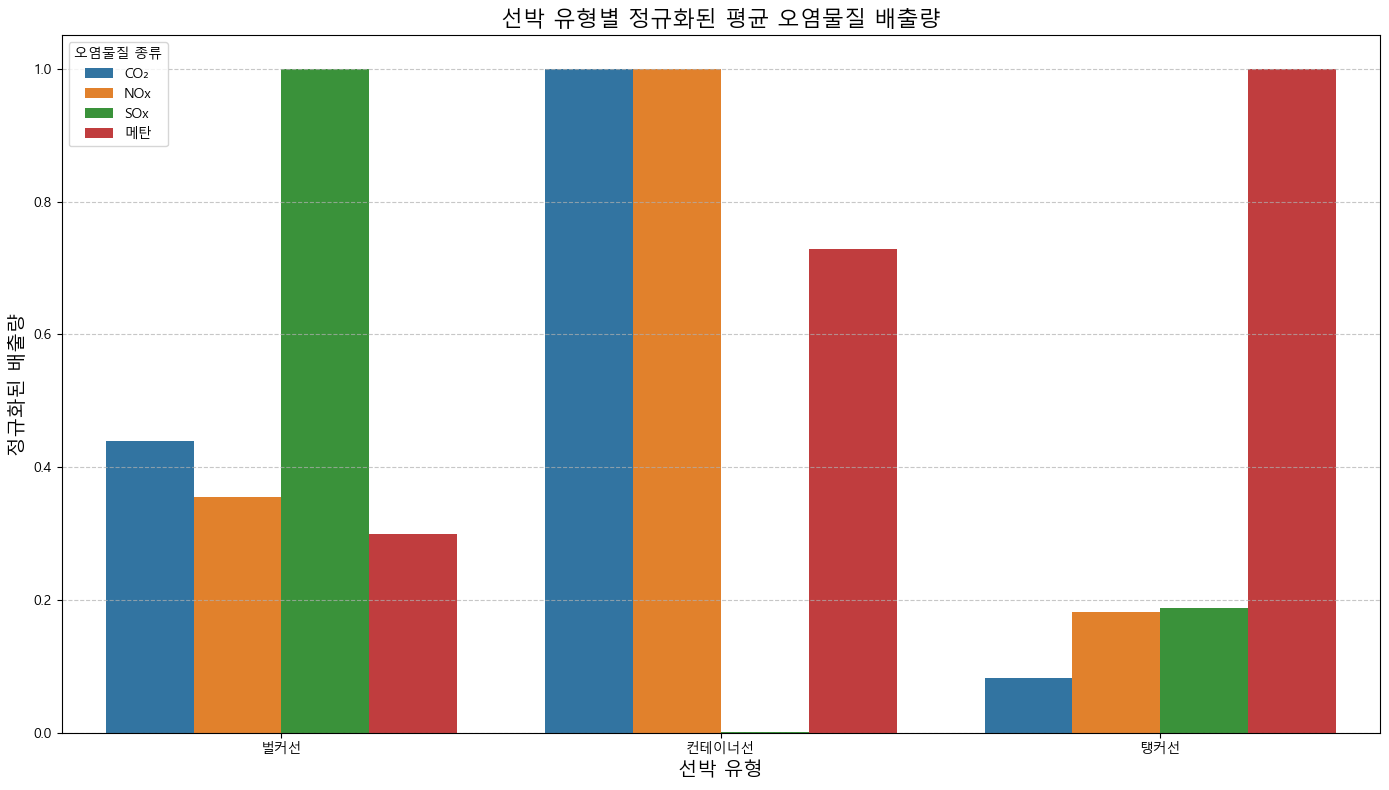

2. 선박 종류별 크기와 배출량 그래프 생성...


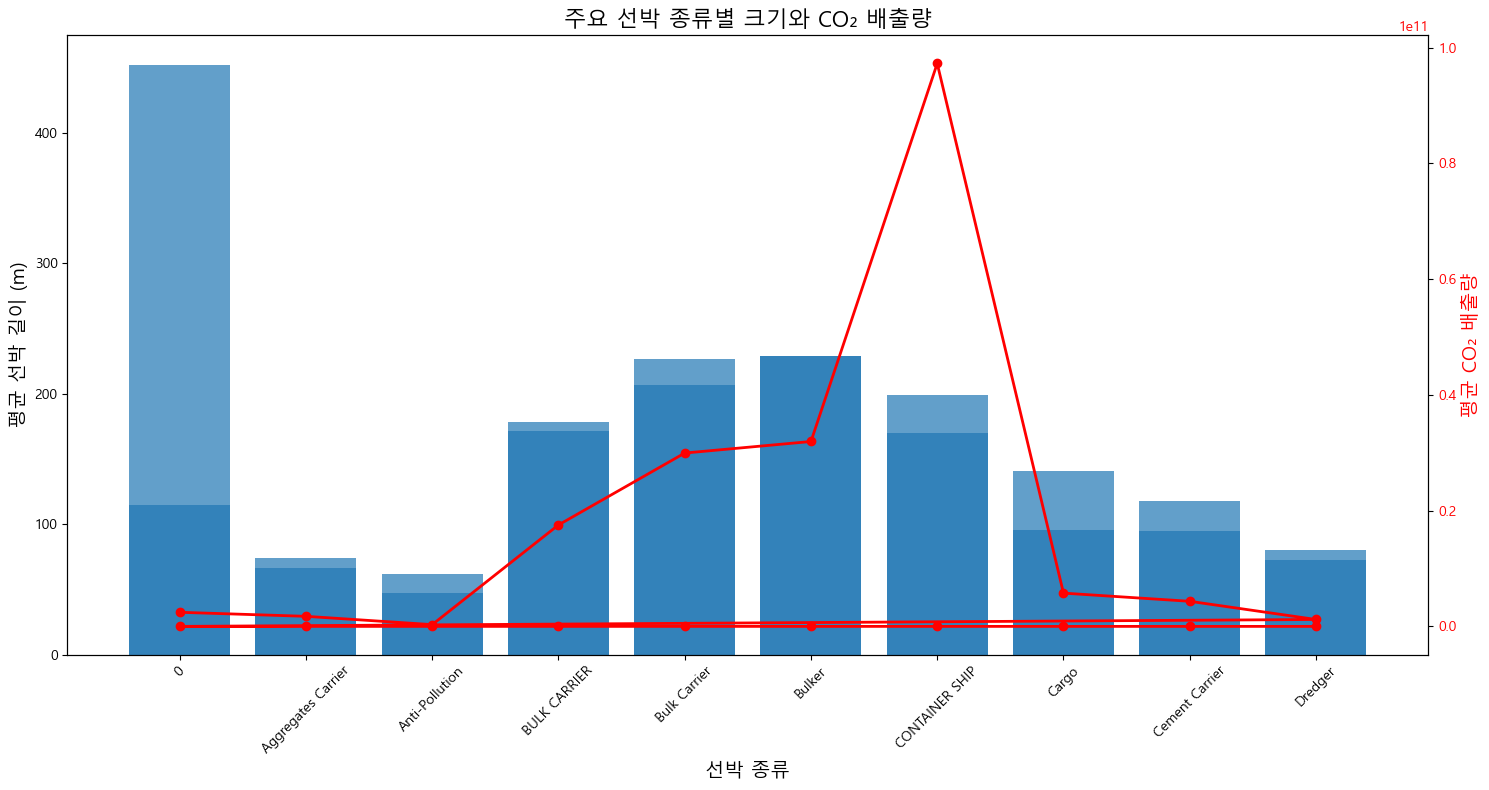

3. 파고에 따른 연료 소비량 그래프 생성...


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_3508\675649216.py:358: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['wave_mid'] = subset['WAVE_HGHT'].apply(lambda x: (x.left + x.right) / 2 if hasattr(x, 'left') else 0)
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_3508\675649216.py:358: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['wave_mid'] = subset['WAVE_HGHT'].apply(lambda x: (x.left + x.right) / 2 if hasattr(x, 'left') else 0)
C:\Users\Public\Documents\ESTsoft\CreatorT

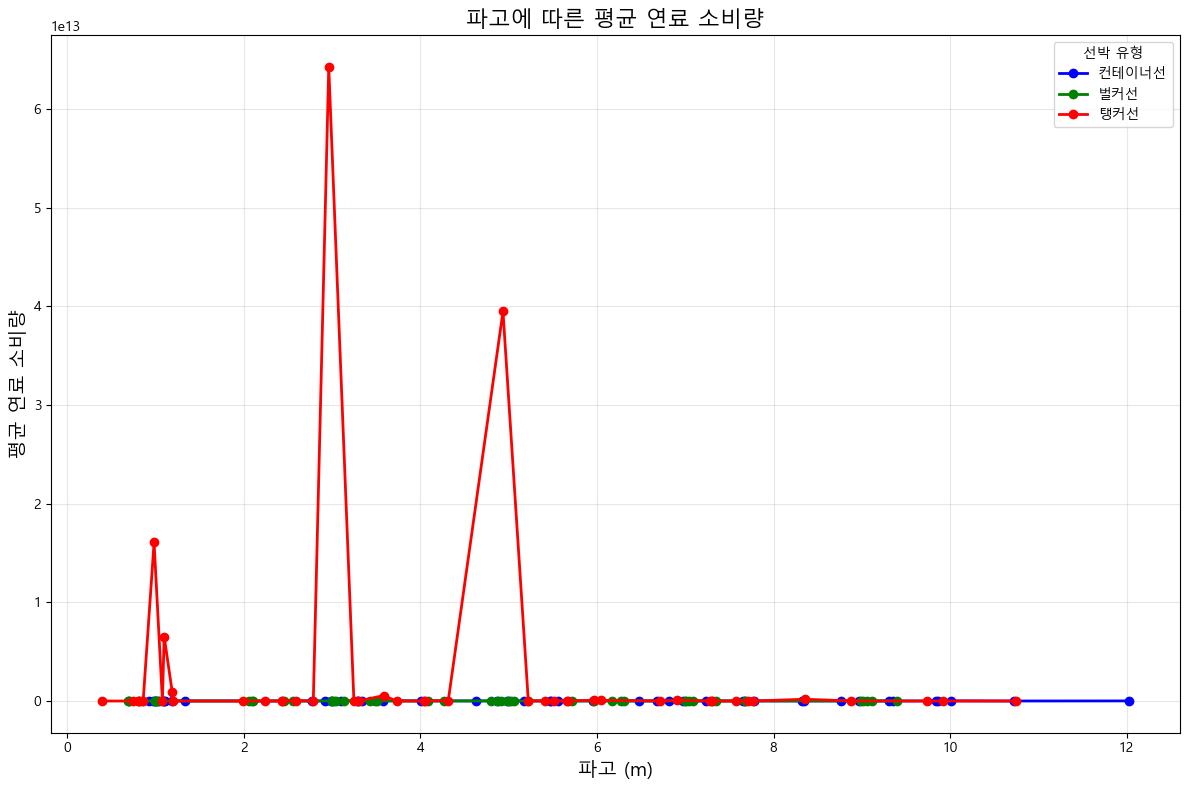

4. 월별 CO₂/NOx 배출량 추이 그래프 생성...


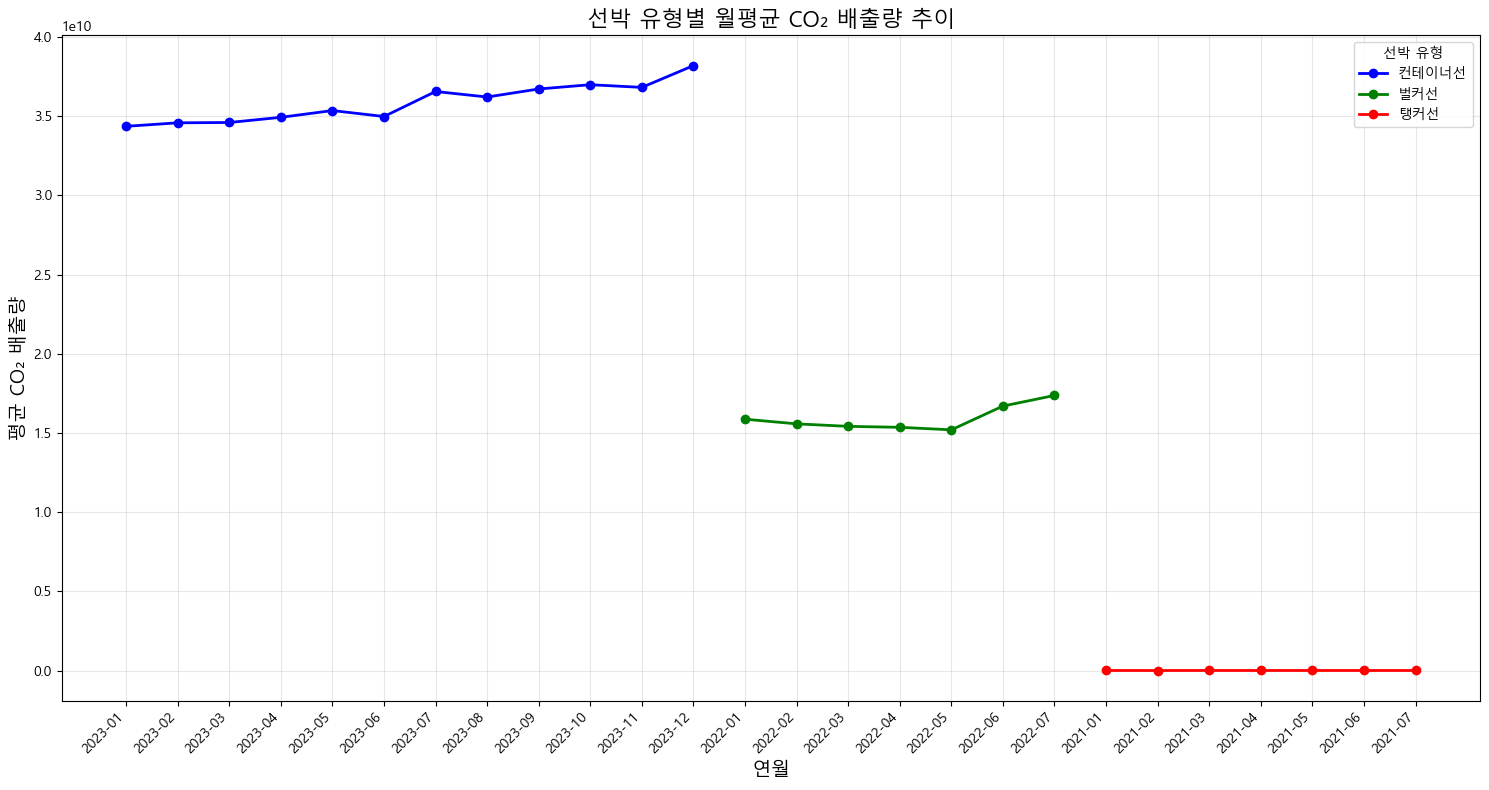

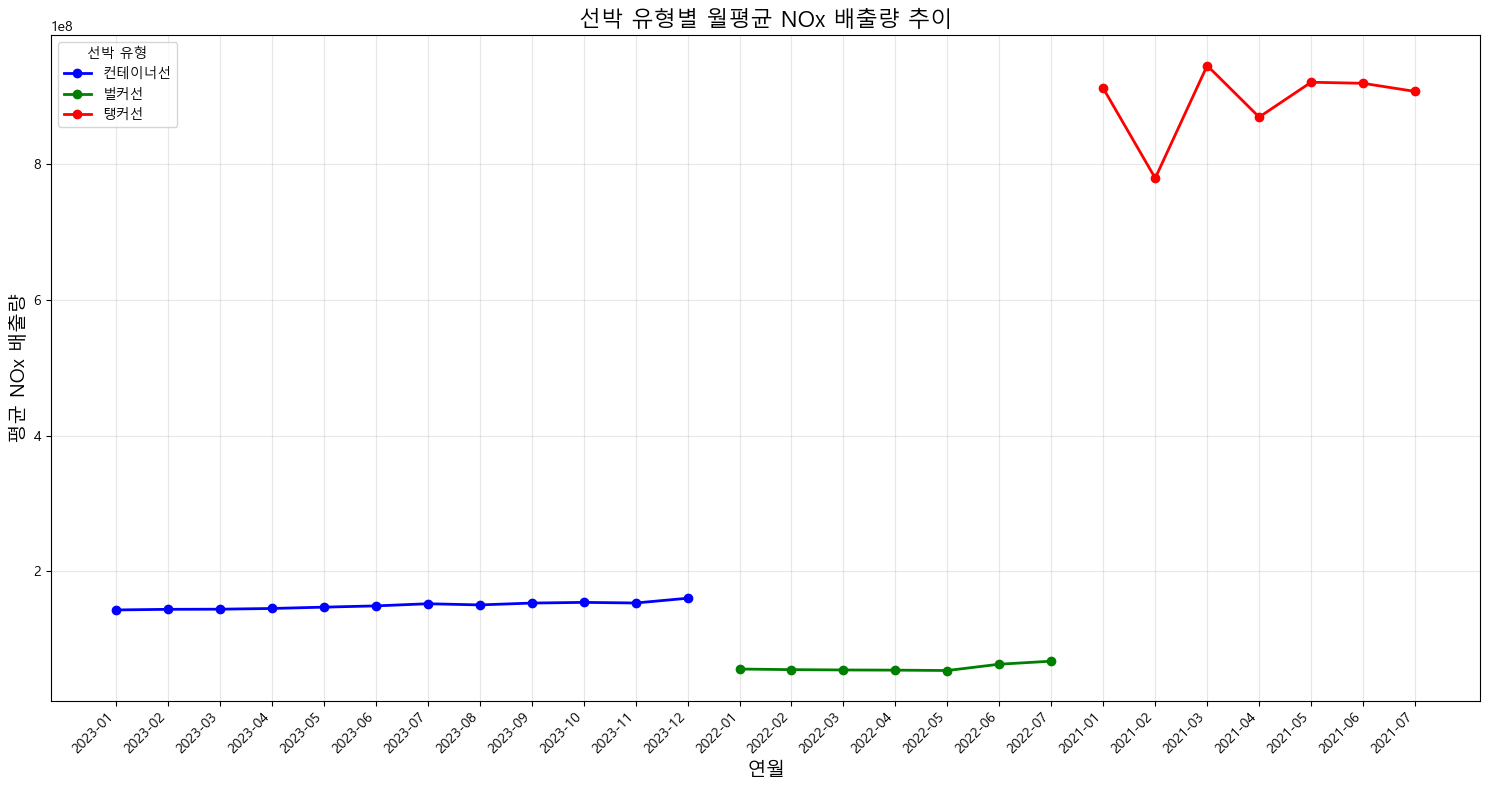

5. 연료 소비량과 CO₂ 배출량 관계 그래프 생성...


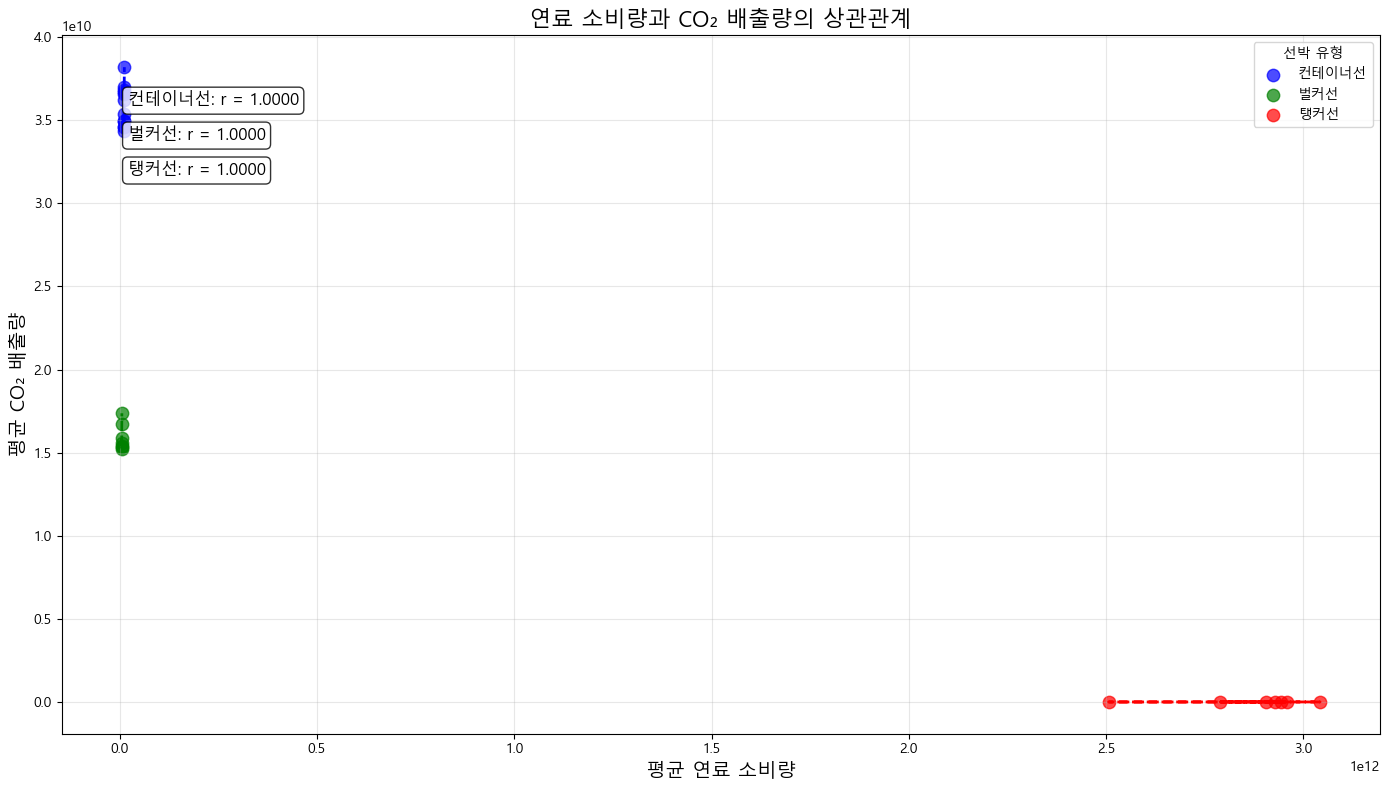


모든 분석 완료. 그래프가 저장되었습니다.


In [69]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib import font_manager, rc
import matplotlib as mpl
import gc  # 가비지 컬렉션
import os  # 파일 크기 확인용

# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'  # Windows 환경
mpl.rcParams['axes.unicode_minus'] = False

# 데이터 파일 경로
container_ship_path = 'vessel_data/컨테이너선+선박별+Co2+Nox+발생량+데이터+셋.csv'
bulk_ship_path = 'vessel_data/벌커선+선박별+Co2+Nox+발생량+데이터+셋.csv'
tanker_ship_path = 'vessel_data/탱커선+선박별+Co2+Nox+발생량+데이터+셋.csv'
container_route_path = 'vessel_data/컨테이너선+항로별+Co2+Nox+발생량+데이터+셋.csv'
bulk_route_path = 'vessel_data/컨테이너선+항로별+Co2+Nox+발생량+데이터+셋.csv'
tanker_route_path = 'vessel_data/탱커선+항로별+Co2+Nox+발생량+데이터+셋.csv'

# 파일 크기 확인 함수
def check_file_size(file_path):
    """파일 크기를 MB 단위로 반환"""
    if os.path.exists(file_path):
        size_bytes = os.path.getsize(file_path)
        size_mb = size_bytes / (1024 * 1024)
        return f"{size_mb:.2f} MB"
    return "파일이 존재하지 않습니다"

# 모든 파일 크기 출력
print("파일 크기 정보:")
print(f"컨테이너선 선박별: {check_file_size(container_ship_path)}")
print(f"컨테이너선 선박별: {check_file_size(bulk_ship_path)}")
print(f"탱커선 선박별: {check_file_size(tanker_ship_path)}")
print(f"컨테이너선 항로별: {check_file_size(container_route_path)}")
print(f"컨테이너선 항로별: {check_file_size(bulk_route_path)}")
print(f"탱커선 항로별: {check_file_size(tanker_route_path)}\n")

# 데이터 타입 최적화 함수
def optimize_dtypes(df):
    """데이터프레임의 메모리 사용량을 줄이기 위해 데이터 타입을 최적화"""
    for col in df.columns:
        # 정수형 컬럼 최적화
        if pd.api.types.is_integer_dtype(df[col]):
            if (df[col] >= 0).all():
                if df[col].max() < 255:
                    df[col] = df[col].astype('uint8')
                elif df[col].max() < 65535:
                    df[col] = df[col].astype('uint16')
                elif df[col].max() < 4294967295:
                    df[col] = df[col].astype('uint32')
            else:
                if df[col].min() > -128 and df[col].max() < 127:
                    df[col] = df[col].astype('int8')
                elif df[col].min() > -32768 and df[col].max() < 32767:
                    df[col] = df[col].astype('int16')
                elif df[col].min() > -2147483648 and df[col].max() < 2147483647:
                    df[col] = df[col].astype('int32')
        
        # 부동소수점 컬럼 최적화
        elif pd.api.types.is_float_dtype(df[col]):
            df[col] = df[col].astype('float32')
    
    return df

# 필요한 컬럼만 선택
essential_ship_cols = [
    'MMSI', 'IMO_IDNTF_NO', 'SHIP_KIND',
    'SHIP_WDTH', 'SHIP_LNTH', 'SHIP_HGHT',
    'FUEL_CNSMP_QTY', 'CDBX', 'NOX', 'SOX', 'MTHN', 
    'SHIP_NRG_EFFCN_NVGTN_IDX'
]

essential_route_cols = [
    'YMD', 'MMSI', 'IMO_IDNTF_NO', 'VE', 
    'WAVE_HGHT', 'FUEL_CNSMP_QTY', 'CDBX', 
    'NOX', 'SOX', 'MTHN'
]

# ----- 선박별 데이터 처리 -----

print("선박별 데이터 로드 중...")

# 선박별 데이터는 비교적 작으므로 직접 로드
df1 = optimize_dtypes(pd.read_csv(container_ship_path, usecols=essential_ship_cols))
df1['SHIP_TYPE'] = '컨테이너선'
print(f"- 컨테이너선 선박별 데이터: {len(df1)}행")

df2 = optimize_dtypes(pd.read_csv(bulk_ship_path, usecols=essential_ship_cols))
df2['SHIP_TYPE'] = '벌커선'
print(f"- 벌커선 선박별 데이터: {len(df2)}행")

df3 = optimize_dtypes(pd.read_csv(tanker_ship_path, usecols=essential_ship_cols, 
                                 low_memory=False))
df3['SHIP_TYPE'] = '탱커선'
print(f"- 탱커선 선박별 데이터: {len(df3)}행")

# 선박별 데이터 통합
all_ships = pd.concat([df1, df2, df3], ignore_index=True)
print(f"통합 선박별 데이터: {len(all_ships)}행")

# 선박 유형별 집계 데이터 생성
ship_summary = all_ships.groupby(['SHIP_TYPE', 'SHIP_KIND']).agg({
    'MMSI': 'nunique',
    'SHIP_LNTH': 'mean',
    'SHIP_WDTH': 'mean',
    'FUEL_CNSMP_QTY': 'mean',
    'CDBX': 'mean',
    'NOX': 'mean',
    'SOX': 'mean',
    'MTHN': 'mean'
}).reset_index()

ship_summary.rename(columns={'MMSI': 'ship_count'}, inplace=True)
print("\n선박 유형 및 종류별 요약:\n", ship_summary.head(10))

# 메모리 확보
del df1, df2, df3
gc.collect()

# ----- 항로별 데이터 청크 처리 -----

print("\n항로별 데이터 청크 처리 중...")

# 선박 유형별 항로 데이터 요약 저장용 DataFrame 초기화
route_summary_container = pd.DataFrame()
route_summary_bulk = pd.DataFrame()
route_summary_tanker = pd.DataFrame()

# 월별 배출량 추이 분석용 DataFrame 초기화
monthly_emissions = pd.DataFrame()

# 1. 컨테이너선 항로 데이터 청크 처리
chunk_size = 100000  # 각 청크의 크기
chunks_processed = 0
total_chunks = 10  # 최대 처리할 청크 수 제한

print("컨테이너선 항로 데이터 처리...")
for chunk in pd.read_csv(container_route_path, 
                       usecols=essential_route_cols, 
                       chunksize=chunk_size):
    # 청크 최적화
    chunk = optimize_dtypes(chunk)
    chunk['SHIP_TYPE'] = '컨테이너선'
    
    # 날짜 변환
    chunk['YMD'] = pd.to_datetime(chunk['YMD'], format="%d-%b-%Y %H:%M:%S", errors='coerce')
    chunk['month'] = chunk['YMD'].dt.to_period('M')
    
    # 월별 집계 데이터 추가
    month_summary = chunk.groupby('month').agg({
        'CDBX': 'mean',
        'NOX': 'mean',
        'FUEL_CNSMP_QTY': 'mean'
    }).reset_index()
    month_summary['SHIP_TYPE'] = '컨테이너선'
    monthly_emissions = pd.concat([monthly_emissions, month_summary])
    
    # 환경 요소별 집계
    env_summary = chunk.groupby(pd.cut(chunk['WAVE_HGHT'], bins=5)).agg({
        'CDBX': 'mean',
        'NOX': 'mean',
        'FUEL_CNSMP_QTY': 'mean'
    }).reset_index()
    env_summary['SHIP_TYPE'] = '컨테이너선'
    route_summary_container = pd.concat([route_summary_container, env_summary])
    
    chunks_processed += 1
    print(f"  청크 {chunks_processed} 처리 완료")
    
    if chunks_processed >= total_chunks:
        break

# 2. 벌커선 항로 데이터 청크 처리
chunks_processed = 0
print("\n벌커선 항로 데이터 처리...")
for chunk in pd.read_csv(bulk_route_path, 
                       usecols=essential_route_cols, 
                       chunksize=chunk_size):
    # 청크 최적화
    chunk = optimize_dtypes(chunk)
    chunk['SHIP_TYPE'] = '벌커선'
    
    # 날짜 변환
    chunk['YMD'] = pd.to_datetime(chunk['YMD'], format="%d-%b-%Y %H:%M:%S", errors='coerce')
    chunk['month'] = chunk['YMD'].dt.to_period('M')
    
    # 월별 집계 데이터 추가
    month_summary = chunk.groupby('month').agg({
        'CDBX': 'mean',
        'NOX': 'mean',
        'FUEL_CNSMP_QTY': 'mean'
    }).reset_index()
    month_summary['SHIP_TYPE'] = '벌커선'
    monthly_emissions = pd.concat([monthly_emissions, month_summary])
    
    # 환경 요소별 집계
    env_summary = chunk.groupby(pd.cut(chunk['WAVE_HGHT'], bins=5)).agg({
        'CDBX': 'mean',
        'NOX': 'mean',
        'FUEL_CNSMP_QTY': 'mean'
    }).reset_index()
    env_summary['SHIP_TYPE'] = '벌커선'
    route_summary_bulk = pd.concat([route_summary_bulk, env_summary])
    
    chunks_processed += 1
    print(f"  청크 {chunks_processed} 처리 완료")
    
    if chunks_processed >= total_chunks:
        break

# 3. 탱커선 항로 데이터 청크 처리
chunks_processed = 0
print("\n탱커선 항로 데이터 처리...")
try:
    for chunk in pd.read_csv(tanker_route_path, 
                           usecols=essential_route_cols, 
                           chunksize=chunk_size,
                           low_memory=False):
        # 청크 최적화
        chunk = optimize_dtypes(chunk)
        chunk['SHIP_TYPE'] = '탱커선'
        
        # 날짜 변환
        chunk['YMD'] = pd.to_datetime(chunk['YMD'], format="%d-%b-%Y %H:%M:%S", errors='coerce')
        chunk['month'] = chunk['YMD'].dt.to_period('M')
        
        # 월별 집계 데이터 추가
        month_summary = chunk.groupby('month').agg({
            'CDBX': 'mean',
            'NOX': 'mean',
            'FUEL_CNSMP_QTY': 'mean'
        }).reset_index()
        month_summary['SHIP_TYPE'] = '탱커선'
        monthly_emissions = pd.concat([monthly_emissions, month_summary])
        
        # 환경 요소별 집계
        env_summary = chunk.groupby(pd.cut(chunk['WAVE_HGHT'], bins=5)).agg({
            'CDBX': 'mean',
            'NOX': 'mean',
            'FUEL_CNSMP_QTY': 'mean'
        }).reset_index()
        env_summary['SHIP_TYPE'] = '탱커선'
        route_summary_tanker = pd.concat([route_summary_tanker, env_summary])
        
        chunks_processed += 1
        print(f"  청크 {chunks_processed} 처리 완료")
        
        if chunks_processed >= total_chunks:
            break
except Exception as e:
    print(f"탱커선 데이터 처리 중 오류 발생: {e}")
    print("일부 데이터만 처리하고 계속 진행합니다.")

# 항로 요약 데이터 통합
route_summary = pd.concat([
    route_summary_container, 
    route_summary_bulk, 
    route_summary_tanker
], ignore_index=True)

print("\n항로 데이터 청크 처리 완료")
print(f"- 파고별 요약 데이터: {len(route_summary)}행")
print(f"- 월별 배출량 데이터: {len(monthly_emissions)}행")

# 월별 데이터 중복 제거 및 정렬
monthly_emissions = monthly_emissions.groupby(['month', 'SHIP_TYPE']).mean().reset_index()
monthly_emissions['month_str'] = monthly_emissions['month'].astype(str)
monthly_emissions.sort_values('month', inplace=True)

# ----- 시각화 -----

print("\n시각화 생성 중...")

# 1. 선박 유형별 평균 오염물질 배출량 비교
print("1. 선박 유형별 오염물질 배출량 그래프 생성...")
plt.figure(figsize=(14, 8))

# 선박 유형별 평균 계산
type_summary = ship_summary.groupby('SHIP_TYPE').agg({
    'CDBX': 'mean',
    'NOX': 'mean',
    'SOX': 'mean',
    'MTHN': 'mean'
}).reset_index()

# 데이터 정규화
for col in ['CDBX', 'NOX', 'SOX', 'MTHN']:
    max_val = type_summary[col].max()
    if max_val > 0:
        type_summary[f'{col}_norm'] = type_summary[col] / max_val
    else:
        type_summary[f'{col}_norm'] = 0

# 멀티바 차트
emission_melted = pd.melt(
    type_summary, 
    id_vars=['SHIP_TYPE'], 
    value_vars=['CDBX_norm', 'NOX_norm', 'SOX_norm', 'MTHN_norm'],
    var_name='오염물질', 
    value_name='정규화된 배출량'
)

# 오염물질 이름 매핑
emission_melted['오염물질'] = emission_melted['오염물질'].str.replace('_norm', '')
emission_melted['오염물질'] = emission_melted['오염물질'].map({
    'CDBX': 'CO₂',
    'NOX': 'NOx',
    'SOX': 'SOx',
    'MTHN': '메탄'
})

# 그래프 그리기
sns.barplot(x='SHIP_TYPE', y='정규화된 배출량', hue='오염물질', data=emission_melted)
plt.title('선박 유형별 정규화된 평균 오염물질 배출량', fontsize=16)
plt.xlabel('선박 유형', fontsize=14)
plt.ylabel('정규화된 배출량', fontsize=14)
plt.legend(title='오염물질 종류')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('선박유형별_오염물질.png', dpi=300, bbox_inches='tight')
plt.show()

# 2. 선박 종류별 크기와 오염물질 배출량
print("2. 선박 종류별 크기와 배출량 그래프 생성...")
# 상위 10개 선박 종류 선택
top_kinds = ship_summary.groupby('SHIP_KIND').size().nlargest(10).index
ship_top10 = ship_summary[ship_summary['SHIP_KIND'].isin(top_kinds)]

plt.figure(figsize=(15, 8))
ax1 = plt.subplot(111)
bars = ax1.bar(ship_top10['SHIP_KIND'], ship_top10['SHIP_LNTH'], alpha=0.7)
ax1.set_ylabel('평균 선박 길이 (m)', fontsize=14)
ax1.set_xlabel('선박 종류', fontsize=14)
ax1.tick_params(axis='x', rotation=45)

# 두번째 y축: 평균 CO2 배출량
ax2 = ax1.twinx()
ax2.plot(ship_top10['SHIP_KIND'], ship_top10['CDBX'], 'ro-', linewidth=2)
ax2.set_ylabel('평균 CO₂ 배출량', color='r', fontsize=14)
ax2.tick_params(axis='y', labelcolor='r')

plt.title('주요 선박 종류별 크기와 CO₂ 배출량', fontsize=16)
plt.tight_layout()
plt.savefig('선박종류별_크기_배출량.png', dpi=300, bbox_inches='tight')
plt.show()

# 3. 파고에 따른 연료 소비량
print("3. 파고에 따른 연료 소비량 그래프 생성...")
plt.figure(figsize=(12, 8))

# 파고별 연료 소비량을 선박 유형별로 시각화
for ship_type, color in zip(['컨테이너선', '벌커선', '탱커선'], ['blue', 'green', 'red']):
    subset = route_summary[route_summary['SHIP_TYPE'] == ship_type]
    if not subset.empty:
        # 각 파고 구간의 중앙값 계산
        subset['wave_mid'] = subset['WAVE_HGHT'].apply(lambda x: (x.left + x.right) / 2 if hasattr(x, 'left') else 0)
        # 구간별 평균 재계산
        wave_summary = subset.groupby('wave_mid')['FUEL_CNSMP_QTY'].mean().reset_index()
        # 정렬
        wave_summary = wave_summary.sort_values('wave_mid')
        plt.plot(wave_summary['wave_mid'], wave_summary['FUEL_CNSMP_QTY'], 
                 'o-', color=color, linewidth=2, label=ship_type)

plt.title('파고에 따른 평균 연료 소비량', fontsize=16)
plt.xlabel('파고 (m)', fontsize=14)
plt.ylabel('평균 연료 소비량', fontsize=14)
plt.legend(title='선박 유형')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('파고별_연료소비량.png', dpi=300, bbox_inches='tight')
plt.show()

# 4. 월별 배출량 추이
print("4. 월별 CO₂/NOx 배출량 추이 그래프 생성...")
plt.figure(figsize=(15, 8))

# CO₂ 배출량 추이
for ship_type, color in zip(['컨테이너선', '벌커선', '탱커선'], ['blue', 'green', 'red']):
    subset = monthly_emissions[monthly_emissions['SHIP_TYPE'] == ship_type]
    if not subset.empty:
        plt.plot(subset['month_str'], subset['CDBX'], 'o-', 
                 color=color, linewidth=2, label=ship_type)

plt.title('선박 유형별 월평균 CO₂ 배출량 추이', fontsize=16)
plt.xlabel('연월', fontsize=14)
plt.ylabel('평균 CO₂ 배출량', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.legend(title='선박 유형')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('월별_CO2_추이.png', dpi=300, bbox_inches='tight')
plt.show()

# NOx 배출량 추이
plt.figure(figsize=(15, 8))
for ship_type, color in zip(['컨테이너선', '벌커선', '탱커선'], ['blue', 'green', 'red']):
    subset = monthly_emissions[monthly_emissions['SHIP_TYPE'] == ship_type]
    if not subset.empty:
        plt.plot(subset['month_str'], subset['NOX'], 'o-', 
                 color=color, linewidth=2, label=ship_type)

plt.title('선박 유형별 월평균 NOx 배출량 추이', fontsize=16)
plt.xlabel('연월', fontsize=14)
plt.ylabel('평균 NOx 배출량', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.legend(title='선박 유형')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('월별_NOx_추이.png', dpi=300, bbox_inches='tight')
plt.show()

# 5. 연료 소비량과 CO₂ 배출량의 관계
print("5. 연료 소비량과 CO₂ 배출량 관계 그래프 생성...")

# 선박 유형별 관계 시각화
plt.figure(figsize=(14, 8))
for ship_type, color in zip(['컨테이너선', '벌커선', '탱커선'], ['blue', 'green', 'red']):
    # 월별 데이터에서 관계 추출
    subset = monthly_emissions[monthly_emissions['SHIP_TYPE'] == ship_type]
    if len(subset) > 1:
        plt.scatter(subset['FUEL_CNSMP_QTY'], subset['CDBX'], 
                    color=color, s=80, alpha=0.7, label=ship_type)
        
        # 추세선 추가
        z = np.polyfit(subset['FUEL_CNSMP_QTY'], subset['CDBX'], 1)
        p = np.poly1d(z)
        plt.plot(subset['FUEL_CNSMP_QTY'], p(subset['FUEL_CNSMP_QTY']), 
                 '--', color=color, linewidth=2)
        
        # 상관계수 계산 및 표시
        corr = np.corrcoef(subset['FUEL_CNSMP_QTY'], subset['CDBX'])[0, 1]
        plt.annotate(f"{ship_type}: r = {corr:.4f}", 
                     xy=(0.05, 0.9 - 0.05*(['컨테이너선', '벌커선', '탱커선'].index(ship_type))),
                     xycoords='axes fraction', fontsize=12,
                     bbox=dict(boxstyle="round,pad=0.3", fc="white", alpha=0.8))

plt.title('연료 소비량과 CO₂ 배출량의 상관관계', fontsize=16)
plt.xlabel('평균 연료 소비량', fontsize=14)
plt.ylabel('평균 CO₂ 배출량', fontsize=14)
plt.legend(title='선박 유형')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('연료소비량_CO2_상관관계.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n모든 분석 완료. 그래프가 저장되었습니다.")


==== IMO 기준 고유 선박 수 ====
[컨테이너선] 고유 선박 수 (IMO 기준): 4,915개
[벌커선] 고유 선박 수 (IMO 기준): 14,698개
[탱커선] 고유 선박 수 (IMO 기준): 22,040개


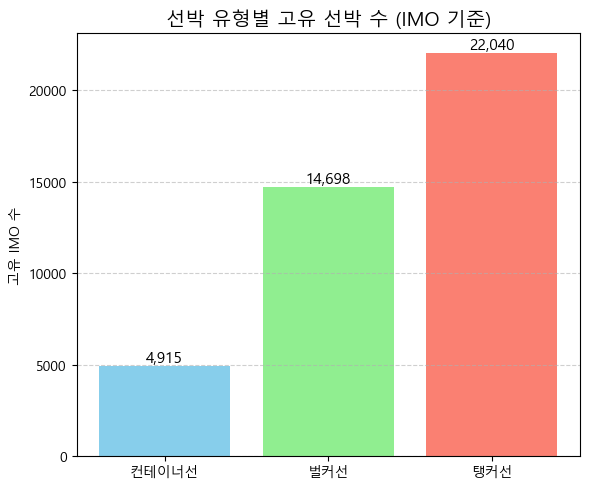

In [112]:
# 선박 유형별 고유 IMO_IDNTF_NO 개수 계산
def count_unique_imo(data, label):
    if data is not None:
        unique_count = data['IMO_IDNTF_NO'].nunique()
        print(f"[{label}] 고유 선박 수 (IMO 기준): {unique_count:,}개")
        return unique_count
    return 0

print("\n==== IMO 기준 고유 선박 수 ====")
container_unique = count_unique_imo(container_counts, "컨테이너선")
bulk_unique = count_unique_imo(bulk_counts, "벌커선")
tanker_unique = count_unique_imo(tanker_counts, "탱커선")

# 결과 시각화 (선택 사항)
plt.figure(figsize=(6, 5))
types = ['컨테이너선', '벌커선', '탱커선']
counts = [container_unique, bulk_unique, tanker_unique]
bars = plt.bar(types, counts, color=['skyblue', 'lightgreen', 'salmon'])

# 수치 표시
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 1,
             f'{height:,}', ha='center', va='bottom', fontsize=11)

plt.title("선박 유형별 고유 선박 수 (IMO 기준)", fontsize=14)
plt.ylabel("고유 IMO 수")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.savefig("선박유형별_고유_IMO_수.png", dpi=300, bbox_inches='tight')
plt.show()




===== 컨테이너선 항로 데이터 분석 =====
컨테이너선 항로 데이터 로드 완료: 7106494행
컨테이너선 고유 IMO 선박 수: 4,915개


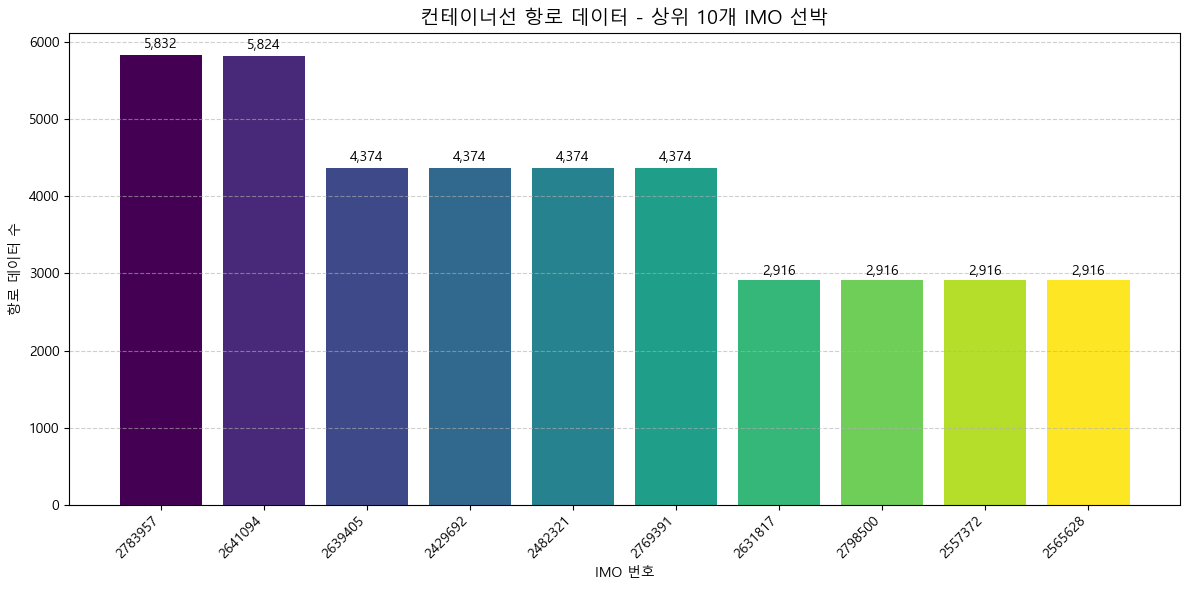

[컨테이너선] 항로 데이터 최다 보유 IMO: 2783957 (5,832건)

===== 벌커선 항로 데이터 분석 =====
벌커선 항로 데이터 로드 완료: 16185609행
벌커선 고유 IMO 선박 수: 14,654개


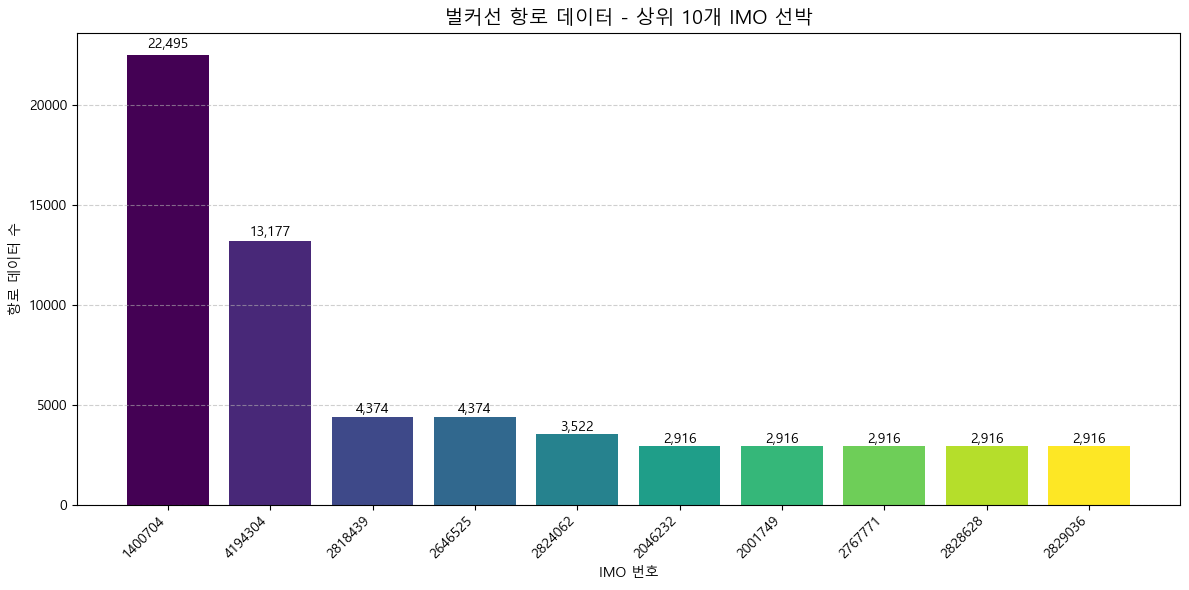

[벌커선] 항로 데이터 최다 보유 IMO: 1400704 (22,495건)

===== 탱커선 항로 데이터 분석 =====
탱커선 항로 데이터 로드 완료: 24141263행
탱커선 고유 IMO 선박 수: 20,029개


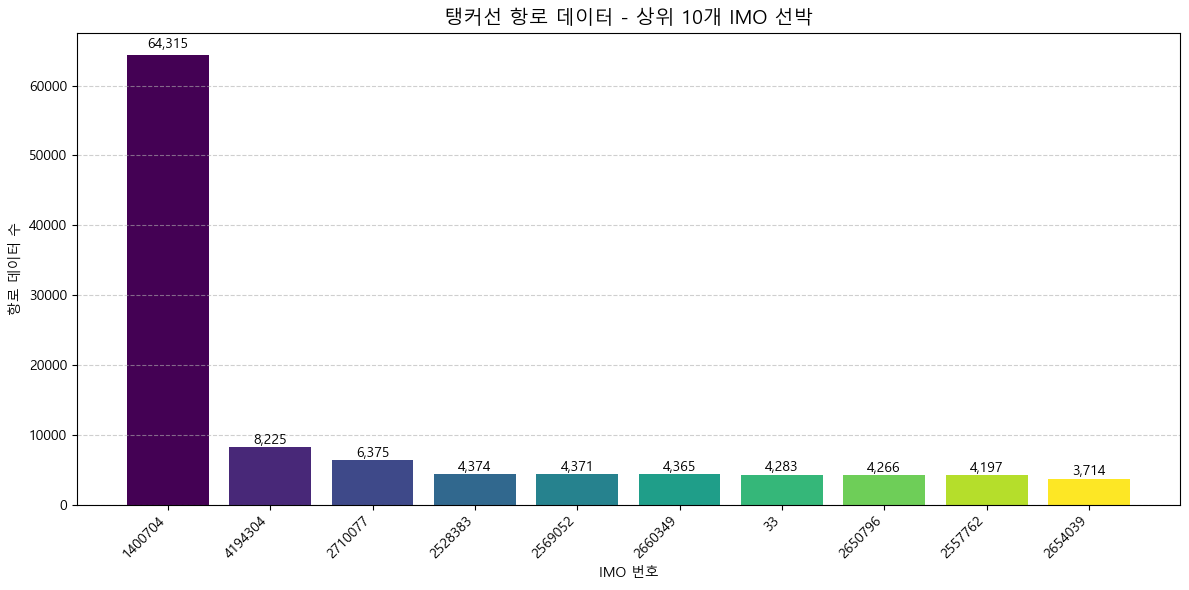

[탱커선] 항로 데이터 최다 보유 IMO: 1400704 (64,315건)


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 항로 데이터 경로
container_route_path = 'vessel_data/컨테이너선+항로별+Co2+Nox+발생량+데이터+셋.csv'
bulk_route_path = 'vessel_data/벌커선+항로별+Co2+Nox+발생량+데이터+셋.csv'
tanker_route_path = 'vessel_data/탱커선+항로별+Co2+Nox+발생량+데이터+셋.csv'

def analyze_route_data(filepath, label):
    print(f"\n===== {label} 항로 데이터 분석 =====")
    try:
        df = pd.read_csv(filepath, usecols=["IMO_IDNTF_NO"])
        print(f"{label} 항로 데이터 로드 완료: {len(df)}행")
    except Exception as e:
        print(f"[{label}] 파일 읽기 실패: {e}")
        return None

    # 유효한 IMO만 필터링
    df = df[df["IMO_IDNTF_NO"].notna()]
    df = df[df["IMO_IDNTF_NO"] != 0]

    # 고유 IMO 수
    unique_count = df["IMO_IDNTF_NO"].nunique()
    print(f"{label} 고유 IMO 선박 수: {unique_count:,}개")

    # 가장 많은 데이터 보유 IMO 추출
    imo_counts = df["IMO_IDNTF_NO"].value_counts().reset_index()
    imo_counts.columns = ["IMO_IDNTF_NO", "COUNT"]

    # 상위 10개 시각화
    top10 = imo_counts.head(10)

    plt.figure(figsize=(12, 6))
    colors = plt.cm.viridis(np.linspace(0, 1, len(top10)))
    bars = plt.bar(top10["IMO_IDNTF_NO"].astype(str), top10["COUNT"], color=colors)

    # 막대 위 수치
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height + height*0.01,
                 f'{int(height):,}', ha='center', va='bottom', fontsize=10)

    plt.title(f"{label} 항로 데이터 - 상위 10개 IMO 선박", fontsize=14)
    plt.xlabel("IMO 번호")
    plt.ylabel("항로 데이터 수")
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y', linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.savefig(f'{label}_항로_top10_IMO.png', dpi=300, bbox_inches='tight')
    plt.show()

    print(f"[{label}] 항로 데이터 최다 보유 IMO: {top10.iloc[0]['IMO_IDNTF_NO']} ({top10.iloc[0]['COUNT']:,}건)")

    return imo_counts

# 각 항로 데이터셋 분석 실행
container_route_result = analyze_route_data(container_route_path, "컨테이너선")
bulk_route_result = analyze_route_data(bulk_route_path, "벌커선")
tanker_route_result = analyze_route_data(tanker_route_path, "탱커선")



데이터 합계:
컨테이너선: 24,795개
벌커선: 25,464개
탱커선: 75,009개
전체 합계: 125,268개


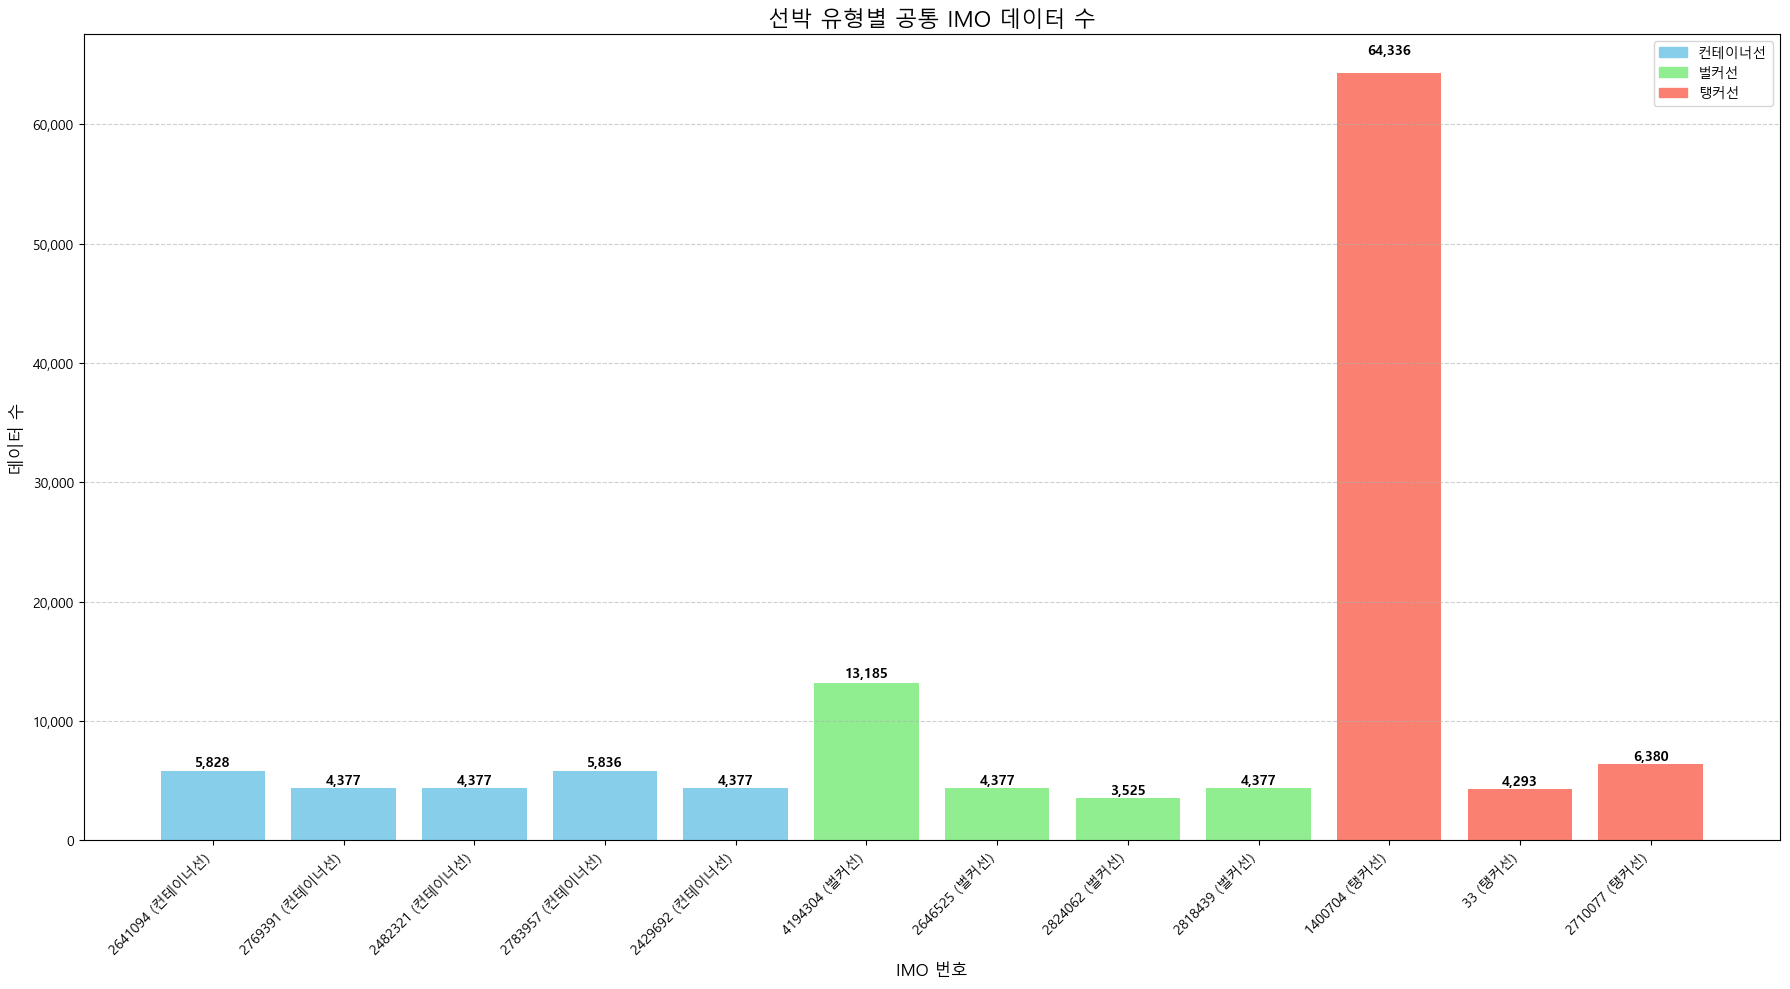


===== 선박 유형별 공통 IMO 데이터 요약 =====
 IMO_IDNTF_NO SHIP_TYPE  선박 데이터 수  항로 데이터 수  전체 데이터 수
      2641094     컨테이너선         4      5824      5828
      2769391     컨테이너선         3      4374      4377
      2482321     컨테이너선         3      4374      4377
      2783957     컨테이너선         4      5832      5836
      2429692     컨테이너선         3      4374      4377
      4194304       벌커선         8     13177     13185
      2646525       벌커선         3      4374      4377
      2824062       벌커선         3      3522      3525
      2818439       벌커선         3      4374      4377
      1400704       탱커선        21     64315     64336
           33       탱커선        10      4283      4293
      2710077       탱커선         5      6375      6380

===== 선박 유형별 데이터 합계 =====
SHIP_TYPE  선박 데이터 수  항로 데이터 수  전체 데이터 수
      벌커선        17     25447     25464
    컨테이너선        17     24778     24795
      탱커선        36     74973     75009

===== 전체 데이터 합계 =====
SHIP_TYPE  선박 데이터 수  항로 데이터 수  전체 데이터 수
    전체 합계     

In [121]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import font_manager
import matplotlib.ticker as ticker

# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'  # 한글 폰트
plt.rcParams['axes.unicode_minus'] = False     # 마이너스 기호 깨짐 방지

# 공통 IMO 데이터 계산 함수
def get_common_imo_counts(ship_df, route_df, ship_type_label, top_n=10):
    if ship_df is None or route_df is None:
        return pd.DataFrame()
    
    ship_top = set(ship_df.head(top_n)["IMO_IDNTF_NO"])
    route_top = set(route_df.head(top_n)["IMO_IDNTF_NO"])
    common_imos = ship_top.intersection(route_top)

    # ship_df와 route_df를 딕셔너리로 변환
    ship_counts = ship_df.set_index("IMO_IDNTF_NO")["COUNT"].to_dict()
    route_counts = route_df.set_index("IMO_IDNTF_NO")["COUNT"].to_dict()

    data = []
    for imo in common_imos:
        data.append({
            "IMO_IDNTF_NO": imo,
            "SHIP_TYPE": ship_type_label,
            "LABEL": f"{imo} ({ship_type_label})",
            "선박 데이터 수": ship_counts.get(imo, 0),
            "항로 데이터 수": route_counts.get(imo, 0),
            "전체 데이터 수": ship_counts.get(imo, 0) + route_counts.get(imo, 0)
        })
    return pd.DataFrame(data)

# 각 선박 유형별 공통 IMO 데이터 수 계산
df_container = get_common_imo_counts(container_counts, container_route_result, "컨테이너선", top_n=10)
df_bulk = get_common_imo_counts(bulk_counts, bulk_route_result, "벌커선", top_n=10)
df_tanker = get_common_imo_counts(tanker_counts, tanker_route_result, "탱커선", top_n=10)

# 전체 병합
df_all = pd.concat([df_container, df_bulk, df_tanker], ignore_index=True)

# 선박 유형별 색상 맵핑 정의
color_map = {
    "컨테이너선": "skyblue",
    "벌커선": "lightgreen",
    "탱커선": "salmon"
}

# ✅ 선박 데이터 시각화
plt.figure(figsize=(18, 10))

# 선박 데이터 그래프 (전체 데이터 합산으로 한 번에 표시)
x = np.arange(len(df_all))
bars = plt.bar(x, df_all["전체 데이터 수"], color=[color_map[ship_type] for ship_type in df_all["SHIP_TYPE"]])

# x축 라벨은 "IMO"
plt.xticks(x, df_all["LABEL"], rotation=45, ha='right', fontsize=10)
plt.xlabel("IMO 번호", fontsize=12)
plt.ylabel("데이터 수", fontsize=12)
plt.title("선박 유형별 공통 IMO 데이터 수", fontsize=16)

# 범례 추가
legend_handles = [plt.Rectangle((0,0),1,1, color=color) for color in color_map.values()]
plt.legend(legend_handles, color_map.keys(), loc='upper right')

# y축 눈금 및 그리드 설정
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

# 막대 위에 데이터 수 직접 표시
for i, row in df_all.iterrows():
    ship_count = row["선박 데이터 수"]
    route_count = row["항로 데이터 수"]
    total_count = row["전체 데이터 수"]
    
    # 전체 개수 표시
    plt.text(i, total_count + total_count*0.02, 
             f'{total_count:,}', 
             ha='center', va='bottom', fontsize=10, fontweight='bold')

# 합계 정보 계산
container_total = df_container["전체 데이터 수"].sum()
bulk_total = df_bulk["전체 데이터 수"].sum()
tanker_total = df_tanker["전체 데이터 수"].sum()
all_total = df_all["전체 데이터 수"].sum()

# 합계 정보 텍스트 박스
summary_text = (
    f"데이터 합계:\n"
    f"컨테이너선: {container_total:,}개\n"
    f"벌커선: {bulk_total:,}개\n"
    f"탱커선: {tanker_total:,}개\n"
    f"전체 합계: {all_total:,}개"
)

print(summary_text)

plt.tight_layout()
plt.savefig("선박유형별_공통IMO_데이터수.png", dpi=300, bbox_inches='tight')
plt.show()

# 데이터프레임으로 결과 출력
print("\n===== 선박 유형별 공통 IMO 데이터 요약 =====")
summary_df = df_all[["IMO_IDNTF_NO", "SHIP_TYPE", "선박 데이터 수", "항로 데이터 수", "전체 데이터 수"]]
print(summary_df.to_string(index=False))

# 선박 유형별 합계 계산 및 출력
ship_type_summary = df_all.groupby("SHIP_TYPE").agg({
    "선박 데이터 수": "sum",
    "항로 데이터 수": "sum",
    "전체 데이터 수": "sum"
}).reset_index()

print("\n===== 선박 유형별 데이터 합계 =====")
print(ship_type_summary.to_string(index=False))

# 전체 합계 출력
total_summary = {
    "SHIP_TYPE": "전체 합계",
    "선박 데이터 수": df_all["선박 데이터 수"].sum(),
    "항로 데이터 수": df_all["항로 데이터 수"].sum(),
    "전체 데이터 수": df_all["전체 데이터 수"].sum()
}
print("\n===== 전체 데이터 합계 =====")
print(pd.DataFrame([total_summary]).to_string(index=False))


In [3]:
pip install tools

Note: you may need to restart the kernel to use updated packages.


===== 선박별 항로 수 분석 시작 =====

----- 컨테이너선 항로 데이터 분석 중... -----
컨테이너선 항로 데이터 로드 완료: 7,106,494행
유효한 IMO 번호를 가진 행: 7,106,494개 (100.00%)
위치 변화가 있는 유효 항적: 1,464,356개 (전체 1,703,759개 중)


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_2692\674271473.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_routes['DEP_AREA'] = round(valid_routes['LA_MIN'], 1).astype(str) + "_" + round(valid_routes['LO_MIN'], 1).astype(str)
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_2692\674271473.py:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_routes['ARR_AREA'] = round(valid_routes['LA_MAX'], 1).astype(str) + "_" + round(valid_routes['LO_MAX'], 1).astype(str)


분석 완료: 컨테이너선에서 총 4,901개의 고유 IMO 번호 발견
항로 수 통계: 최소 1, 최대 361, 평균 284.97

----- 벌커선 항로 데이터 분석 중... -----
벌커선 항로 데이터 로드 완료: 16,185,609행
유효한 IMO 번호를 가진 행: 16,009,982개 (98.91%)


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_2692\674271473.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_df['YMD'] = pd.to_datetime(valid_df['YMD'], format='%d-%b-%Y %H:%M:%S')
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_2692\674271473.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_df['DATE'] = valid_df['YMD'].dt.date


위치 변화가 있는 유효 항적: 2,882,705개 (전체 3,919,508개 중)


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_2692\674271473.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_routes['DEP_AREA'] = round(valid_routes['LA_MIN'], 1).astype(str) + "_" + round(valid_routes['LO_MIN'], 1).astype(str)
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_2692\674271473.py:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_routes['ARR_AREA'] = round(valid_routes['LA_MAX'], 1).astype(str) + "_" + round(valid_routes['LO_MAX'], 1).astype(str)


분석 완료: 벌커선에서 총 14,628개의 고유 IMO 번호 발견
항로 수 통계: 최소 1, 최대 352, 평균 192.59

----- 탱커선 항로 데이터 분석 중... -----
탱커선 항로 데이터 로드 완료: 24,141,263행
유효한 IMO 번호를 가진 행: 21,118,178개 (87.48%)


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_2692\674271473.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_df['YMD'] = pd.to_datetime(valid_df['YMD'], format='%d-%b-%Y %H:%M:%S')
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_2692\674271473.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_df['DATE'] = valid_df['YMD'].dt.date


위치 변화가 있는 유효 항적: 3,923,781개 (전체 5,428,472개 중)


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_2692\674271473.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_routes['DEP_AREA'] = round(valid_routes['LA_MIN'], 1).astype(str) + "_" + round(valid_routes['LO_MIN'], 1).astype(str)
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_2692\674271473.py:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_routes['ARR_AREA'] = round(valid_routes['LA_MAX'], 1).astype(str) + "_" + round(valid_routes['LO_MAX'], 1).astype(str)


분석 완료: 탱커선에서 총 19,714개의 고유 IMO 번호 발견
항로 수 통계: 최소 1, 최대 403, 평균 179.38

===== 선박 유형별 항로 수 상위 10개 선박 =====

----- 컨테이너선 항로 수 상위 10개 선박 -----
 IMO_IDNTF_NO           선박ID  고유_항로_수  총_항적_수
      2568864 MMSI:700428433      361     362
      2752647 MMSI:969340361      361     363
      2693243 MMSI:545509333      360     360
      2472194 MMSI:684174333      360     362
      2717609 MMSI:700642633      360     361
      2735974 MMSI:700059833      360     363
      2733419 MMSI:896456833      359     361
      2192213 MMSI:689230333      359     363
      2717738 MMSI:700337033      358     360
      2143248 MMSI:969341264      358     360

----- 벌커선 항로 수 상위 10개 선박 -----
 IMO_IDNTF_NO           선박ID  고유_항로_수  총_항적_수
      2673396 MMSI:861331584      352     362
      2434881 MMSI:605240333      350     350
      2690966 MMSI:644333929      350     350
      2948363 MMSI:689165333      348     353
      2409070 MMSI:686172333      347     347
      2440191 MMSI:674838333      346     349
 

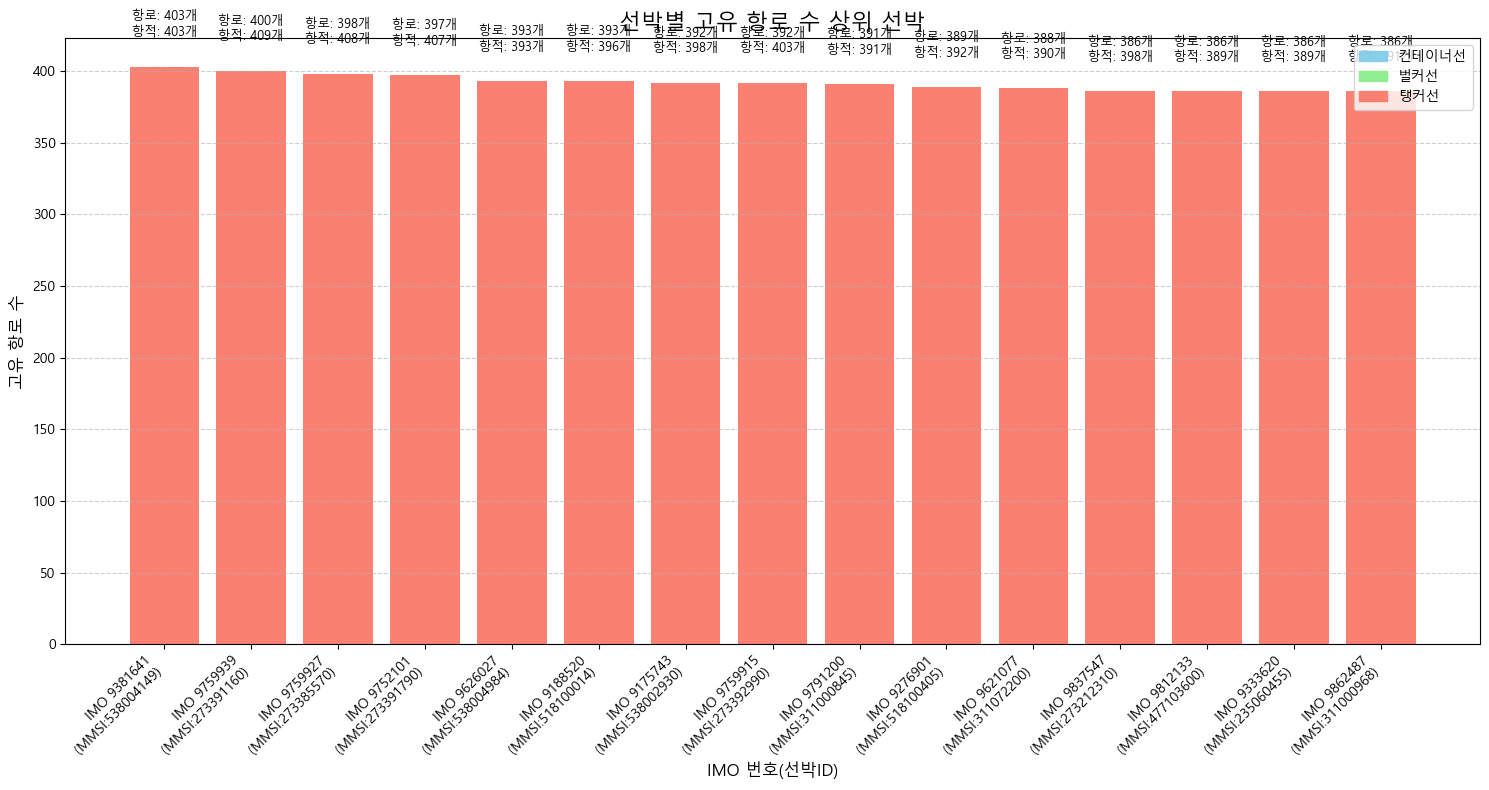


===== IMO별 항로 상세 정보 확인 예시 =====
항로 수가 가장 많은 선박 IMO 9381641 (탱커선)의 상세 정보:

항해 일수: 410일
총 이동거리: 96482610.90
평균 속도: 9.10

일별 항해 정보 (처음 5일):
                이동거리       평균속도    시작_위도    종료_위도       시작_경도       종료_경도  데이터수       시작시간                종료시간
DATE                                                                                                          
2021-01-01  509259.0  11.458125 -3.30340 -3.17658 -171.628006 -172.778000     4 2021-01-01 2021-01-01 18:00:00
2021-01-02  493360.0  11.099675 -3.57239 -3.61525 -167.205002 -168.339996     4 2021-01-02 2021-01-02 18:00:00
2021-01-03  387363.6   8.714963 -3.73310 -3.71811 -164.395004 -164.235001     4 2021-01-03 2021-01-03 18:00:00
2021-01-04  220593.2   4.962937 -4.60919 -4.52928 -163.257004 -163.669998     4 2021-01-04 2021-01-04 18:00:00
2021-01-05  410699.1   9.239950 -4.73900 -4.70864 -159.931000 -160.880997     4 2021-01-05 2021-01-05 18:00:00

===== 분석 완료 =====


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_2692\674271473.py:226: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  imo_data['YMD'] = pd.to_datetime(imo_data['YMD'], format='%d-%b-%Y %H:%M:%S')
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_2692\674271473.py:227: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  imo_data['DATE'] = imo_data['YMD'].dt.date


In [ ]:
import pandas as pd

# 항로 데이터 로드
route_path = "vessel_data/컨테이너선+항로별+Co2+Nox+발생량+데이터+셋.csv"
route_df = pd.read_csv(route_path, usecols=["IMO_IDNTF_NO", "YMD", "LA", "LO"])

# 결측값 제거 및 유효 데이터 필터링
route_df = route_df.dropna(subset=["IMO_IDNTF_NO", "YMD", "LA", "LO"])
route_df = route_df[route_df["IMO_IDNTF_NO"] != 0]

# IMO별 항로 수 계산 (YMD+위경도 조합으로 유일한 항로 구분)
route_df["route_key"] = route_df["YMD"].astype(str) + "_" + route_df["LA"].astype(str) + "_" + route_df["LO"].astype(str)
imo_route_counts = route_df.groupby("IMO_IDNTF_NO")["route_key"].nunique().reset_index()
imo_route_counts.columns = ["IMO_IDNTF_NO", "ROUTE_COUNT"]

# 상위 선박 10개 출력
top_imos = imo_route_counts.sort_values("ROUTE_COUNT", ascending=False).head(10)

# 시각화
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(12, 6))
bars = plt.bar(top_imos["IMO_IDNTF_NO"].astype(str), top_imos["ROUTE_COUNT"], color='mediumseagreen')

# 막대 위 텍스트
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 1,
             f'{int(height):,}', ha='center', va='bottom', fontsize=10)

plt.title("한 선박이 가진 항로 수 (상위 10개)", fontsize=14)
plt.xlabel("IMO 번호")
plt.ylabel("고유 항로 수")
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.savefig("한_선박_항로_개수_TOP10.png", dpi=300, bbox_inches='tight')
plt.show()


In [14]:
pip install folium


   -------------------------- ------------- 2/3 [folium]
   -------------------------- ------------- 2/3 [folium]
   -------------------------- ------------- 2/3 [folium]
   ---------------------------------------- 3/3 [folium]

Note: you may need to restart the kernel to use updated packages.



===== 컨테이너선 항로 분석 =====
데이터 파일 로드 중: vessel_data/컨테이너선+선박별+Co2+Nox+발생량+데이터+셋.csv
원본 데이터 크기: 5,255행
결측값 제거 후 크기: 5,255행 (100.00%)
IMO=0 제거 후 크기: 5,255행 (100.00%)

항로가 존재하는 컨테이너선 선박 수: 4,915척

===== 벌커선 항로 분석 =====
데이터 파일 로드 중: vessel_data/벌커선+선박별+Co2+Nox+발생량+데이터+셋.csv
원본 데이터 크기: 15,428행
결측값 제거 후 크기: 15,428행 (100.00%)
IMO=0 제거 후 크기: 15,126행 (98.04%)

항로가 존재하는 벌커선 선박 수: 14,698척

===== 탱커선 항로 분석 =====
데이터 파일 로드 중: vessel_data/탱커선+선박별+Co2+Nox+발생량+데이터+셋.csv
원본 데이터 크기: 37,196행
결측값 제거 후 크기: 37,196행 (100.00%)
IMO=0 제거 후 크기: 30,014행 (80.69%)


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_2692\2696304843.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_valid['route_key'] = (
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_2692\2696304843.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_valid['route_key'] = (



항로가 존재하는 탱커선 선박 수: 22,040척

===== 전체 선박 항로 통계 =====
항로가 존재하는 전체 선박 수: 41,653척

===== 선박 유형별 항로 통계 비교 =====
선박_유형  선박_수  비율(%)  최소_항로_수  최대_항로_수  평균_항로_수 중간값_항로_수  총_항로_수
컨테이너선  4915  11.80        1        1     1.00     1.00    4915
  벌커선 14698  35.29        1        8     1.00     1.00   14706
  탱커선 22040  52.91        1       21     1.34     1.00   29426
   전체 41653 100.00        1       21     1.18        -   49047


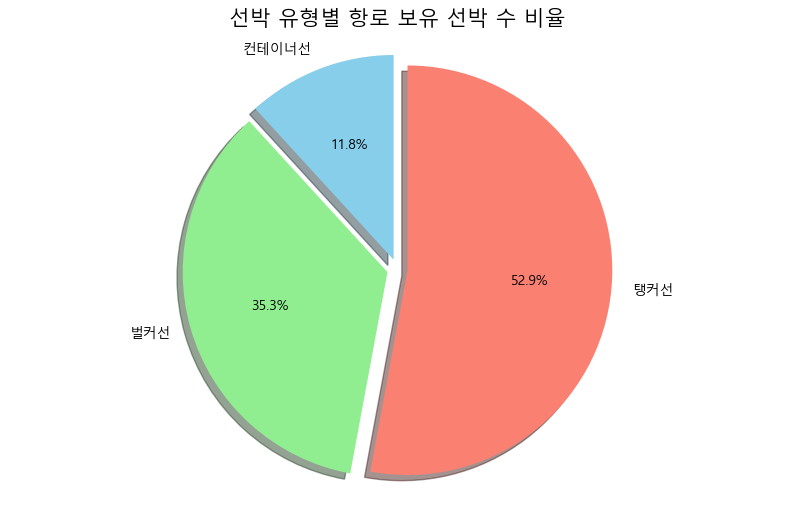

<Figure size 1200x800 with 0 Axes>

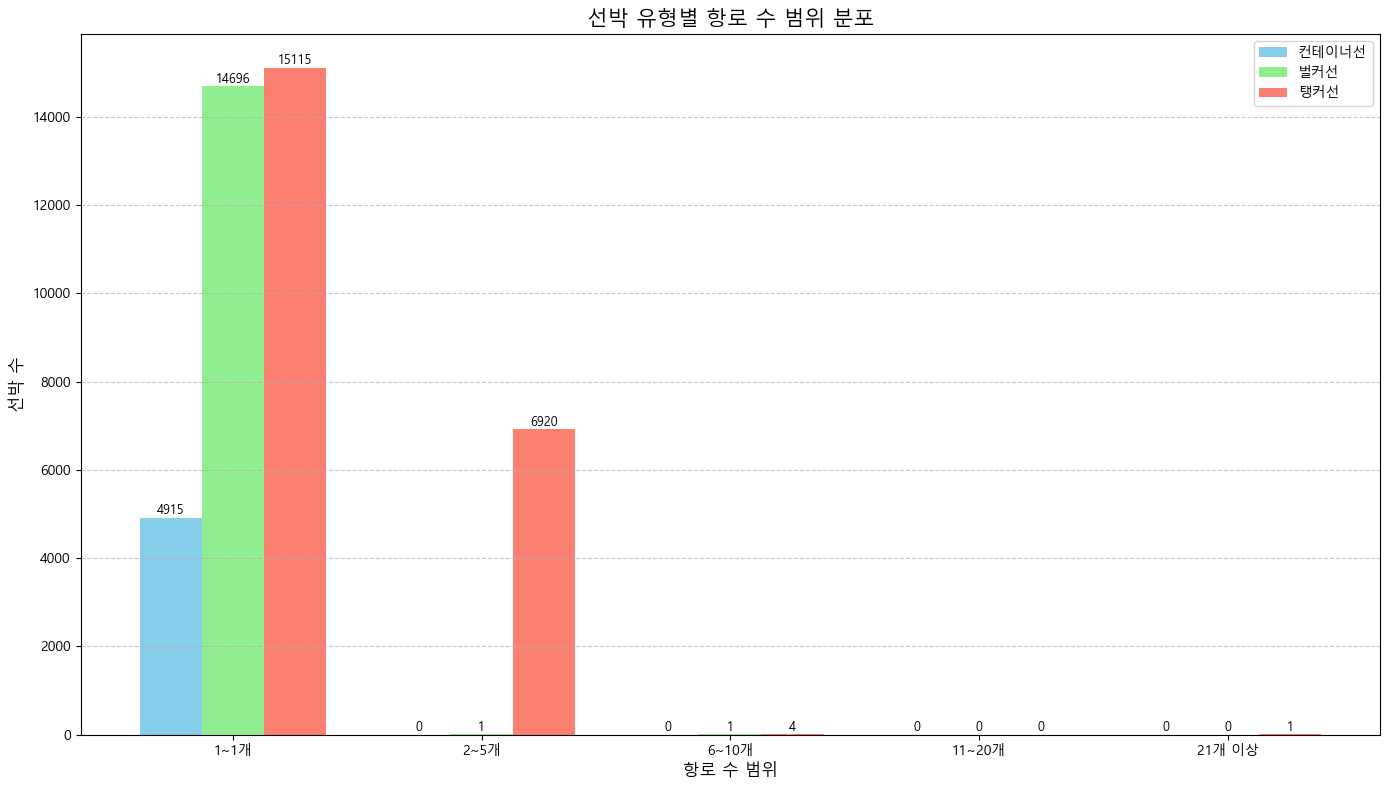

<Figure size 1500x1000 with 0 Axes>

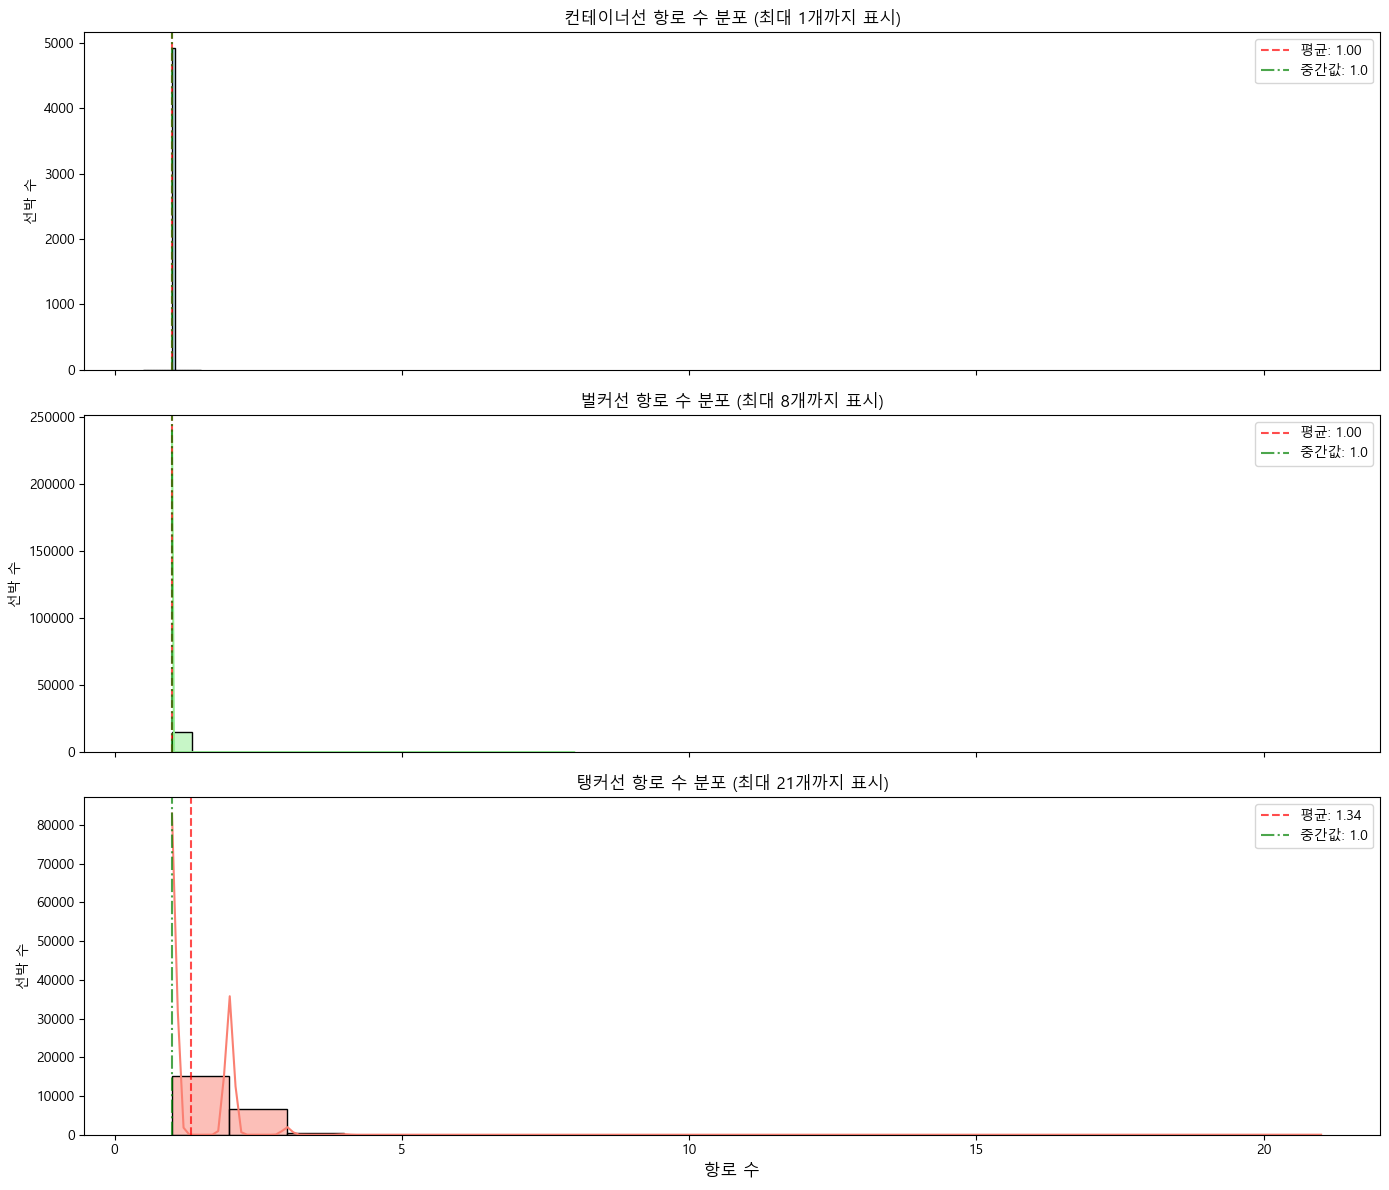


===== 분석 완료 =====


In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib import font_manager

# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'  # 한글 폰트
plt.rcParams['axes.unicode_minus'] = False     # 마이너스 기호 깨짐 방지

def count_ships_with_routes(file_path, ship_type):
    """
    선박 데이터에서 항로가 존재하는 모든 선박 개수를 세는 함수
    
    Parameters:
    file_path (str): 선박 데이터 파일 경로
    ship_type (str): 선박 유형 (분석 결과 라벨용)
    
    Returns:
    dict: 분석 결과를 담은 딕셔너리
    """
    print(f"\n===== {ship_type} 항로 분석 =====")
    
    try:
        # 1. 항로 정의에 필요한 컬럼만 로딩 (메모리 효율화)
        cols = [
            'IMO_IDNTF_NO', 'DPTR_HMS', 'ARVL_HMS',
            'DPTRP_LA', 'DPTRP_LO', 'DTNT_LA', 'DTNT_LO'
        ]
        
        # 데이터 로드 및 진행상황 출력
        print(f"데이터 파일 로드 중: {file_path}")
        df = pd.read_csv(file_path, usecols=cols, low_memory=False)
        print(f"원본 데이터 크기: {len(df):,}행")
        
        # 2. 유효한 항로만 필터링 (결측값 제거)
        df_clean = df.dropna(subset=['IMO_IDNTF_NO', 'DPTR_HMS', 'ARVL_HMS', 
                                    'DPTRP_LA', 'DPTRP_LO', 'DTNT_LA', 'DTNT_LO'])
        print(f"결측값 제거 후 크기: {len(df_clean):,}행 ({len(df_clean)/len(df)*100:.2f}%)")
        
        # IMO=0 제거
        df_valid = df_clean[df_clean['IMO_IDNTF_NO'] != 0]
        print(f"IMO=0 제거 후 크기: {len(df_valid):,}행 ({len(df_valid)/len(df)*100:.2f}%)")
        
        # 3. 항로 구분 키 생성 (출발지-도착지 기준)
        # 위경도 소수점 둘째 자리까지만 사용하여 유사한 출발/도착점 그룹화
        df_valid['route_key'] = (
            df_valid['DPTRP_LA'].round(2).astype(str) + '_' +
            df_valid['DPTRP_LO'].round(2).astype(str) + '_' +
            df_valid['DTNT_LA'].round(2).astype(str) + '_' +
            df_valid['DTNT_LO'].round(2).astype(str)
        )
        
        # 4. IMO별 고유 route_key 개수 집계
        imo_route_counts = df_valid.groupby("IMO_IDNTF_NO")["route_key"].nunique().reset_index()
        imo_route_counts.columns = ["IMO_IDNTF_NO", "ROUTE_COUNT"]
        
        # 5. 항로가 존재하는 모든 선박 개수
        total_ships = len(imo_route_counts)
        print(f"\n항로가 존재하는 {ship_type} 선박 수: {total_ships:,}척")
        
        # 6. 항로 수 분포 계산
        route_counts = imo_route_counts["ROUTE_COUNT"].value_counts().sort_index().reset_index()
        route_counts.columns = ["항로_수", "선박_수"]
        
        # 항로 수 범위별 선박 수 계산
        ranges = [(1, 1), (2, 5), (6, 10), (11, 20), (21, float('inf'))]
        range_counts = []
        
        for start, end in ranges:
            if end == float('inf'):
                label = f"{start}개 이상"
                count = imo_route_counts[imo_route_counts["ROUTE_COUNT"] >= start].shape[0]
            else:
                label = f"{start}~{end}개"
                count = imo_route_counts[(imo_route_counts["ROUTE_COUNT"] >= start) & 
                                         (imo_route_counts["ROUTE_COUNT"] <= end)].shape[0]
            range_counts.append({"항로_수_범위": label, "선박_수": count, "비율": count/total_ships*100})
        
        range_df = pd.DataFrame(range_counts)
        
        # 통계 계산
        stats = {
            "최소_항로_수": imo_route_counts["ROUTE_COUNT"].min(),
            "최대_항로_수": imo_route_counts["ROUTE_COUNT"].max(),
            "평균_항로_수": imo_route_counts["ROUTE_COUNT"].mean(),
            "중간값_항로_수": imo_route_counts["ROUTE_COUNT"].median(),
            "총_항로_수": imo_route_counts["ROUTE_COUNT"].sum()
        }
        
        # 7. 결과 반환
        return {
            "ship_type": ship_type,
            "total_ships": total_ships,
            "imo_route_counts": imo_route_counts,
            "route_distribution": route_counts,
            "range_distribution": range_df,
            "stats": stats
        }
    
    except Exception as e:
        print(f"[오류] {ship_type} 데이터 분석 중 오류 발생: {e}")
        return {
            "ship_type": ship_type,
            "error": str(e),
            "total_ships": 0
        }

# 모든 선박 유형에 대해 분석 수행
file_paths = {
    "컨테이너선": 'vessel_data/컨테이너선+선박별+Co2+Nox+발생량+데이터+셋.csv',
    "벌커선": 'vessel_data/벌커선+선박별+Co2+Nox+발생량+데이터+셋.csv',
    "탱커선": 'vessel_data/탱커선+선박별+Co2+Nox+발생량+데이터+셋.csv'
}

# 분석 결과 저장
results = {}
for ship_type, file_path in file_paths.items():
    results[ship_type] = count_ships_with_routes(file_path, ship_type)

# 전체 통계 출력
print("\n===== 전체 선박 항로 통계 =====")
total_all_ships = sum(r["total_ships"] for r in results.values())
print(f"항로가 존재하는 전체 선박 수: {total_all_ships:,}척")

# 선박 유형별 비교 테이블 생성
comparison_data = []
for ship_type, result in results.items():
    if "stats" in result:
        row = {
            "선박_유형": ship_type,
            "선박_수": result["total_ships"],
            "비율(%)": result["total_ships"] / total_all_ships * 100,
            "최소_항로_수": result["stats"]["최소_항로_수"],
            "최대_항로_수": result["stats"]["최대_항로_수"],
            "평균_항로_수": result["stats"]["평균_항로_수"],
            "중간값_항로_수": result["stats"]["중간값_항로_수"],
            "총_항로_수": result["stats"]["총_항로_수"]
        }
        comparison_data.append(row)

# 전체 합계 추가
if comparison_data:
    total_row = {
        "선박_유형": "전체",
        "선박_수": total_all_ships,
        "비율(%)": 100.0,
        "최소_항로_수": min(r["최소_항로_수"] for r in comparison_data),
        "최대_항로_수": max(r["최대_항로_수"] for r in comparison_data),
        "평균_항로_수": sum(r["총_항로_수"] for r in comparison_data) / total_all_ships if total_all_ships > 0 else 0,
        "중간값_항로_수": "-",  # 전체 데이터 중간값은 여기서 계산하지 않음
        "총_항로_수": sum(r["총_항로_수"] for r in comparison_data)
    }
    comparison_data.append(total_row)

comparison_df = pd.DataFrame(comparison_data)
print("\n===== 선박 유형별 항로 통계 비교 =====")
pd.set_option('display.float_format', '{:.2f}'.format)
print(comparison_df.to_string(index=False))

# 시각화 1: 선박 유형별 선박 수 비교
plt.figure(figsize=(10, 6))
ship_counts = [r["total_ships"] for r in results.values() if "total_ships" in r]
labels = [r["ship_type"] for r in results.values() if "total_ships" in r]

colors = ['skyblue', 'lightgreen', 'salmon']
explode = [0.05] * len(ship_counts)  # 약간 떨어뜨려 강조

# 파이 차트
plt.pie(ship_counts, labels=labels, autopct='%1.1f%%', startangle=90, 
        colors=colors, explode=explode, shadow=True)
plt.axis('equal')  # 원형 비율 유지
plt.title('선박 유형별 항로 보유 선박 수 비율', fontsize=15)
plt.savefig('선박유형별_항로보유선박_비율.png', dpi=300, bbox_inches='tight')
plt.show()

# 시각화 2: 선박 유형별 항로 수 범위 분포
if all("range_distribution" in results[ship_type] for ship_type in file_paths):
    plt.figure(figsize=(12, 8))
    
    # 모든 선박 유형의 범위 분포 데이터 결합
    all_ranges = []
    for ship_type, result in results.items():
        df = result["range_distribution"].copy()
        df["선박_유형"] = ship_type
        all_ranges.append(df)
    
    range_df = pd.concat(all_ranges, ignore_index=True)
    
    # 그룹화된 막대 그래프
    bar_width = 0.25
    index = np.arange(len(range_df["항로_수_범위"].unique()))
    
    fig, ax = plt.subplots(figsize=(14, 8))
    
    # 각 선박 유형별 막대 그래프
    for i, ship_type in enumerate(file_paths.keys()):
        ship_data = range_df[range_df["선박_유형"] == ship_type]
        bars = ax.bar(index + i*bar_width, ship_data["선박_수"], bar_width,
                    label=ship_type, color=colors[i])
        
        # 막대 위에 숫자 표시
        for bar in bars:
            height = bar.get_height()
            ax.text(bar.get_x() + bar.get_width()/2., height + 5,
                    f'{int(height)}', ha='center', va='bottom', fontsize=9)
    
    ax.set_xlabel('항로 수 범위', fontsize=12)
    ax.set_ylabel('선박 수', fontsize=12)
    ax.set_title('선박 유형별 항로 수 범위 분포', fontsize=15)
    ax.set_xticks(index + bar_width)
    ax.set_xticklabels(range_df["항로_수_범위"].unique())
    ax.legend()
    ax.grid(axis='y', linestyle='--', alpha=0.7)
    
    plt.tight_layout()
    plt.savefig('선박유형별_항로수_범위_분포.png', dpi=300, bbox_inches='tight')
    plt.show()

# 시각화 3: 선박 유형별 항로 수 히스토그램
if all("imo_route_counts" in results[ship_type] for ship_type in file_paths):
    plt.figure(figsize=(15, 10))
    
    # 서브플롯 생성
    fig, axes = plt.subplots(3, 1, figsize=(14, 12), sharex=True)
    
    for i, (ship_type, result) in enumerate(results.items()):
        if "imo_route_counts" in result:
            route_counts = result["imo_route_counts"]["ROUTE_COUNT"]
            
            # 최대값 제한 (이상치 영향 줄이기)
            max_display = min(50, route_counts.max())
            
            # 히스토그램
            sns.histplot(route_counts[route_counts <= max_display], 
                          bins=20, kde=True, ax=axes[i], color=colors[i])
            
            axes[i].set_title(f'{ship_type} 항로 수 분포 (최대 {max_display}개까지 표시)', fontsize=12)
            axes[i].set_ylabel('선박 수', fontsize=10)
            
            # 평균 및 중간값 표시
            mean_val = route_counts.mean()
            median_val = route_counts.median()
            
            axes[i].axvline(mean_val, color='red', linestyle='--', alpha=0.7, 
                            label=f'평균: {mean_val:.2f}')
            axes[i].axvline(median_val, color='green', linestyle='-.', alpha=0.7, 
                           label=f'중간값: {median_val:.1f}')
            axes[i].legend()
    
    axes[2].set_xlabel('항로 수', fontsize=12)
    plt.tight_layout()
    plt.savefig('선박유형별_항로수_히스토그램.png', dpi=300, bbox_inches='tight')
    plt.show()

print("\n===== 분석 완료 =====")

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import font_manager
import os
from datetime import datetime

# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'  # 한글 폰트
plt.rcParams['axes.unicode_minus'] = False     # 마이너스 기호 깨짐 방지

def extract_ships_with_single_route(file_path, ship_type):
    """
    선박 데이터에서 항로가 정확히 1개인 선박만 추출하는 함수
    
    Parameters:
    file_path (str): 선박 데이터 파일 경로
    ship_type (str): 선박 유형 (분석 결과 라벨용)
    
    Returns:
    tuple: (단일항로 선박 IMO 목록, 원본 데이터프레임)
    """
    print(f"\n===== {ship_type} 단일 항로 선박 추출 =====")
    
    try:
        # 1. 항로 식별에 필요한 컬럼 확인
        print(f"데이터 파일 로드 중: {file_path}")
        
        # 전체 데이터 로드 (메모리 문제 있을 경우 청크 단위로 처리 가능)
        df = pd.read_csv(file_path, low_memory=False)
        print(f"원본 데이터 크기: {len(df):,}행, {len(df.columns)}열")
        
        # 2. IMO 번호 및 항로 관련 컬럼 추출
        route_cols = [
            'IMO_IDNTF_NO', 'DPTR_HMS', 'ARVL_HMS',
            'DPTRP_LA', 'DPTRP_LO', 'DTNT_LA', 'DTNT_LO'
        ]
        
        # 원본 데이터에 이 컬럼들이 있는지 확인
        missing_cols = [col for col in route_cols if col not in df.columns]
        if missing_cols:
            print(f"경고: 다음 필수 컬럼이 없습니다: {missing_cols}")
            route_cols = [col for col in route_cols if col in df.columns]
        
        # 3. 유효한 항로 데이터만 추출
        # IMO 번호가 유효하고, 출발/도착 정보가 있는 데이터만 필터링
        cols_to_check = [col for col in [
            'IMO_IDNTF_NO', 'DPTRP_LA', 'DPTRP_LO', 'DTNT_LA', 'DTNT_LO'
        ] if col in df.columns]
        
        if len(cols_to_check) >= 5:  # 최소한 IMO와 출발/도착 위경도가 있어야 함
            valid_df = df.dropna(subset=cols_to_check)
            valid_df = valid_df[valid_df['IMO_IDNTF_NO'] != 0]
            
            print(f"유효한 데이터: {len(valid_df):,}행 ({len(valid_df)/len(df)*100:.2f}%)")
            
            # 4. 항로 구분 키 생성 (출발지-도착지 기준)
            valid_df['route_key'] = (
                valid_df['DPTRP_LA'].round(2).astype(str) + '_' +
                valid_df['DPTRP_LO'].round(2).astype(str) + '_' +
                valid_df['DTNT_LA'].round(2).astype(str) + '_' +
                valid_df['DTNT_LO'].round(2).astype(str)
            )
            
            # 5. IMO별 고유 route_key 개수 집계
            imo_route_counts = valid_df.groupby("IMO_IDNTF_NO")["route_key"].nunique().reset_index()
            imo_route_counts.columns = ["IMO_IDNTF_NO", "ROUTE_COUNT"]
            
            # 6. 항로가 정확히 1개인 선박만 필터링
            single_route_ships = imo_route_counts[imo_route_counts["ROUTE_COUNT"] == 1]
            
            print(f"항로가 정확히 1개인 선박: {len(single_route_ships):,}척 "
                  f"(전체 유효 IMO {len(imo_route_counts):,}척의 {len(single_route_ships)/len(imo_route_counts)*100:.2f}%)")
            
            # 7. 단일 항로 선박 IMO 목록 추출
            single_route_imos = set(single_route_ships["IMO_IDNTF_NO"].tolist())
            
            # 8. 선박 유형 정보 추가 (원본 데이터프레임에 추가)
            df["SHIP_TYPE"] = ship_type
            
            return single_route_imos, df
        else:
            print(f"오류: 필수 컬럼이 부족합니다. 현재 컬럼: {cols_to_check}")
            return set(), pd.DataFrame()
            
    except Exception as e:
        print(f"[오류] {ship_type} 데이터 처리 중 오류 발생: {e}")
        return set(), pd.DataFrame()

def create_single_route_ships_dataframe():
    """항로가 1개인 선박만 모아서 통합 데이터프레임 생성"""
    
    print("===== 항로가 1개인 선박 데이터 통합 =====")
    start_time = datetime.now()
    
    # 파일 경로 정의
    file_paths = {
        "컨테이너선": 'vessel_data/컨테이너선+선박별+Co2+Nox+발생량+데이터+셋.csv',
        "벌커선": 'vessel_data/벌커선+선박별+Co2+Nox+발생량+데이터+셋.csv',
        "탱커선": 'vessel_data/탱커선+선박별+Co2+Nox+발생량+데이터+셋.csv'
    }
    
    # 항로가 1개인 선박 IMO와 원본 데이터프레임 추출
    single_route_data = {}
    for ship_type, file_path in file_paths.items():
        single_route_imos, original_df = extract_ships_with_single_route(file_path, ship_type)
        if not original_df.empty:
            single_route_data[ship_type] = (single_route_imos, original_df)
    
    # 모든 선박 유형의 항로가 1개인 선박 데이터 추출 및 통합
    combined_df_list = []
    
    for ship_type, (single_route_imos, original_df) in single_route_data.items():
        if single_route_imos:
            # 항로가 1개인 선박의 데이터만 필터링
            filtered_df = original_df[original_df["IMO_IDNTF_NO"].isin(single_route_imos)]
            print(f"{ship_type} 단일 항로 선박 데이터: {len(filtered_df):,}행, {len(single_route_imos):,}척")
            
            # IMO별 데이터 수 확인 (참고용)
            records_per_ship = filtered_df.groupby("IMO_IDNTF_NO").size()
            
            # 통합 데이터프레임에 추가
            combined_df_list.append(filtered_df)
    
    # 모든 데이터프레임 합치기
    if combined_df_list:
        # 컬럼명 일치 확인 (불일치 시 경고)
        column_sets = [set(df.columns) for df in combined_df_list]
        all_columns = set.union(*column_sets)
        
        # 각 데이터프레임에 없는 컬럼은 NaN으로 채움
        for i, df in enumerate(combined_df_list):
            missing_cols = all_columns - set(df.columns)
            if missing_cols:
                print(f"데이터셋 {i+1}에 없는 컬럼 {len(missing_cols)}개 추가: {missing_cols}")
                for col in missing_cols:
                    df[col] = np.nan
        
        # 통합 데이터프레임 생성
        combined_df = pd.concat(combined_df_list, ignore_index=True)
        
        # 통계 정보 출력
        print("\n===== 통합 데이터프레임 정보 =====")
        print(f"총 행 수: {len(combined_df):,}")
        print(f"총 열 수: {len(combined_df.columns):,}")
        
        # IMO 수 및 선박 유형별 분포
        unique_imos = combined_df["IMO_IDNTF_NO"].nunique()
        ship_type_counts = combined_df["SHIP_TYPE"].value_counts()
        
        print(f"총 선박(IMO) 수: {unique_imos:,}")
        print("\n선박 유형별 분포:")
        for ship_type, count in ship_type_counts.items():
            print(f"- {ship_type}: {count:,}행")
        
        # 선박 유형별 IMO 수 계산
        ship_imo_counts = combined_df.groupby("SHIP_TYPE")["IMO_IDNTF_NO"].nunique()
        print("\n선박 유형별 IMO 수:")
        for ship_type, count in ship_imo_counts.items():
            print(f"- {ship_type}: {count:,}척")
        
        # 처리 시간 계산
        end_time = datetime.now()
        processing_time = (end_time - start_time).total_seconds()
        print(f"\n처리 시간: {processing_time:.2f}초")
        
        # 결과 저장 (옵션)
        output_file = "단일항로_선박_통합데이터.csv"
        combined_df.to_csv(output_file, index=False)
        print(f"\n통합 데이터 저장 완료: {output_file} ({os.path.getsize(output_file)/1024/1024:.1f} MB)")
        
        # 저장된 데이터 확인
        verification_df = pd.read_csv(output_file)
        print(f"저장된 데이터 확인: {len(verification_df):,}행, {verification_df['IMO_IDNTF_NO'].nunique():,}척")
        
        return combined_df
    else:
        print("오류: 통합할 데이터가 없습니다.")
        return pd.DataFrame()

# 데이터 샘플 추출 및 검토 함수
def examine_combined_df(df, sample_size=5):
    """통합 데이터프레임 검토"""
    if df.empty:
        print("데이터프레임이 비어 있습니다.")
        return
    
    print("\n===== 통합 데이터프레임 검토 =====")
    
    # 1. 기본 정보
    print(f"데이터프레임 크기: {df.shape}")
    
    # 2. 컬럼 목록
    print(f"\n컬럼 목록 ({len(df.columns)}개):")
    print(", ".join(df.columns))
    
    # 3. 데이터 타입
    print("\n데이터 타입:")
    print(df.dtypes)
    
    # 4. 결측치 확인
    null_counts = df.isnull().sum()
    print("\n주요 컬럼 결측치:")
    for col, count in null_counts[null_counts > 0].items():
        print(f"- {col}: {count:,}개 ({count/len(df)*100:.2f}%)")
    
    # 5. 샘플 데이터
    print(f"\n데이터 샘플 ({sample_size}개):")
    print(df.sample(sample_size).to_string())
    
    # 6. 선박 유형별 샘플
    print("\n선박 유형별 샘플:")
    for ship_type in df["SHIP_TYPE"].unique():
        subset = df[df["SHIP_TYPE"] == ship_type]
        print(f"\n{ship_type} 샘플 (총 {len(subset):,}행, {subset['IMO_IDNTF_NO'].nunique():,}척):")
        print(subset.sample(min(sample_size, len(subset))).to_string())
    
    return

# 특정 IMO 선박 정보 조회 함수
def get_ship_info(df, imo_number):
    """특정 IMO 선박의 상세 정보 조회"""
    if df.empty:
        return "데이터프레임이 비어 있습니다."
    
    ship_data = df[df["IMO_IDNTF_NO"] == imo_number]
    
    if ship_data.empty:
        return f"IMO {imo_number}에 대한 데이터가 없습니다."
    
    # 기본 정보
    ship_type = ship_data["SHIP_TYPE"].iloc[0]
    row_count = len(ship_data)
    
    # 항로 정보 (시작/종료)
    try:
        departure = (ship_data["DPTRP_LA"].iloc[0], ship_data["DPTRP_LO"].iloc[0])
        destination = (ship_data["DTNT_LA"].iloc[0], ship_data["DTNT_LO"].iloc[0])
        
        # 출발/도착 시간 정보
        if "DPTR_HMS" in ship_data.columns and "ARVL_HMS" in ship_data.columns:
            depart_time = ship_data["DPTR_HMS"].iloc[0]
            arrival_time = ship_data["ARVL_HMS"].iloc[0]
            time_info = f"출발 시간: {depart_time}, 도착 시간: {arrival_time}"
        else:
            time_info = "시간 정보 없음"
        
        # 배출량 정보
        emission_cols = [col for col in ["CDBX", "NOX", "SOX"] if col in ship_data.columns]
        emission_info = "\n".join([f"{col}: {ship_data[col].iloc[0]}" for col in emission_cols])
        
        result = (
            f"===== IMO {imo_number} 선박 정보 =====\n"
            f"선박 유형: {ship_type}\n"
            f"데이터 행 수: {row_count}\n\n"
            f"단일 항로 정보:\n"
            f"- 출발 위치: {departure}\n"
            f"- 도착 위치: {destination}\n"
            f"- {time_info}\n\n"
            f"배출량 정보:\n{emission_info}"
        )
        
        return result
    except Exception as e:
        return f"정보 추출 중 오류 발생: {e}"

# 실행 코드: 항로가 1개인 선박만 모은 통합 데이터프레임 생성
single_route_df = create_single_route_ships_dataframe()

# 통합 데이터프레임 검토
if not single_route_df.empty:
    examine_combined_df(single_route_df)
    
    # 임의의 IMO 선박 정보 조회 예시 (데이터가 있다면)
    if len(single_route_df) > 0:
        sample_imo = single_route_df["IMO_IDNTF_NO"].sample(1).iloc[0]
        ship_info = get_ship_info(single_route_df, sample_imo)
        print("\n임의 선박 정보 조회 예시:")
        print(ship_info)

print("\n===== 처리 완료 =====")

===== 항로가 1개인 선박 데이터 통합 =====

===== 컨테이너선 단일 항로 선박 추출 =====
데이터 파일 로드 중: vessel_data/컨테이너선+선박별+Co2+Nox+발생량+데이터+셋.csv
원본 데이터 크기: 5,255행, 36열
유효한 데이터: 5,255행 (100.00%)
항로가 정확히 1개인 선박: 4,915척 (전체 유효 IMO 4,915척의 100.00%)

===== 벌커선 단일 항로 선박 추출 =====
데이터 파일 로드 중: vessel_data/벌커선+선박별+Co2+Nox+발생량+데이터+셋.csv
원본 데이터 크기: 15,428행, 36열
유효한 데이터: 15,126행 (98.04%)
항로가 정확히 1개인 선박: 14,696척 (전체 유효 IMO 14,698척의 99.99%)

===== 탱커선 단일 항로 선박 추출 =====
데이터 파일 로드 중: vessel_data/탱커선+선박별+Co2+Nox+발생량+데이터+셋.csv
원본 데이터 크기: 37,196행, 36열
유효한 데이터: 30,014행 (80.69%)
항로가 정확히 1개인 선박: 15,115척 (전체 유효 IMO 22,040척의 68.58%)
컨테이너선 단일 항로 선박 데이터: 5,255행, 4,915척
벌커선 단일 항로 선박 데이터: 15,116행, 14,696척
탱커선 단일 항로 선박 데이터: 15,702행, 15,115척

===== 통합 데이터프레임 정보 =====
총 행 수: 36,073
총 열 수: 37
총 선박(IMO) 수: 34,312

선박 유형별 분포:
- 탱커선: 15,702행
- 벌커선: 15,116행
- 컨테이너선: 5,255행

선박 유형별 IMO 수:
- 벌커선: 14,696척
- 컨테이너선: 4,915척
- 탱커선: 15,115척

처리 시간: 0.32초

통합 데이터 저장 완료: 단일항로_선박_통합데이터.csv (11.5 MB)
저장된 데이터 확인: 36,073행, 34,312척

===== 통합 데이터프레임 검토 =====
데이터프

In [45]:
import pandas as pd

csv_file = '단일항로_선박_통합데이터_한글컬럼.csv'
merge_df = pd.read_csv(csv_file, encoding='cp949')
print(merge_df.info())
print('--------------------------------')
print(merge_df.columns)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36073 entries, 0 to 36072
Data columns (total 37 columns):
 #   Column                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                

In [42]:
weather_file = '230101-0600~231231-1800+기상데이터.csv'
# 파일에서 첫 줄(헤더)만 직접 읽기
with open(weather_file, 'r', encoding='cp949') as f:
    header_line = f.readline()

# 열 이름 리스트로 변환
column_names = header_line.strip().split(',')

column_names


['지점',
 '일시',
 '풍속(m/s)',
 '풍향(deg)',
 'GUST풍속(m/s)',
 '현지기압(hPa)',
 '습도(%)',
 '기온(°C)',
 '수온(°C)',
 '최대파고(m)',
 '유의파고(m)',
 '평균파고(m)',
 '파주기(sec)',
 '파향(deg)']

In [1]:
import pandas as pd
import os
from datetime import datetime

def merge_route_data_fast(base_dir="vessel_data", save=True, verbose=True):
    start = datetime.now()
    ship_types = ["컨테이너선", "벌커선", "탱커선"]
    
    # 컬럼 매핑 (영문 → 한글)
    col_map = {
        'YMD': '일자', 'MMSI': '해상이동업무식별번호', 'IMO_IDNTF_NO': '국제해상기구식별번호',
        'LA': '위도', 'LO': '경도', 'VE': '속도', 'SH_DRCN': '선수방향', 'DRAFT': '흘수',
        'NVGTN_DIST': '운항거리', 'WAVE_HGHT': '파도높이', 'WAVE_CYCL': '파도주기',
        'WNDRC_U': '풍향U', 'WNDRC_V': '풍향V', 'ADDTI_RSTC': '부가저항', 'TOT_RSTC': '총저항',
        'RL_POWER': '실제력', 'FUEL_CNSMP_QTY': '연료소모량', 'CDBX': '이산화탄소',
        'NOX': '질소산화물', 'SOX': '황산화물', 'MTHN': '메테인',
        'SHIP_NRG_EFFCN_NVGTN_IDX': '선박에너지효율운항지수', 'VSL_NAME': '선박명',
        'ROUTE_ID': '항로ID', 'DEP_PORT_CD': '출발항구코드', 'ARR_PORT_CD': '도착항구코드',
        'DEP_PORT_NM': '출발항구명', 'ARR_PORT_NM': '도착항구명', 'SHIP_NM': '선박명',
        'SHIP_KIND': '선박종류', 'SHIP_WDTH': '선박너비', 'SHIP_LNTH': '선박길이',
        'SHIP_HGHT': '선박높이', 'SHIP_OWNER_NM': '선박소유자명', 'SHPYRD_NM': '조선소명',
        'BULD_YR': '건조년도', 'DDWGHT': '재화중량', 'DPTR_HMS': '출발시간',
        'ARVL_HMS': '도착시간', 'DPTRP_LA': '출발지위도', 'DPTRP_LO': '출발지경도',
        'DTNT_LA': '도착지위도', 'DTNT_LO': '도착지경도'
    }

    dfs = []
    for ship in ship_types:
        file_path = os.path.join(base_dir, f"{ship}+항로별+Co2+Nox+발생량+데이터+셋.csv")
        if not os.path.exists(file_path):
            if verbose:
                print(f"✗ 파일 없음: {file_path}")
            continue
        
        df = pd.read_csv(file_path, encoding='utf-8-sig', low_memory=False)
        df['선박유형'] = ship
        df.rename(columns={col: col_map.get(col, col) for col in df.columns}, inplace=True)
        dfs.append(df)
        if verbose:
            print(f"✓ {ship}: {len(df):,}행 로드됨")

    if not dfs:
        raise FileNotFoundError("병합할 파일이 없습니다.")

    combined = pd.concat(dfs, ignore_index=True)
    if verbose:
        print(f"\n총 병합 행 수: {len(combined):,}행")
    
    if save:
        out_path = "통합_항로별_데이터_한글컬럼_fast.csv"
        combined.to_csv(out_path, index=False, encoding='utf-8-sig')
        if verbose:
            print(f"✓ 저장 완료: {out_path} ({os.path.getsize(out_path)/1024/1024:.2f}MB)")

    print(f"⏱ 처리 시간: {(datetime.now()-start).total_seconds():.2f}초")
    return combined

# 실행
merged_df_fast = merge_route_data_fast()


✓ 컨테이너선: 7,106,494행 로드됨
✓ 벌커선: 16,185,609행 로드됨
✓ 탱커선: 24,141,263행 로드됨

총 병합 행 수: 47,433,366행
✓ 저장 완료: 통합_항로별_데이터_한글컬럼_fast.csv (9384.55MB)
⏱ 처리 시간: 557.24초


In [4]:
import pandas as pd
csv_file = '통합_항로별_데이터_한글컬럼.csv'
merge_df2 = pd.read_csv(csv_file, encoding='utf-8')
# print(merge_df2.info())
print(merge_df2.head(5))

                     일자  해상이동업무식별번호  국제해상기구식별번호         위도          경도  \
0  02-Apr-2023 06:00:00   969354698     2231370  29.889500  122.060997   
1  02-Apr-2023 12:00:00   969354698     2231370  29.889400  122.060997   
2  02-Apr-2023 18:00:00   969354698     2231370  29.889299  122.060997   
3  03-Apr-2023 00:00:00   969354698     2231370  29.889400  122.060997   
4  03-Apr-2023 06:00:00   969354698     2231370  29.889400  122.060997   

         속도  선수방향    흘수      운항거리  파도높이  ...       총저항  실제력         연료소모량  \
0  0.002016    77  12.7  0.012098  0.25  ...  663038.0  0.0  1.672840e+10   
1  0.001367    77  12.7  0.008202  0.34  ...  663038.0  0.0  1.672840e+10   
2  0.000820    77  12.7  0.004921  0.37  ...  663038.0  0.0  1.672840e+10   
3  0.002443    77  12.7  0.014661  0.36  ...  663038.0  0.0  1.672840e+10   
4  0.000786    77  12.7  0.004716  0.50  ...  663038.0  0.0  1.672840e+10   

          이산화탄소       질소산화물      황산화물        메테인  선박에너지효율운항지수   선박유형  CRG_TYP  
0  4.600310e

In [8]:
import pandas as pd
csv_file = '230101-0600~231231-1800+기상데이터.csv'
df = pd.read_csv(csv_file, encoding='cp949')
# print(merge_df2.info())
print(df.head(5))

      지점                일시  풍속(m/s)  풍향(deg)  GUST풍속(m/s)  현지기압(hPa)  습도(%)  \
0  21229  2023-01-01 06:00      5.0    302.0          8.4     1024.0   53.0   
1  21229  2023-01-01 07:00      3.7    281.0          7.5     1023.9   48.0   
2  21229  2023-01-01 08:00      6.0    290.0         10.3     1024.0   48.0   
3  21229  2023-01-01 09:00      8.0    298.0         12.9     1024.2   51.0   
4  21229  2023-01-01 10:00      7.9    294.0         11.4     1024.5   53.0   

   기온(°C)  수온(°C)  최대파고(m)  유의파고(m)  평균파고(m)  파주기(sec)  파향(deg)  
0     7.6    15.1      3.0      1.9      1.4       8.0    355.0  
1     6.0    15.0      3.3      2.3      1.7       8.0    351.0  
2     6.4    14.7      3.5      2.5      1.8       7.1    353.0  
3     7.9    14.6      3.9      2.5      1.7       8.0     11.0  
4     8.0    14.8      3.7      2.3      1.6       8.0      8.0  


In [9]:
# 날짜변환
import pandas as pd
import os
from datetime import datetime

def convert_date_format(csv_file, date_column='일시', encoding='utf-8'):
    """
    CSV 파일의 날짜 형식을 '2023-01-01 06:00'에서 '01-Jan-2023 06:00:00'으로 변환
    
    Parameters:
    csv_file (str): CSV 파일 경로
    date_column (str): 날짜 컬럼명
    encoding (str): 파일 인코딩 방식
    
    Returns:
    DataFrame: 날짜 형식이 변환된 데이터프레임
    """
    print(f"===== 날짜 형식 변환 시작 =====")
    print(f"파일: {csv_file}")
    print(f"변환할 컬럼: {date_column}")
    
    # 파일 존재 확인
    if not os.path.exists(csv_file):
        print(f"오류: 파일을 찾을 수 없습니다: {csv_file}")
        return None
    
    try:
        # 여러 인코딩 시도
        for enc in [encoding, 'cp949', 'utf-8-sig', 'utf-8']:
            try:
                df = pd.read_csv(csv_file, encoding=enc)
                print(f"파일 로드 성공 (인코딩: {enc}): {len(df):,}행 × {len(df.columns):,}열")
                break
            except UnicodeDecodeError:
                continue
        else:
            # 모든 인코딩 실패 시 예외 처리 엔진 사용
            df = pd.read_csv(csv_file, encoding='utf-8', engine='python', 
                           on_bad_lines='skip', encoding_errors='replace')
            print(f"파일 로드 성공 (Python 엔진): {len(df):,}행 × {len(df.columns):,}열")
        
        # 컬럼명 확인
        print(f"\n컬럼 목록: {', '.join(df.columns)}")
        
        # 날짜 컬럼 찾기
        date_col = None
        if date_column in df.columns:
            date_col = date_column
        else:
            # 유사한 날짜 컬럼 찾기
            possible_date_cols = [col for col in df.columns if '일시' in col or '날짜' in col or 'date' in col.lower()]
            if possible_date_cols:
                date_col = possible_date_cols[0]
                print(f"지정된 '{date_column}' 컬럼을 찾을 수 없어 '{date_col}' 컬럼을 사용합니다.")
            else:
                print("오류: 날짜 관련 컬럼을 찾을 수 없습니다.")
                return None
        
        # 원본 데이터 확인
        print(f"\n원본 '{date_col}' 컬럼 샘플:")
        print(df[date_col].head())
        
        # 날짜 형식 확인 및 변환 함수 정의
        def convert_date(date_str):
            try:
                # 입력 형식 확인 및 처리
                if isinstance(date_str, str):
                    # 여러 가능한 입력 형식 처리
                    if '-' in date_str and ':' in date_str:  # '2023-01-01 06:00' 형식
                        dt = datetime.strptime(date_str, '%Y-%m-%d %H:%M')
                    elif '-' in date_str and len(date_str.split('-')[0]) == 4:  # '2023-01-01 0600' 형식
                        parts = date_str.split(' ')
                        if len(parts) >= 2:
                            date_part = parts[0]
                            time_part = parts[1]
                            # 시간이 4자리(0600)인 경우
                            if len(time_part) == 4:
                                time_part = f"{time_part[:2]}:{time_part[2:]}"
                            dt = datetime.strptime(f"{date_part} {time_part}", '%Y-%m-%d %H:%M')
                        else:
                            return date_str  # 형식이 맞지 않으면 원본 반환
                    elif len(date_str) == 11 and date_str[6] == '-':  # '230101-0600' 형식
                        date_part = date_str[:6]
                        time_part = date_str[7:]
                        if len(date_part) == 6:
                            year = int(date_part[:2]) + 2000  # '23' → 2023
                            month = int(date_part[2:4])
                            day = int(date_part[4:6])
                        else:
                            return date_str  # 형식이 맞지 않으면 원본 반환
                        
                        if len(time_part) == 4:
                            hour = int(time_part[:2])
                            minute = int(time_part[2:])
                        else:
                            return date_str  # 형식이 맞지 않으면 원본 반환
                        
                        dt = datetime(year, month, day, hour, minute)
                    else:
                        # 그 외 가능한 형식들을 처리하거나 원본 반환
                        return date_str
                    
                    # 원하는 출력 형식으로 변환: '01-Jan-2023 06:00:00'
                    return dt.strftime('%d-%b-%Y %H:%M:%S')
                else:
                    return date_str
                
            except Exception as e:
                print(f"날짜 변환 오류 ('{date_str}'): {e}")
                return date_str  # 오류 시 원본 반환
        
        # 샘플 변환 테스트
        sample_dates = df[date_col].head(5).tolist()
        print("\n샘플 변환 테스트:")
        for original in sample_dates:
            converted = convert_date(original)
            print(f"  '{original}' → '{converted}'")
        
        # 전체 데이터 변환
        print(f"\n전체 데이터 변환 중... ({len(df):,}개 행)")
        df[date_col] = df[date_col].apply(convert_date)
        
        # 변환 결과 확인
        print("\n변환 후 샘플:")
        print(df[date_col].head())
        
        # 결과 저장
        output_file = f"{os.path.splitext(csv_file)[0]}_날짜변환.csv"
        df.to_csv(output_file, index=False, encoding='utf-8-sig')
        print(f"\n변환 완료! 결과 저장: {output_file}")
        
        return df
        
    except Exception as e:
        print(f"처리 중 오류 발생: {e}")
        import traceback
        traceback.print_exc()
        return None

# 실행
file_path = '230101-0600~231231-1800+기상데이터.csv'
converted_df = convert_date_format(file_path)

# 통계 및 검증 (선택적)
if converted_df is not None:
    date_column = '일시'  # 실제 사용한 날짜 컬럼명
    
    # 날짜 컬럼이 변환된 경우에만 실행
    if date_column in converted_df.columns:
        print("\n===== 변환 결과 검증 =====")
        
        # 날짜 형식 확인
        pattern_check = converted_df[date_column].str.match(r'\d{2}-[A-Za-z]{3}-\d{4} \d{2}:\d{2}:\d{2}').mean() * 100
        print(f"변환된 날짜 형식 일치율: {pattern_check:.2f}%")
        
        # 월별 분포 확인
        if pattern_check > 90:  # 90% 이상 변환 성공 시에만 분석
            converted_df['월'] = converted_df[date_column].str.slice(3, 6)
            month_dist = converted_df['월'].value_counts().sort_index()
            print("\n월별 데이터 분포:")
            for month, count in month_dist.items():
                print(f"  {month}: {count:,}개 ({count/len(converted_df)*100:.1f}%)")

===== 날짜 형식 변환 시작 =====
파일: 230101-0600~231231-1800+기상데이터.csv
변환할 컬럼: 일시
파일 로드 성공 (인코딩: cp949): 234,760행 × 14열

컬럼 목록: 지점, 일시, 풍속(m/s), 풍향(deg), GUST풍속(m/s), 현지기압(hPa), 습도(%), 기온(°C), 수온(°C), 최대파고(m), 유의파고(m), 평균파고(m), 파주기(sec), 파향(deg)

원본 '일시' 컬럼 샘플:
0    2023-01-01 06:00
1    2023-01-01 07:00
2    2023-01-01 08:00
3    2023-01-01 09:00
4    2023-01-01 10:00
Name: 일시, dtype: object

샘플 변환 테스트:
  '2023-01-01 06:00' → '01-Jan-2023 06:00:00'
  '2023-01-01 07:00' → '01-Jan-2023 07:00:00'
  '2023-01-01 08:00' → '01-Jan-2023 08:00:00'
  '2023-01-01 09:00' → '01-Jan-2023 09:00:00'
  '2023-01-01 10:00' → '01-Jan-2023 10:00:00'

전체 데이터 변환 중... (234,760개 행)

변환 후 샘플:
0    01-Jan-2023 06:00:00
1    01-Jan-2023 07:00:00
2    01-Jan-2023 08:00:00
3    01-Jan-2023 09:00:00
4    01-Jan-2023 10:00:00
Name: 일시, dtype: object

변환 완료! 결과 저장: 230101-0600~231231-1800+기상데이터_날짜변환.csv

===== 변환 결과 검증 =====
변환된 날짜 형식 일치율: 100.00%

월별 데이터 분포:
  Apr: 17,601개 (7.5%)
  Aug: 20,604개 (8.8%)
  Dec: 21,238개 (9.0%)
 

In [13]:
import pandas as pd
import os
import random

def create_sample_csv(file_path, sample_size=10, random_sample=True, encoding='auto'):
    """
    큰 CSV 파일에서 샘플 추출하여 새 파일로 저장
    
    Parameters:
    file_path (str): 원본 CSV 파일 경로
    sample_size (int): 추출할 샘플 크기 (줄 수)
    random_sample (bool): 무작위 추출 여부 (False면 파일 상단에서 추출)
    encoding (str): 파일 인코딩 ('auto'면 자동 감지)
    
    Returns:
    str: 생성된 샘플 파일 경로
    """
    print(f"===== CSV 파일 샘플 추출 =====")
    print(f"원본 파일: {file_path}")
    print(f"추출 방식: {'무작위' if random_sample else '상단부터'} {sample_size}줄")
    
    # 파일 확인
    if not os.path.exists(file_path):
        print(f"오류: 파일을 찾을 수 없습니다: {file_path}")
        return None
    
    # 파일 크기 확인
    file_size_mb = os.path.getsize(file_path) / (1024 * 1024)
    print(f"파일 크기: {file_size_mb:.2f} MB")
    
    # 인코딩 자동 감지
    if encoding == 'auto':
        encodings = ['utf-8', 'cp949', 'utf-8-sig', 'euc-kr']
        for enc in encodings:
            try:
                # 헤더만 읽어서 테스트
                pd.read_csv(file_path, encoding=enc, nrows=1)
                encoding = enc
                print(f"감지된 인코딩: {encoding}")
                break
            except UnicodeDecodeError:
                continue
        else:
            # 모든 인코딩 실패시 기본값 사용
            encoding = 'utf-8'
            print(f"인코딩을 감지할 수 없어 기본값({encoding})을 사용합니다.")
    
    try:
        # 파일의 총 라인 수 확인 (매우 큰 파일은 시간이 오래 걸릴 수 있음)
        if file_size_mb < 100 and random_sample:  # 100MB 이하인 경우만 라인 수 계산
            try:
                with open(file_path, 'r', encoding=encoding) as f:
                    line_count = sum(1 for _ in f)
                print(f"총 라인 수: {line_count:,}줄")
            except Exception as e:
                print(f"라인 수 계산 중 오류 발생: {e}")
                line_count = None
        else:
            line_count = None
            print("파일이 크거나 랜덤 샘플링을 사용하지 않아 라인 수를 계산하지 않습니다.")
        
        # 샘플 추출 방법 결정
        if random_sample and line_count and line_count > sample_size:
            # 1. 랜덤 샘플링 (파일 크기가 작은 경우)
            print("방법 1: 랜덤 샘플링을 이용하여 추출합니다.")
            
            # 헤더와 무작위 인덱스 추출
            skip_rows = sorted(random.sample(range(1, line_count), line_count - sample_size - 1))
            df_sample = pd.read_csv(file_path, encoding=encoding, skiprows=skip_rows)
            
        elif random_sample and file_size_mb >= 100:
            # 2. 메모리 효율적 랜덤 샘플링 (매우 큰 파일)
            print("방법 2: 청크 단위 처리로 랜덤 샘플링합니다.")
            
            # 메모리 효율적 처리를 위한 청크 크기 설정
            chunk_size = 10000
            samples = []
            total_rows = 0
            
            # 청크 단위로 읽어서 샘플 확률에 따라 추출
            for chunk in pd.read_csv(file_path, encoding=encoding, chunksize=chunk_size):
                total_rows += len(chunk)
                # 각 청크에서 약 0.1% 추출 (매우 큰 파일 가정)
                chunk_sample = chunk.sample(min(max(1, int(len(chunk) * 0.001)), 50))
                samples.append(chunk_sample)
            
            print(f"중간 처리된 총 행 수: {total_rows:,}행")
            
            # 모든 청크의 샘플을 합친 후 원하는 샘플 크기로 재추출
            df_all_samples = pd.concat(samples, ignore_index=True)
            if len(df_all_samples) > sample_size:
                df_sample = df_all_samples.sample(sample_size)
            else:
                df_sample = df_all_samples
                print(f"경고: 추출된 샘플이 요청한 크기보다 작습니다 ({len(df_sample)} < {sample_size}).")
            
        else:
            # 3. 파일 상단에서 추출 (가장 단순하고 빠른 방법)
            print("방법 3: 파일 상단에서 샘플을 추출합니다.")
            df_sample = pd.read_csv(file_path, encoding=encoding, nrows=sample_size)
        
        # 샘플 파일 저장
        base_name, ext = os.path.splitext(file_path)
        sample_file = f"{base_name}_sample{ext}"
        df_sample.to_csv(sample_file, index=False, encoding=encoding)
        
        # 샘플 파일 정보 출력
        sample_size_kb = os.path.getsize(sample_file) / 1024
        print(f"\n샘플 추출 완료!")
        print(f"샘플 크기: {len(df_sample)}행 × {len(df_sample.columns)}열")
        print(f"샘플 파일: {sample_file} ({sample_size_kb:.2f} KB)")
        
        # 샘플 데이터 미리보기
        print("\n샘플 데이터 미리보기:")
        print(df_sample.head(min(5, len(df_sample))).to_string())
        
        return sample_file
        
    except Exception as e:
        print(f"샘플 추출 중 오류 발생: {e}")
        import traceback
        traceback.print_exc()
        return None

def batch_create_samples(directory=None, file_pattern='.csv', sample_size=10):
    """
    지정된 디렉토리 내 모든 CSV 파일에서 샘플 생성
    
    Parameters:
    directory (str): 처리할 디렉토리 (None이면 현재 디렉토리)
    file_pattern (str): 파일 이름 패턴 (예: '.csv'는 모든 CSV 파일)
    sample_size (int): 각 파일에서 추출할 샘플 크기
    
    Returns:
    list: 생성된 샘플 파일 경로 목록
    """
    if directory is None:
        directory = os.getcwd()
    
    print(f"===== 디렉토리 내 CSV 파일 샘플 일괄 생성 =====")
    print(f"대상 디렉토리: {directory}")
    print(f"파일 패턴: {file_pattern}")
    
    # 파일 목록 수집
    all_files = [f for f in os.listdir(directory) if file_pattern in f.lower()]
    sample_files = [f for f in all_files if '_sample' in f]
    original_files = [f for f in all_files if f not in sample_files and not f.endswith('_sample.csv')]
    
    print(f"발견된 CSV 파일: {len(original_files)}개")
    if not original_files:
        print("처리할 CSV 파일이 없습니다.")
        return []
    
    # 각 파일 처리
    created_samples = []
    for i, file_name in enumerate(original_files):
        print(f"\n[{i+1}/{len(original_files)}] 처리 중: {file_name}")
        file_path = os.path.join(directory, file_name)
        sample_file = create_sample_csv(file_path, sample_size)
        if sample_file:
            created_samples.append(sample_file)
    
    # 결과 요약
    print(f"\n===== 샘플 생성 완료 =====")
    print(f"처리된 파일: {len(original_files)}개")
    print(f"생성된 샘플: {len(created_samples)}개")
    
    return created_samples

# 단일 파일 처리 예시
file_path = '통합_항로별_데이터_한글컬럼.csv'  # 대상 파일명 지정
sample_file = create_sample_csv(file_path, sample_size=10, random_sample=True)

# 특정 디렉토리 내 모든 CSV 파일 처리 (필요 시 주석 해제)
# sample_files = batch_create_samples(directory='.', file_pattern='.csv', sample_size=10)

===== CSV 파일 샘플 추출 =====
원본 파일: 통합_항로별_데이터_한글컬럼.csv
추출 방식: 무작위 10줄
파일 크기: 9384.55 MB
감지된 인코딩: utf-8
파일이 크거나 랜덤 샘플링을 사용하지 않아 라인 수를 계산하지 않습니다.
방법 2: 청크 단위 처리로 랜덤 샘플링합니다.
중간 처리된 총 행 수: 47,433,366행

샘플 추출 완료!
샘플 크기: 10행 × 24열
샘플 파일: 통합_항로별_데이터_한글컬럼_sample.csv (2.37 KB)

샘플 데이터 미리보기:
                         일자  해상이동업무식별번호  국제해상기구식별번호         위도          경도         속도  선수방향    흘수        운항거리  파도높이      파도주기      풍향U       풍향V      부가저항       총저항         실제력         연료소모량         이산화탄소        질소산화물         황산화물       메테인  선박에너지효율운항지수   선박유형  CRG_TYP
46373  24-Dec-2023 12:00:00   969348384     2800327  -8.382810  -34.890301   0.035622    87  14.0    0.213733  1.65   7.93651 -4.12373  1.789730   91483.3  219999.0         0.0  6.277660e+09  1.954860e+10   68563400.0     182451.0   47613.4      6.93799    탱커선      NaN
40692  21-Mar-2023 18:00:00   542887333     2758689  58.198299    9.402210   0.071771     0   6.0    0.430627  0.66   5.02513 -5.13455  1.947290   44290.3   68794.1         0.0  1.

In [15]:
import pandas as pd
import numpy as np
import os
import gc
import time
from datetime import datetime

# 파일 경로 정의
base_file = "단일항로_선박_통합데이터_한글컬럼.csv"
weather_file = "230101-0600~231231-1800+기상데이터_날짜변환.csv"
route_file = "통합_항로별_데이터_한글컬럼.csv"

def memory_usage_info(df, name="DataFrame"):
    """데이터프레임의 메모리 사용량 정보 출력"""
    memory_usage = df.memory_usage(deep=True).sum()
    print(f"{name} 메모리 사용량: {memory_usage / 1024**2:.2f} MB")
    return memory_usage / 1024**2

def optimize_dtypes(df):
    """데이터프레임의 데이터 타입 최적화"""
    start_mem = df.memory_usage(deep=True).sum() / 1024**2
    print(f"최적화 전 메모리 사용량: {start_mem:.2f} MB")
    
    for col in df.columns:
        col_type = df[col].dtype
        
        # 정수형 컬럼 최적화
        if col_type in [np.int64, np.int32]:
            c_min = df[col].min()
            c_max = df[col].max()
            
            if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                df[col] = df[col].astype(np.int8)
            elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                df[col] = df[col].astype(np.int16)
            elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                df[col] = df[col].astype(np.int32)
                
        # 부동소수점 컬럼 최적화
        elif col_type in [np.float64, np.float32]:
            c_min = df[col].min()
            c_max = df[col].max()
            
            if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                # float16은 정밀도 문제가 있으므로 신중하게 사용
                if not (col == '일시' or '시간' in col or '날짜' in col):
                    df[col] = df[col].astype(np.float32)
            elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                df[col] = df[col].astype(np.float32)
                
        # 문자열 컬럼 최적화
        elif col_type == object:
            if col != '일시' and not pd.api.types.is_datetime64_any_dtype(df[col]):
                # 범주형 데이터로 변환 (고유값이 전체 데이터의 50% 미만인 경우)
                if df[col].nunique() / len(df) < 0.5:
                    df[col] = df[col].astype('category')
    
    end_mem = df.memory_usage(deep=True).sum() / 1024**2
    print(f"최적화 후 메모리 사용량: {end_mem:.2f} MB")
    print(f"메모리 절약: {start_mem - end_mem:.2f} MB ({(1 - end_mem/start_mem) * 100:.1f}%)")
    
    return df

def safe_read_csv(path, optimize=True, chunksize=None, usecols=None, sample_rows=None):
    """안전하게 CSV 파일 읽기 (최적화, 샘플링, 컬럼 선택 기능 포함)"""
    print(f"파일 로드 중: {path}")
    file_size_mb = os.path.getsize(path) / 1024**2
    print(f"파일 크기: {file_size_mb:.2f} MB")
    
    # 샘플링 행 수 지정 (디버깅/테스트용)
    nrows = sample_rows if sample_rows else None
    if nrows:
        print(f"샘플링: 처음 {nrows}행만 로드")
    
    # 인코딩 자동 감지
    for enc in ['utf-8-sig', 'cp949', 'euc-kr', 'utf-8']:
        try:
            if chunksize:
                return pd.read_csv(path, encoding=enc, chunksize=chunksize, usecols=usecols, nrows=nrows)
            else:
                df = pd.read_csv(path, encoding=enc, usecols=usecols, nrows=nrows)
                print(f"로드 완료: {len(df):,}행 × {len(df.columns):,}열 (인코딩: {enc})")
                
                if optimize:
                    df = optimize_dtypes(df)
                
                return df
        except UnicodeDecodeError:
            continue
        except Exception as e:
            if 'chunksize' in str(e) and 'usecols' in str(e):
                # usecols와 chunksize 함께 사용 시 오류 대응
                try:
                    print("대체 로딩 방법 시도...")
                    chunks = []
                    for chunk in pd.read_csv(path, encoding=enc, chunksize=chunksize):
                        if usecols:
                            chunks.append(chunk[usecols])
                        else:
                            chunks.append(chunk)
                    df = pd.concat(chunks, ignore_index=True)
                    print(f"로드 완료: {len(df):,}행 × {len(df.columns):,}열 (인코딩: {enc})")
                    
                    if optimize:
                        df = optimize_dtypes(df)
                    
                    return df
                except:
                    continue
            else:
                continue
    
    raise Exception(f"파일 인코딩 실패: {path}")

def chunk_merge_on_datetime(left_df, right_file, merge_col, how='left', 
                           chunk_size=100000, optimize_chunks=True, sample_rows=None):
    """
    데이터프레임과 CSV 파일을 날짜/시간 기준으로 청크 단위 병합
    
    Parameters:
    left_df: 왼쪽 데이터프레임
    right_file: 오른쪽 데이터프레임 파일 경로
    merge_col: 병합 기준 컬럼
    how: 병합 방식 ('left', 'right', 'inner', 'outer')
    chunk_size: 청크 크기
    optimize_chunks: 각 청크 최적화 여부
    sample_rows: 샘플링할 행 수 (None이면 전체)
    
    Returns:
    병합된 데이터프레임
    """
    print(f"\n===== 청크 단위 병합 시작 =====")
    print(f"병합 기준: {merge_col}, 방식: {how}")
    
    # 왼쪽 데이터프레임 정보
    print(f"왼쪽 데이터프레임: {len(left_df):,}행 × {len(left_df.columns):,}열")
    memory_usage_info(left_df, "왼쪽 데이터프레임")
    
    # 시간 변환 확인 (왼쪽 데이터프레임)
    if merge_col in left_df.columns:
        if not pd.api.types.is_datetime64_any_dtype(left_df[merge_col]):
            print(f"왼쪽 {merge_col} 컬럼을 datetime으로 변환합니다.")
            left_df[merge_col] = pd.to_datetime(left_df[merge_col], errors='coerce')
    
    # 오른쪽 데이터 정보 확인 (첫 청크만)
    right_chunks = safe_read_csv(right_file, optimize=False, chunksize=chunk_size, sample_rows=sample_rows)
    if isinstance(right_chunks, pd.DataFrame):
        # 반환 값이 데이터프레임인 경우 (작은 파일)
        print("파일이 작아 청크 단위 처리 대신 직접 병합합니다.")
        right_df = right_chunks
        
        # 시간 변환 확인 (오른쪽 데이터프레임)
        if merge_col in right_df.columns:
            if not pd.api.types.is_datetime64_any_dtype(right_df[merge_col]):
                print(f"오른쪽 {merge_col} 컬럼을 datetime으로 변환합니다.")
                right_df[merge_col] = pd.to_datetime(right_df[merge_col], errors='coerce')
        
        # 중복 컬럼 제거
        drop_cols = [c for c in right_df.columns if c in left_df.columns and c != merge_col]
        if drop_cols:
            print(f"중복 컬럼 제거: {len(drop_cols)}개 ({', '.join(drop_cols[:5])}{'...' if len(drop_cols) > 5 else ''})")
            right_df = right_df.drop(columns=drop_cols)
        
        # 최적화
        if optimize_chunks:
            right_df = optimize_dtypes(right_df)
        
        # 병합
        start_time = time.time()
        result = left_df.merge(right_df, how=how, on=merge_col)
        merge_time = time.time() - start_time
        
        print(f"병합 완료: {len(result):,}행 × {len(result.columns):,}열 (소요 시간: {merge_time:.2f}초)")
        memory_usage_info(result, "결과 데이터프레임")
        
        return result
    
    # 청크 단위 처리
    start_time = time.time()
    total_chunks = 0
    merged_chunks = []
    
    # 첫 번째 청크 정보 확인
    try:
        first_chunk = next(right_chunks)
        print(f"오른쪽 첫 번째 청크: {len(first_chunk):,}행 × {len(first_chunk.columns):,}열")
        
        # 첫 번째 청크 준비
        if merge_col in first_chunk.columns:
            if not pd.api.types.is_datetime64_any_dtype(first_chunk[merge_col]):
                print(f"오른쪽 {merge_col} 컬럼을 datetime으로 변환합니다.")
                first_chunk[merge_col] = pd.to_datetime(first_chunk[merge_col], errors='coerce')
        
        # 중복 컬럼 제거
        drop_cols = [c for c in first_chunk.columns if c in left_df.columns and c != merge_col]
        if drop_cols:
            print(f"중복 컬럼 제거: {len(drop_cols)}개 ({', '.join(drop_cols[:5])}{'...' if len(drop_cols) > 5 else ''})")
            first_chunk = first_chunk.drop(columns=drop_cols)
        
        # 최적화
        if optimize_chunks:
            first_chunk = optimize_dtypes(first_chunk)
        
        # 첫 번째 청크 병합
        print(f"첫 번째 청크 병합 중...")
        first_merged = left_df.merge(first_chunk, how=how, on=merge_col)
        merged_chunks.append(first_merged)
        total_chunks += 1
        print(f"청크 {total_chunks} 병합 완료: {len(first_merged):,}행")
        
        # 메모리 정리
        del first_chunk, first_merged
        gc.collect()
        
    except StopIteration:
        print("오른쪽 파일에 데이터가 없습니다.")
        return left_df
    
    # 나머지 청크 처리
    for chunk in right_chunks:
        # 청크 준비
        if merge_col in chunk.columns:
            if not pd.api.types.is_datetime64_any_dtype(chunk[merge_col]):
                chunk[merge_col] = pd.to_datetime(chunk[merge_col], errors='coerce')
        
        # 중복 컬럼 제거
        chunk = chunk.drop(columns=drop_cols)
        
        # 최적화
        if optimize_chunks:
            chunk = optimize_dtypes(chunk)
        
        # 병합
        merged = left_df.merge(chunk, how=how, on=merge_col)
        merged_chunks.append(merged)
        total_chunks += 1
        
        if total_chunks % 10 == 0:
            print(f"청크 {total_chunks} 병합 완료: {len(merged):,}행")
        
        # 메모리 정리
        del chunk, merged
        gc.collect()
        
        # 샘플링 사용 시 1개 청크만 처리 (디버깅/테스트용)
        if sample_rows:
            break
    
    # 결과 통합
    print(f"\n모든 청크 병합 완료. 결과 통합 중...")
    try:
        result = pd.concat(merged_chunks, ignore_index=True)
        print(f"통합 완료: {len(result):,}행 × {len(result.columns):,}열")
    except Exception as e:
        print(f"결과 통합 중 오류 발생: {e}")
        # 가능한 대체 방안: 청크 결과를 CSV로 저장 후 다시 로드
        temp_files = []
        for i, chunk in enumerate(merged_chunks):
            temp_file = f"temp_merged_chunk_{i}.csv"
            chunk.to_csv(temp_file, index=False)
            temp_files.append(temp_file)
        
        # 저장된 청크 파일 읽어서 통합
        result_chunks = []
        for file in temp_files:
            chunk = pd.read_csv(file)
            result_chunks.append(chunk)
            os.remove(file)  # 임시 파일 삭제
        
        result = pd.concat(result_chunks, ignore_index=True)
        print(f"대체 방법으로 통합 완료: {len(result):,}행 × {len(result.columns):,}열")
    
    total_time = time.time() - start_time
    print(f"총 병합 소요 시간: {total_time:.2f}초 ({total_time/60:.2f}분)")
    
    # 메모리 정리
    del merged_chunks
    gc.collect()
    
    return result

def process_large_datasets(sample_mode=False):
    """대용량 데이터셋 처리 메인 함수"""
    print("===== 대용량 데이터셋 처리 시작 =====")
    overall_start_time = time.time()
    
    # 샘플 모드 설정 (디버깅/테스트용)
    sample_rows = 10000 if sample_mode else None
    if sample_mode:
        print("⚠️ 샘플 모드 활성화: 각 파일의 처음 10,000행만 사용")
    
    try:
        # 1. 기본 데이터 로드 (필요한 컬럼만 선택적으로 로드)
        print("\n----- 단계 1: 기본 데이터 로드 -----")
        base_cols = None  # 필요한 컬럼만 지정 가능 (지금은 전체 로드)
        df_base = safe_read_csv(base_file, optimize=True, usecols=base_cols, sample_rows=sample_rows)
        
        # 2. 항로 데이터 로드 (필요한 컬럼만 선택적으로 로드)
        print("\n----- 단계 2: 항로 데이터 로드 -----")
        route_cols = None  # 필요한 컬럼만 지정 가능 (지금은 전체 로드)
        df_route = safe_read_csv(route_file, optimize=True, usecols=route_cols, sample_rows=sample_rows)
        
        # 3. 일시 컬럼 처리
        print("\n----- 단계 3: 일시 컬럼 처리 -----")
        # '일자' 컬럼을 '일시'로 변환 및 중복 컬럼 제거
        if '일자' in df_route.columns:
            print("'일자' 컬럼을 '일시'로 변환합니다.")
            df_route['일시'] = pd.to_datetime(df_route['일자'], errors='coerce')
            if '일시' in df_route.columns and '일자' in df_route.columns:
                df_route = df_route.drop(columns=['일자'])
        
        # 4. 컬럼명 통일
        print("\n----- 단계 4: 컬럼명 통일 -----")
        column_mappings = {
            "국제해사기구식별번호": "국제해상기구식별번호"
        }
        
        for old_col, new_col in column_mappings.items():
            if old_col in df_base.columns and new_col not in df_base.columns:
                print(f"기본 데이터: '{old_col}' → '{new_col}'")
                df_base = df_base.rename(columns={old_col: new_col})
            
            if old_col in df_route.columns and new_col not in df_route.columns:
                print(f"항로 데이터: '{old_col}' → '{new_col}'")
                df_route = df_route.rename(columns={old_col: new_col})
        
        # 5. 기상 데이터를 항로 데이터에 병합 (청크 단위 처리)
        print("\n----- 단계 5: 기상 데이터 병합 -----")
        df_route_weather = chunk_merge_on_datetime(
            df_route, weather_file, merge_col='일시', how='left', 
            chunk_size=100000, optimize_chunks=True, sample_rows=sample_rows
        )
        
        # 중간 결과 저장 (선택적)
        save_intermediate = True
        if save_intermediate:
            inter_file = "중간_병합_결과_항로_기상.csv"
            df_route_weather.to_csv(inter_file, index=False, encoding='utf-8-sig')
            print(f"중간 결과 저장 완료: {inter_file}")
        
        # 메모리 정리
        gc.collect()
        
        # 6. 기준 파일을 중간 결과에 병합
        print("\n----- 단계 6: 기준 파일 병합 -----")
        # 중복 컬럼 제거
        drop_cols_base = [c for c in df_base.columns if c in df_route_weather.columns and c != '국제해상기구식별번호']
        if drop_cols_base:
            print(f"중복 컬럼 제거: {len(drop_cols_base)}개 컬럼")
            df_base = df_base.drop(columns=drop_cols_base)
        
        # 병합
        print(f"기준 파일 병합 중...")
        merge_start = time.time()
        final_merged = df_route_weather.merge(df_base, how='left', on='국제해상기구식별번호')
        merge_time = time.time() - merge_start
        print(f"병합 완료: {len(final_merged):,}행 × {len(final_merged.columns):,}열 (소요 시간: {merge_time:.2f}초)")
        
        # 7. 결과 저장
        print("\n----- 단계 7: 결과 저장 -----")
        output_file = "최종_병합_데이터_메모리최적화.csv"
        
        # 결과 데이터 정보
        memory_usage_info(final_merged, "최종 데이터")
        
        # 저장
        save_start = time.time()
        final_merged.to_csv(output_file, index=False, encoding='utf-8-sig')
        save_time = time.time() - save_start
        file_size_mb = os.path.getsize(output_file) / 1024**2
        
        print(f"✅ 저장 완료: {output_file} ({file_size_mb:.1f} MB)")
        print(f"저장 시간: {save_time:.2f}초 ({save_time/60:.2f}분)")
        
        # 총 소요 시간
        total_time = time.time() - overall_start_time
        print(f"\n===== 전체 처리 완료 =====")
        print(f"총 소요 시간: {total_time:.2f}초 ({total_time/60:.2f}분)")
        
        return final_merged
        
    except Exception as e:
        print(f"\n⛔ 오류 발생: {e}")
        import traceback
        traceback.print_exc()
        return None

# 실행 (샘플 모드 여부 선택)
result_df = process_large_datasets(sample_mode=False)

===== 대용량 데이터셋 처리 시작 =====

----- 단계 1: 기본 데이터 로드 -----
파일 로드 중: 단일항로_선박_통합데이터_한글컬럼.csv
파일 크기: 10.80 MB
로드 완료: 36,073행 × 37열 (인코딩: cp949)
최적화 전 메모리 사용량: 23.24 MB
최적화 후 메모리 사용량: 7.20 MB
메모리 절약: 16.03 MB (69.0%)

----- 단계 2: 항로 데이터 로드 -----
파일 로드 중: 통합_항로별_데이터_한글컬럼.csv
파일 크기: 9384.55 MB
로드 완료: 47,433,366행 × 24열 (인코딩: utf-8-sig)
최적화 전 메모리 사용량: 14366.92 MB
최적화 후 메모리 사용량: 4026.27 MB
메모리 절약: 10340.65 MB (72.0%)

----- 단계 3: 일시 컬럼 처리 -----
'일자' 컬럼을 '일시'로 변환합니다.

----- 단계 4: 컬럼명 통일 -----
기본 데이터: '국제해사기구식별번호' → '국제해상기구식별번호'

----- 단계 5: 기상 데이터 병합 -----

===== 청크 단위 병합 시작 =====
병합 기준: 일시, 방식: left
왼쪽 데이터프레임: 47,433,366행 × 24열
왼쪽 데이터프레임 메모리 사용량: 4297.42 MB
파일 로드 중: 230101-0600~231231-1800+기상데이터_날짜변환.csv
파일 크기: 19.02 MB
오른쪽 첫 번째 청크: 100,000행 × 14열
오른쪽 일시 컬럼을 datetime으로 변환합니다.
최적화 전 메모리 사용량: 10.68 MB
최적화 후 메모리 사용량: 5.53 MB
메모리 절약: 5.15 MB (48.2%)
첫 번째 청크 병합 중...

⛔ 오류 발생: Unable to allocate 1.28 GiB for an array with shape (1, 344511243) and data type float32


Traceback (most recent call last):
  File "C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_21904\658490235.py", line 329, in process_large_datasets
    df_route_weather = chunk_merge_on_datetime(
        df_route, weather_file, merge_col='일시', how='left',
        chunk_size=100000, optimize_chunks=True, sample_rows=sample_rows
    )
  File "C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_21904\658490235.py", line 206, in chunk_merge_on_datetime
    first_merged = left_df.merge(first_chunk, how=how, on=merge_col)
  File "c:\xampp\htdocs\.venv\Lib\site-packages\pandas\core\frame.py", line 10832, in merge
    return merge(
        self,
    ...<11 lines>...
        validate=validate,
    )
  File "c:\xampp\htdocs\.venv\Lib\site-packages\pandas\core\reshape\merge.py", line 184, in merge
    return op.get_result(copy=copy)
           ~~~~~~~~~~~~~^^^^^^^^^^^
  File "c:\xampp\htdocs\.venv\Lib\site-packages\pandas\core\reshape\merge.py", line 888, in get_result
    result = se

===== 한국 해역 내 탱커선 위치 분석 =====
전체 파일을 한 번에 로드합니다.
파일 로드 중: vessel_data/탱커선+선박별+Co2+Nox+발생량+데이터+셋.csv
파일 크기: 12.88 MB
로드 완료: 37,196행 × 36열 (인코딩: utf-8-sig)
위도 컬럼: DPTRP_LA, 경도 컬럼: DPTRP_LO
한국 해역 내 데이터: 1,521행 (전체 37,196행 중 4.09%)


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_21904\392326802.py:35: DtypeWarning: Columns (28) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, encoding=encoding)
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_21904\392326802.py:357: UserWarning: color argument of Icon should be one of: {'beige', 'lightblue', 'pink', 'lightgreen', 'darkred', 'darkblue', 'cadetblue', 'lightred', 'white', 'red', 'orange', 'purple', 'gray', 'darkpurple', 'darkgreen', 'blue', 'black', 'green', 'lightgray'}.
  icon=folium.Icon(color=color, icon='ship', prefix='fa')



===== 한국 해역 내 데이터 분석 =====

위경도 범위:
위도: 31.0840 ~ 37.8591
경도: 124.0680 ~ 131.9900

IMO 번호: 1,107개 고유 선박

상위 10개 IMO 번호:
IMO 0: 286개 데이터
IMO 9291028: 3개 데이터
IMO 9852901: 2개 데이터
IMO 9431202: 2개 데이터
IMO 9844186: 2개 데이터
IMO 9841263: 2개 데이터
IMO 9865063: 2개 데이터
IMO 9867138: 2개 데이터
IMO 9836610: 2개 데이터
IMO 9128867: 2개 데이터

한국 해역 데이터 저장 완료: 한국해역_탱커선_데이터.csv

지도 시각화 생성 중...
데이터 포인트(1,521개)를 마커로 표시합니다.
지도 저장 완료: 한국해역_탱커선_위치_지도.html


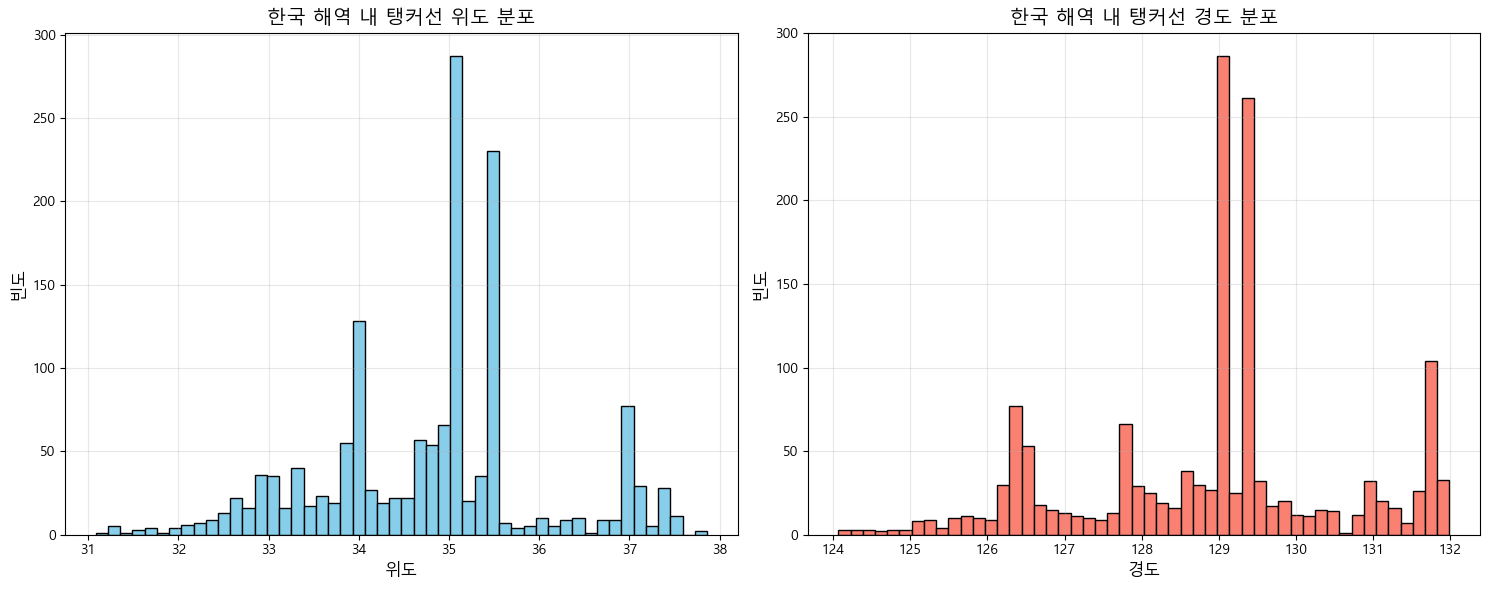

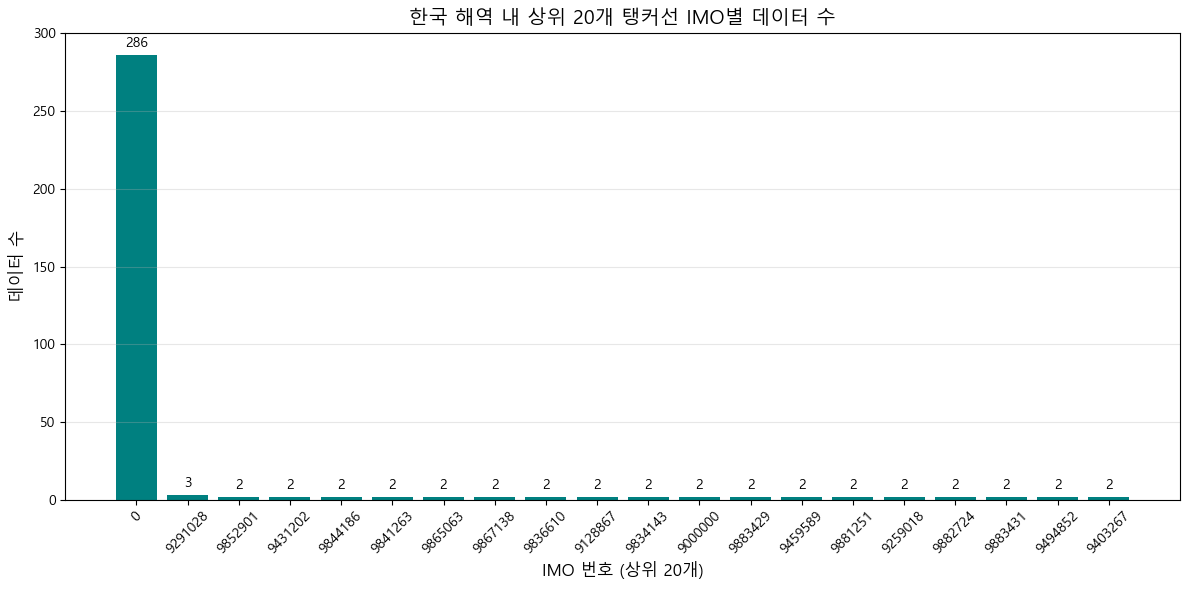


===== 추가 분석 =====
한국 해역 내 탱커선 데이터: 1,521행

CO2 배출량 분석 (컬럼: CDBX):
count    1.521000e+03
mean     4.859418e+09
std      1.521071e+10
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      3.277070e+09
max      2.715120e+11
Name: CDBX, dtype: float64


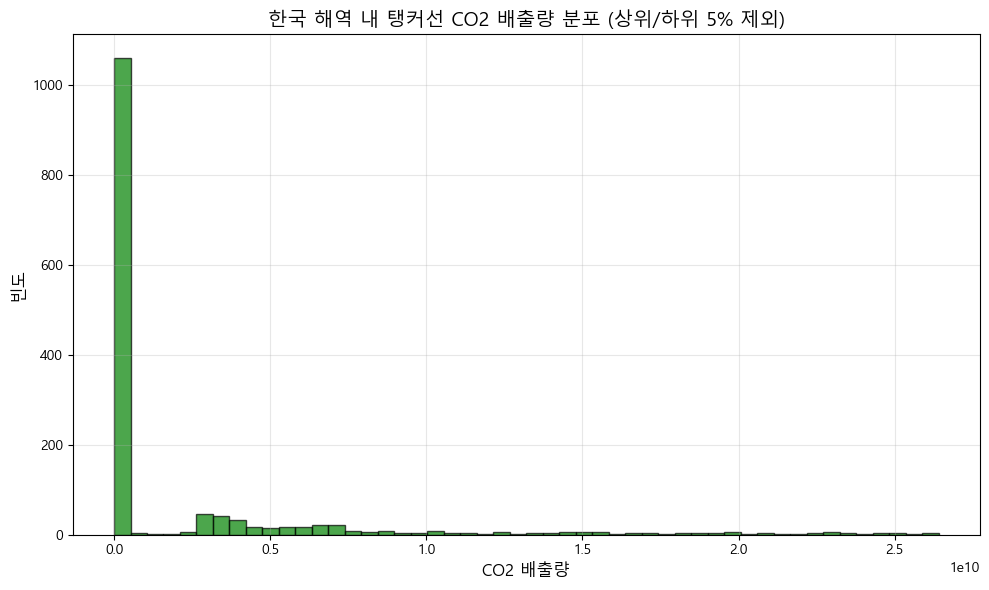

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import folium
from folium.plugins import HeatMap, MarkerCluster
import os
from tqdm import tqdm
import gc

# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'  # 한글 폰트
plt.rcParams['axes.unicode_minus'] = False     # 마이너스 기호 깨짐 방지

def safe_read_csv(file_path, chunk_size=None, optimize=True):
    """안전하게 CSV 파일 읽기 (인코딩 자동 감지)"""
    print(f"파일 로드 중: {file_path}")
    
    # 파일 크기 확인
    if os.path.exists(file_path):
        file_size_mb = os.path.getsize(file_path) / (1024 * 1024)
        print(f"파일 크기: {file_size_mb:.2f} MB")
    else:
        print(f"파일을 찾을 수 없습니다: {file_path}")
        return None
    
    # 인코딩 목록
    encodings = ['utf-8-sig', 'cp949', 'euc-kr', 'utf-8']
    
    # 각 인코딩 시도
    for encoding in encodings:
        try:
            if chunk_size:
                return pd.read_csv(file_path, encoding=encoding, chunksize=chunk_size)
            else:
                df = pd.read_csv(file_path, encoding=encoding)
                print(f"로드 완료: {len(df):,}행 × {len(df.columns):,}열 (인코딩: {encoding})")
                
                if optimize:
                    # 메모리 사용량 최적화 (주요 타입만)
                    for col in df.columns:
                        if df[col].dtype == 'float64':
                            df[col] = df[col].astype('float32')
                        elif df[col].dtype == 'int64':
                            df[col] = df[col].astype('int32')
                    
                return df
        except UnicodeDecodeError:
            continue
        except Exception as e:
            print(f"오류 발생 ({encoding}): {e}")
            continue
    
    # 모든 인코딩 실패 시 대체 방법 시도 (엔진 변경)
    try:
        print("대체 로딩 방법 시도...")
        if chunk_size:
            return pd.read_csv(file_path, encoding='utf-8', engine='python', 
                             on_bad_lines='skip', chunksize=chunk_size)
        else:
            df = pd.read_csv(file_path, encoding='utf-8', engine='python', on_bad_lines='skip')
            print(f"로드 완료 (대체 방법): {len(df):,}행 × {len(df.columns):,}열")
            return df
    except Exception as e:
        print(f"모든 로딩 시도 실패: {e}")
        return None

def analyze_korean_waters(file_path):
    """한국 해역 내 선박 위치 데이터 분석"""
    
    print("===== 한국 해역 내 탱커선 위치 분석 =====")
    
    # 한국 해역의 대략적인 위경도 범위 (배타적 경제수역 포함 대략적 범위)
    korea_bounds = {
        'lat_min': 32.0,    # 남쪽 한계
        'lat_max': 38.7,    # 북쪽 한계 (휴전선 이남)
        'lon_min': 124.0,   # 서쪽 한계
        'lon_max': 132.0    # 동쪽 한계
    }
    
    # 제주도 주변 해역 확장
    jeju_bounds = {
        'lat_min': 31.0,    # 제주도 남쪽
        'lat_max': 34.0,    # 제주도 북쪽
        'lon_min': 124.0,   # 제주도 서쪽
        'lon_max': 128.0    # 제주도 동쪽
    }
    
    # 울릉도, 독도 주변 해역 확장
    east_bounds = {
        'lat_min': 36.0,    # 울릉도 남쪽
        'lat_max': 38.0,    # 울릉도 북쪽
        'lon_min': 129.0,   # 울릉도 서쪽
        'lon_max': 132.0    # 독도 동쪽
    }
    
    # 파일 크기 확인 후 처리 방법 결정
    file_size_mb = os.path.getsize(file_path) / (1024 * 1024)
    use_chunks = file_size_mb > 500  # 500MB 이상이면 청크 단위 처리
    
    if use_chunks:
        print(f"파일이 크므로 ({file_size_mb:.2f} MB) 청크 단위로 처리합니다.")
        chunk_size = 100000  # 청크 크기 (필요에 따라 조정)
        
        # 청크 단위 처리를 위한 변수 초기화
        korea_data = []
        total_rows = 0
        in_korea_count = 0
        
        # 컬럼명 확인을 위한 첫 청크 처리
        chunks = safe_read_csv(file_path, chunk_size=chunk_size, optimize=True)
        first_chunk = next(chunks)
        
        # 위경도 컬럼 확인
        lat_cols = [col for col in first_chunk.columns if '위도' in col or 'LA' in col or 'lat' in col.lower()]
        lon_cols = [col for col in first_chunk.columns if '경도' in col or 'LO' in col or 'lon' in col.lower()]
        
        if not lat_cols or not lon_cols:
            print("위도/경도 컬럼을 찾을 수 없습니다.")
            # 모든 컬럼 출력
            print(f"사용 가능한 컬럼: {', '.join(first_chunk.columns)}")
            return None
        
        lat_col = lat_cols[0]
        lon_col = lon_cols[0]
        print(f"위도 컬럼: {lat_col}, 경도 컬럼: {lon_col}")
        
        # IMO 번호 컬럼 확인
        imo_cols = [col for col in first_chunk.columns if 'IMO' in col or '국제해상기구' in col]
        imo_col = imo_cols[0] if imo_cols else None
        
        # 첫 번째 청크 처리
        korea_chunk = first_chunk[
            ((first_chunk[lat_col] >= korea_bounds['lat_min']) & 
             (first_chunk[lat_col] <= korea_bounds['lat_max']) & 
             (first_chunk[lon_col] >= korea_bounds['lon_min']) & 
             (first_chunk[lon_col] <= korea_bounds['lon_max'])) |
            ((first_chunk[lat_col] >= jeju_bounds['lat_min']) & 
             (first_chunk[lat_col] <= jeju_bounds['lat_max']) & 
             (first_chunk[lon_col] >= jeju_bounds['lon_min']) & 
             (first_chunk[lon_col] <= jeju_bounds['lon_max'])) |
            ((first_chunk[lat_col] >= east_bounds['lat_min']) & 
             (first_chunk[lat_col] <= east_bounds['lat_max']) & 
             (first_chunk[lon_col] >= east_bounds['lon_min']) & 
             (first_chunk[lon_col] <= east_bounds['lon_max']))
        ]
        
        if not korea_chunk.empty:
            korea_data.append(korea_chunk)
            in_korea_count += len(korea_chunk)
        
        total_rows += len(first_chunk)
        
        # 나머지 청크 처리
        print("청크 단위로 데이터 처리 중...")
        for chunk in tqdm(chunks):
            # 한국 해역 내 데이터 필터링
            korea_chunk = chunk[
                ((chunk[lat_col] >= korea_bounds['lat_min']) & 
                 (chunk[lat_col] <= korea_bounds['lat_max']) & 
                 (chunk[lon_col] >= korea_bounds['lon_min']) & 
                 (chunk[lon_col] <= korea_bounds['lon_max'])) |
                ((chunk[lat_col] >= jeju_bounds['lat_min']) & 
                 (chunk[lat_col] <= jeju_bounds['lat_max']) & 
                 (chunk[lon_col] >= jeju_bounds['lon_min']) & 
                 (chunk[lon_col] <= jeju_bounds['lon_max'])) |
                ((chunk[lat_col] >= east_bounds['lat_min']) & 
                 (chunk[lat_col] <= east_bounds['lat_max']) & 
                 (chunk[lon_col] >= east_bounds['lon_min']) & 
                 (chunk[lon_col] <= east_bounds['lon_max']))
            ]
            
            if not korea_chunk.empty:
                korea_data.append(korea_chunk)
                in_korea_count += len(korea_chunk)
            
            total_rows += len(chunk)
            
            # 메모리 관리
            del chunk, korea_chunk
            gc.collect()
        
        # 한국 해역 내 데이터 합치기
        if korea_data:
            korea_df = pd.concat(korea_data, ignore_index=True)
            print(f"한국 해역 내 데이터: {len(korea_df):,}행 (전체 {total_rows:,}행 중 {len(korea_df)/total_rows*100:.2f}%)")
        else:
            print("한국 해역 내 데이터가 없습니다.")
            return None
        
    else:
        # 한 번에 전체 파일 처리
        print("전체 파일을 한 번에 로드합니다.")
        df = safe_read_csv(file_path, optimize=True)
        
        if df is None:
            return None
        
        # 위경도 컬럼 확인
        lat_cols = [col for col in df.columns if '위도' in col or 'LA' in col or 'lat' in col.lower()]
        lon_cols = [col for col in df.columns if '경도' in col or 'LO' in col or 'lon' in col.lower()]
        
        if not lat_cols or not lon_cols:
            print("위도/경도 컬럼을 찾을 수 없습니다.")
            # 모든 컬럼 출력
            print(f"사용 가능한 컬럼: {', '.join(df.columns)}")
            return None
        
        lat_col = lat_cols[0]
        lon_col = lon_cols[0]
        print(f"위도 컬럼: {lat_col}, 경도 컬럼: {lon_col}")
        
        # IMO 번호 컬럼 확인
        imo_cols = [col for col in df.columns if 'IMO' in col or '국제해상기구' in col]
        imo_col = imo_cols[0] if imo_cols else None
        
        # 한국 해역 내 데이터 필터링
        korea_df = df[
            ((df[lat_col] >= korea_bounds['lat_min']) & 
             (df[lat_col] <= korea_bounds['lat_max']) & 
             (df[lon_col] >= korea_bounds['lon_min']) & 
             (df[lon_col] <= korea_bounds['lon_max'])) |
            ((df[lat_col] >= jeju_bounds['lat_min']) & 
             (df[lat_col] <= jeju_bounds['lat_max']) & 
             (df[lon_col] >= jeju_bounds['lon_min']) & 
             (df[lon_col] <= jeju_bounds['lon_max'])) |
            ((df[lat_col] >= east_bounds['lat_min']) & 
             (df[lat_col] <= east_bounds['lat_max']) & 
             (df[lon_col] >= east_bounds['lon_min']) & 
             (df[lon_col] <= east_bounds['lon_max']))
        ]
        
        print(f"한국 해역 내 데이터: {len(korea_df):,}행 (전체 {len(df):,}행 중 {len(korea_df)/len(df)*100:.2f}%)")
        
        # 원본 데이터프레임 삭제하여 메모리 확보
        total_rows = len(df)
        del df
        gc.collect()
    
    # 결과가 없는 경우
    if korea_df.empty:
        print("한국 해역 내 데이터가 없습니다.")
        return None
    
    # 결과 분석
    print("\n===== 한국 해역 내 데이터 분석 =====")
    
    # 위경도 분포
    print(f"\n위경도 범위:")
    print(f"위도: {korea_df[lat_col].min():.4f} ~ {korea_df[lat_col].max():.4f}")
    print(f"경도: {korea_df[lon_col].min():.4f} ~ {korea_df[lon_col].max():.4f}")
    
    # IMO 번호 분포 (있는 경우)
    if imo_col:
        unique_imos = korea_df[imo_col].nunique()
        print(f"\nIMO 번호: {unique_imos:,}개 고유 선박")
        
        # 상위 10개 IMO 출력
        top_imos = korea_df[imo_col].value_counts().head(10)
        print("\n상위 10개 IMO 번호:")
        for imo, count in top_imos.items():
            print(f"IMO {imo}: {count:,}개 데이터")
    
    # 데이터 저장
    output_file = "한국해역_탱커선_데이터.csv"
    korea_df.to_csv(output_file, index=False, encoding='utf-8-sig')
    print(f"\n한국 해역 데이터 저장 완료: {output_file}")
    
    # 시각화: 지도
    print("\n지도 시각화 생성 중...")
    
    # 지도 중심 좌표 (한국 중심)
    center_lat = (korea_bounds['lat_min'] + korea_bounds['lat_max']) / 2
    center_lon = (korea_bounds['lon_min'] + korea_bounds['lon_max']) / 2
    
    # 기본 지도 생성
    m = folium.Map(location=[center_lat, center_lon], zoom_start=6)
    
    # 한국 해역 경계 표시
    folium.Rectangle(
        bounds=[(korea_bounds['lat_min'], korea_bounds['lon_min']), 
                (korea_bounds['lat_max'], korea_bounds['lon_max'])],
        color='blue',
        fill=True,
        fill_opacity=0.1,
        popup='한국 주요 해역'
    ).add_to(m)
    
    # 제주 해역 경계 표시
    folium.Rectangle(
        bounds=[(jeju_bounds['lat_min'], jeju_bounds['lon_min']), 
                (jeju_bounds['lat_max'], jeju_bounds['lon_max'])],
        color='green',
        fill=True,
        fill_opacity=0.1,
        popup='제주 해역'
    ).add_to(m)
    
    # 동해 해역 경계 표시
    folium.Rectangle(
        bounds=[(east_bounds['lat_min'], east_bounds['lon_min']), 
                (east_bounds['lat_max'], east_bounds['lon_max'])],
        color='purple',
        fill=True,
        fill_opacity=0.1,
        popup='동해 해역 (울릉도, 독도)'
    ).add_to(m)
    
    # 데이터 포인트 시각화
    if len(korea_df) > 10000:
        # 데이터가 많으면 히트맵으로 표시
        print(f"데이터가 많아({len(korea_df):,}개) 히트맵으로 표시합니다.")
        
        # 메모리 절약을 위해 일부 샘플링
        sample_size = min(50000, len(korea_df))
        sample_df = korea_df.sample(sample_size) if len(korea_df) > sample_size else korea_df
        
        # 히트맵 데이터 준비
        heat_data = [[row[lat_col], row[lon_col]] for _, row in sample_df.iterrows()]
        
        # 히트맵 추가
        HeatMap(heat_data, radius=10).add_to(m)
        
    else:
        # 데이터가 적으면 개별 마커로 표시
        print(f"데이터 포인트({len(korea_df):,}개)를 마커로 표시합니다.")
        
        # 마커 클러스터 생성
        marker_cluster = MarkerCluster().add_to(m)
        
        # IMO별 컬러 매핑 (IMO가 있는 경우)
        if imo_col and len(korea_df) <= 5000:  # 너무 많으면 부하 발생
            unique_imos = korea_df[imo_col].unique()
            
            # IMO별로 다른 색상 할당 (상위 20개만)
            imo_colors = {}
            top_imos = korea_df[imo_col].value_counts().head(20).index
            colors = ['red', 'blue', 'green', 'purple', 'orange', 'darkred', 
                     'lightred', 'beige', 'darkblue', 'darkgreen', 'cadetblue', 
                     'darkpurple', 'pink', 'lightblue', 'lightgreen', 'gray', 
                     'black', 'lightgray', 'brown', 'white']
            
            for i, imo in enumerate(top_imos):
                imo_colors[imo] = colors[i % len(colors)]
            
            # 마커 추가
            for _, row in korea_df.iterrows():
                imo = row[imo_col] if imo_col in row else "Unknown"
                color = imo_colors.get(imo, 'gray')
                
                popup_text = f"위도: {row[lat_col]:.4f}<br>경도: {row[lon_col]:.4f}"
                if imo_col:
                    popup_text += f"<br>IMO: {imo}"
                
                folium.Marker(
                    location=[row[lat_col], row[lon_col]],
                    popup=popup_text,
                    icon=folium.Icon(color=color, icon='ship', prefix='fa')
                ).add_to(marker_cluster)
        else:
            # 표본 추출 (최대 5000개)
            sample_size = min(5000, len(korea_df))
            sample_df = korea_df.sample(sample_size) if len(korea_df) > sample_size else korea_df
            
            # 간단한 마커 추가
            for _, row in sample_df.iterrows():
                popup_text = f"위도: {row[lat_col]:.4f}<br>경도: {row[lon_col]:.4f}"
                if imo_col:
                    popup_text += f"<br>IMO: {row[imo_col]}"
                
                folium.CircleMarker(
                    location=[row[lat_col], row[lon_col]],
                    radius=3,
                    popup=popup_text,
                    color='blue',
                    fill=True,
                    fill_color='blue'
                ).add_to(marker_cluster)
    
    # 주요 도시 표시
    cities = {
        '서울': [37.5665, 126.9780],
        '부산': [35.1796, 129.0756],
        '인천': [37.4563, 126.7052],
        '울산': [35.5384, 129.3114],
        '포항': [36.0190, 129.3434],
        '목포': [34.8124, 126.3922],
        '여수': [34.7604, 127.6622],
        '제주': [33.4996, 126.5312],
        '울릉도': [37.5014, 130.8571],
        '독도': [37.2424, 131.8698]
    }
    
    for city, coords in cities.items():
        folium.Marker(
            location=coords,
            popup=city,
            icon=folium.Icon(color='red', icon='info-sign')
        ).add_to(m)
    
    # 지도 저장
    map_file = "한국해역_탱커선_위치_지도.html"
    m.save(map_file)
    print(f"지도 저장 완료: {map_file}")
    
    # 추가 시각화: 위경도 분포 히스토그램
    plt.figure(figsize=(15, 6))
    
    # 위도 분포
    plt.subplot(1, 2, 1)
    plt.hist(korea_df[lat_col], bins=50, color='skyblue', edgecolor='black')
    plt.title('한국 해역 내 탱커선 위도 분포', fontsize=14)
    plt.xlabel('위도', fontsize=12)
    plt.ylabel('빈도', fontsize=12)
    plt.grid(alpha=0.3)
    
    # 경도 분포
    plt.subplot(1, 2, 2)
    plt.hist(korea_df[lon_col], bins=50, color='salmon', edgecolor='black')
    plt.title('한국 해역 내 탱커선 경도 분포', fontsize=14)
    plt.xlabel('경도', fontsize=12)
    plt.ylabel('빈도', fontsize=12)
    plt.grid(alpha=0.3)
    
    plt.tight_layout()
    plt.savefig('한국해역_탱커선_위경도_분포.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    # IMO 번호별 데이터 수 분포 (있는 경우)
    if imo_col:
        imo_counts = korea_df[imo_col].value_counts()
        
        plt.figure(figsize=(12, 6))
        plt.bar(range(len(imo_counts[:20])), imo_counts[:20], color='teal')
        plt.title('한국 해역 내 상위 20개 탱커선 IMO별 데이터 수', fontsize=14)
        plt.xlabel('IMO 번호 (상위 20개)', fontsize=12)
        plt.ylabel('데이터 수', fontsize=12)
        plt.xticks(range(len(imo_counts[:20])), imo_counts[:20].index, rotation=45)
        plt.grid(axis='y', alpha=0.3)
        
        # 막대 위에 값 표시
        for i, v in enumerate(imo_counts[:20]):
            plt.text(i, v + 5, f'{v:,}', ha='center')
        
        plt.tight_layout()
        plt.show()
    
    # 결과 반환
    return korea_df

# 파일 경로 지정 및 실행
file_path = 'vessel_data/탱커선+선박별+Co2+Nox+발생량+데이터+셋.csv'
korea_data = analyze_korean_waters(file_path)

# 추가 분석: 한국 해역 내 위치한 선박 데이터가 있는 경우
if korea_data is not None and not korea_data.empty:
    print("\n===== 추가 분석 =====")
    print(f"한국 해역 내 탱커선 데이터: {len(korea_data):,}행")
    
    # CO2 배출량 분석 (있는 경우)
    co2_cols = [col for col in korea_data.columns if 'CO2' in col.upper() or 'CDBX' in col]
    if co2_cols:
        co2_col = co2_cols[0]
        print(f"\nCO2 배출량 분석 (컬럼: {co2_col}):")
        
        # 기본 통계
        co2_stats = korea_data[co2_col].describe()
        print(co2_stats)
        
        # CO2 배출량 히스토그램 (이상치 제외)
        q1 = korea_data[co2_col].quantile(0.05)
        q3 = korea_data[co2_col].quantile(0.95)
        co2_filtered = korea_data[(korea_data[co2_col] >= q1) & (korea_data[co2_col] <= q3)]
        
        plt.figure(figsize=(10, 6))
        plt.hist(co2_filtered[co2_col], bins=50, color='green', edgecolor='black', alpha=0.7)
        plt.title('한국 해역 내 탱커선 CO2 배출량 분포 (상위/하위 5% 제외)', fontsize=14)
        plt.xlabel('CO2 배출량', fontsize=12)
        plt.ylabel('빈도', fontsize=12)
        plt.grid(alpha=0.3)
        plt.tight_layout()
        plt.savefig('한국해역_탱커선_CO2배출량.png', dpi=300, bbox_inches='tight')
        plt.show()

In [18]:
import pandas as pd
import requests
from io import StringIO

def load_noaa_buoy_metadata():
    url = "https://www.ndbc.noaa.gov/data/stations/station_table.txt"
    cols = ["id", "name", "owner", "program", "type", "lat", "lon", "elev", "sensor", "payload"]

    response = requests.get(url)
    response.raise_for_status()
    df = pd.read_csv(StringIO(response.text), sep="|", names=cols)
    return df


In [19]:
import datetime

def get_weather_by_location_and_date(lat, lon, date):
    base_url = "https://archive-api.open-meteo.com/v1/archive"
    params = {
        "latitude": lat,
        "longitude": lon,
        "start_date": date,
        "end_date": date,
        "hourly": "temperature_2m,precipitation,wind_speed_10m",
        "timezone": "UTC"
    }

    response = requests.get(base_url, params=params)
    response.raise_for_status()
    return response.json()


In [22]:
# 1. 부이 데이터 로드
buoy_df = load_noaa_buoy_metadata()

# 2. 유효한 데이터 있는지 확인
if len(buoy_df) == 0:
    raise ValueError("❌ 유효한 위도/경도 정보를 가진 부이 데이터가 없습니다.")

# 3. 첫 번째 부이 선택
sample_buoy = buoy_df.iloc[0]
lat = sample_buoy['lat']
lon = sample_buoy['lon']
date = "2023-08-01"

# 4. 날씨 데이터 조회
weather_data = get_weather_by_location_and_date(lat, lon, date)
print(weather_data)


HTTPError: 400 Client Error: Bad Request for url: https://archive-api.open-meteo.com/v1/archive?latitude=+PAYLOAD+&longitude=+LOCATION+&start_date=2023-08-01&end_date=2023-08-01&hourly=temperature_2m%2Cprecipitation%2Cwind_speed_10m&timezone=UTC